In [ ]:
!pip install pandas==2.2.2  sentence-transformers

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 124.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytens

In [ ]:
!pip install chromadb==1.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.0 MB/s 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

## RETRIEVAL EVALUATION

In [ ]:
from chromadb import PersistentClient
from chromadb.config import Settings

chromaPath = "/content/drive/MyDrive/chroma"
client = PersistentClient(path=chromaPath, settings=Settings(allow_reset=True))
print("Existing collections:", [c.name for c in client.list_collections()])


Existing collections: ['actSectionsV2']


In [ ]:
import pandas as pd
from chromadb.utils import embedding_functions
from chromadb import PersistentClient
from chromadb.config import Settings

chromaPath = "/content/drive/MyDrive/chroma"
collectionName = "actSectionsV2"
embeddingModel = "intfloat/e5-base-v2"

ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name=embeddingModel)

client = PersistentClient(path=chromaPath, settings=Settings(allow_reset=True))
coll = client.get_collection(collectionName)

print(f"Loaded collection '{collectionName}' with {coll.count()} documents")

def search(q, n=5):
    qPref = f"query: {q}"
    qEmbed = ef([qPref])
    res = coll.query(query_embeddings=qEmbed, n_results=n)
    hits = []
    for i, (doc, meta, _id) in enumerate(zip(res["documents"][0], res["metadatas"][0], res["ids"][0]), start=1):
        preview = (doc[:240] + "…") if doc and len(doc) > 240 else (doc or "")
        hits.append({
            "rank": i,
            "id": _id,
            "act": meta.get("act"),
            "section": meta.get("section"),
            "chars": len(doc or ""),
            "preview": preview
        })
    return pd.DataFrame(hits)

q1 = "What is unfair termination under Kenyan law?"
q2 = "Principles of data protection in Kenya"

print(" Search results:")
display(search(q1, n=5))
display(search(q2, n=5))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Loaded collection 'actSectionsV2' with 3921 documents
 Search results:


,rank,id,act,section,chars,preview
0,1,3b02e8acb87babc276380af37f538f9e64b2a1125e3ac9...,Employment Act,45 – Unfair termination,1298,(1) No employer shall terminate the employment...
1,2,ccbde8dbdd7b2b29f88b9718011b0b746efb0ab882b4a0...,Employment Act,35 – Termination notice,1242,(1) A contract of service not being a contract...
2,3,d904a3a0785da8903981fe70fe3fd601a42a0c7bb7317f...,Employment Act,10 – Employment particulars,1305,while that employee is working outside Kenya; ...
3,4,b1d19c6201405bb84ed188d4156b9be35b03d99f66a2c4...,Employment Act,5 – Discrimination in employment,1432,(1) It shall be the duty of the Cabinet Secret...
4,5,9cefdba45102bf512aa9d327d549f9d158954d3cee5ed7...,Employment Act,47 – Complaint of summary dismissal and unfair...,1303,(1) Where an employee has been summarily dismi...


,rank,id,act,section,chars,preview
0,1,4340f7e61ee86fe41775c103673ff18d8e211d00869d2a...,Data Protection Act,25 – Principles of data protection,1047,Every data controller or data processor shall ...
1,2,7f315f8ece18cb099a4f47796d4e0ed448e0e675633cd6...,Data Protection Act,49 – Safeguards prior to transfer of personal ...,565,(1) The processing of sensitive personal data ...
2,3,eac93d971e0244be20cc10a88517dbe20020c83be83c83...,Constitution of Kenya,238 – Principles of national security,883,(1) National security is the protection agains...
3,4,b1f5c5a86687a7a4793093d2f4cc01ec5915cfacc75aac...,Data Protection Act,4 – Application,561,This Act applies to the processing of personal...
4,5,869a5da270bddea7052624708398d4f77ea984a48509ed...,Data Protection Act,9 – Powers of the Office,1010,(1) The Data Commissioner shall have power to—...


In [ ]:
import os
from typing import List, Dict, Any
import torch
from sentence_transformers import CrossEncoder

HF_MODEL   = os.getenv("CE_HF_MODEL", "cross-encoder/ms-marco-MiniLM-L-6-v2")
BATCH_SIZE = int(os.getenv("CE_BATCH_SIZE", "32"))
MAX_CHARS  = int(os.getenv("CE_MAX_CHARS", "1200"))
HEAD_CHARS = int(os.getenv("CE_HEAD_CHARS", "900"))
TAIL_CHARS = int(os.getenv("CE_TAIL_CHARS", "300"))
ALPHA      = float(os.getenv("CE_FUSION_ALPHA", "0.7"))

_device = "cuda" if torch.cuda.is_available() else "cpu"
reranker_model = CrossEncoder(HF_MODEL, device=_device)  # always load from HF

def _trim_text(t: str) -> str:
    if not t: return ""
    if len(t) <= MAX_CHARS: return t
    head = t[:HEAD_CHARS]
    tail = t[-TAIL_CHARS:]
    return head + "\n...\n" + tail

def _minmax(xs):
    xs = [0.0 if (x is None) else float(x) for x in xs]
    lo, hi = min(xs), max(xs)
    if hi - lo < 1e-9: return [0.0 for _ in xs]
    return [(x - lo) / (hi - lo) for x in xs]

def rerank_results(query: str, chunks: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    if not chunks: return []
    texts = [_trim_text(c.get("text","")) for c in chunks]
    pairs = [(query, t) for t in texts]

    try:
        ce_scores = reranker_model.predict(pairs, batch_size=BATCH_SIZE, show_progress_bar=False)
        ce_scores = [float(s) for s in ce_scores]
    except Exception:
        ce_scores = [0.0 for _ in chunks]

    dense = [c.get("score_before") for c in chunks]
    ce_n = _minmax(ce_scores)
    dn_n = _minmax(dense) if any(d is not None for d in dense) else [0.0]*len(chunks)
    fused = [ALPHA*ce + (1-ALPHA)*dn for ce,dn in zip(ce_n, dn_n)]

    out = []
    for c, ce, fu in zip(chunks, ce_scores, fused):
        d = dict(c)
        d["rerank_score"] = ce
        d["score"] = fu
        out.append(d)

    out.sort(key=lambda x: x.get("score", 0.0), reverse=True)
    return out


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [ ]:
def retrieve_and_rerank(query: str, top_k: int = 10, final_k: int = 5):

    print(f"\n Query: {query}")
    q_pref = f"query: {query}"

    q_embed = ef([q_pref])
    res = coll.query(query_embeddings=q_embed, n_results=top_k)

    chunks = []
    for doc, meta, _id, score in zip(
        res["documents"][0],
        res["metadatas"][0],
        res["ids"][0],
        res["distances"][0]
    ):
        chunks.append({
            "id": _id,
            "text": doc,
            "score_before": float(score),
            "act": meta.get("act"),
            "section": meta.get("section"),
            "section_title": meta.get("section_title")
        })


    reranked = rerank_results(query, chunks)


    top = reranked[:final_k]
    for i, c in enumerate(top, start=1):
        preview = (c["text"][:200] + "…") if len(c["text"]) > 200 else c["text"]
        print(f"\n#{i} | {c['act']} - {c['section']} ({c['section_title']})\nScore: {c['score']:.3f}")
        print(preview)

    return top


### STORING TOP 6 RETRIEVAL ACTS

In [ ]:
import pandas as pd
from tqdm import tqdm

test_path = "/content/uhakiTestQuestions.csv"
finalData = pd.read_csv(test_path)

results = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    q = row["question"]

    try:
        # Retrieve top 6 results
        retrieved = retrieve_and_rerank(q, top_k=10, final_k=6)

        if retrieved:
            # Store top 6 acts and sections
            top_acts = [r.get("act", "") for r in retrieved[:6]]
            top_sections = [r.get("section", "") for r in retrieved[:6]]

            # Also store the very top one for comparison
            retrieved_act = top_acts[0]
            retrieved_section = top_sections[0]
        else:
            retrieved_act = ""
            retrieved_section = ""
            top_acts = []
            top_sections = []
    except Exception as e:
        print(f"Error processing question: {q}\n{e}")
        retrieved_act = ""
        retrieved_section = ""
        top_acts = []
        top_sections = []

    results.append({
        "question": q,
        "act": row["act"],
        "section": row["section"],
        "retrieved_act": retrieved_act,
        "retrieved_section": retrieved_section,
        "top6_acts": ", ".join(top_acts),
        "top6_sections": ", ".join(top_sections)
    })

out_path = "/content/uhakiRetrievalResults.csv"
results_df = pd.DataFrame(results)
results_df.to_csv(out_path, index=False, encoding='utf-8')

print(f"\n Retrieval results with top 6 saved to: {out_path}")


  0%|          | 0/300 [00:00<?, ?it/s]


 Query: What does the law provide regarding equality and freedom from discrimination?


  1%|          | 2/300 [00:00<01:41,  2.93it/s]


#1 | Constitution of Kenya - 27 – Equality and freedom from discrimination (Equality and freedom from discrimination)
Score: 0.700
(1) Every person is equal before the law and has the right to equal protection and equal benefit of the law. (2) Equality includes the full and equal enjoyment of all rights and fundamental freedoms. …

#2 | Persons with Disabilities Act - 6 – Right to Equality and Non Discrimination (Right to Equality and Non Discrimination)
Score: 0.698
(1) Every person with disability is— (a) equal before the law in the social, cultural, economic, political, or any other field of life and is guaranteed to equal protection, equal benefit of the law a…

#3 | Persons with Disabilities Act - 3 – Guiding Values and Principles (Guiding Values and Principles)
Score: 0.647
In promoting and protecting the rights of persons with disability under this Act or any other law, every state organ, state office, public officer and all persons including incorporated and unincorpor…

#4 | 

  1%|▏         | 4/300 [00:01<01:06,  4.45it/s]


#1 | Income Tax Act - 30 – Personal relief (Personal relief)
Score: 0.907
A resident individual in receipt of taxable income shall be entitled to a tax relief in this Act referred to as the personal relief. [Act No. 12 of 1977, s. 5, Act No. 8 of 1996, s. 35.] 30A. [Repeale…

#2 | Persons with Disabilities Act - 9 – Right to Privacy (Right to Privacy)
Score: 0.765
(1) Every person with disability has a right to privacy and shall not be subjected to arbitrary interference and intrusion into his or her privacy, family, home or correspondence or other types of com…

#3 | Labour Relations Act - 57 – Collective agreements (Collective agreements)
Score: 0.743
imposed on the employer by any law or an order of any court; (c) if disclosed, may cause substantial harm to the employer or employee; or (d) is private personal information relating to an employee, u…

#4 | Constitution of Kenya - 31 – Privacy (Privacy)
Score: 0.625
Every person has the right to privacy, which includes the right not t

  2%|▏         | 6/300 [00:01<00:54,  5.37it/s]


#1 | Land Act - 143 – Power of the Commission to create public rights of way (Power of the Commission to create public rights of way)
Score: 0.998
(1) Subject to and in accordance with this section and section 146, the Commission may, create a right of way which shall be known as public right of way. (2) A public right of way may be— (a) a right…

#2 | Land Act - 142 – Repealed by Act No. 28 of 2016, s. 94 (Repealed by Act No. 28 of 2016, s. 94)
Score: 0.700
Public rights of way

#3 | Constitution of Kenya - 19 – Rights and fundamental freedoms (Rights and fundamental freedoms)
Score: 0.628
(1) The Bill of Rights is an integral part of Kenya’s democratic state and is the framework for social, economic and cultural policies. (2) The purpose of recognising and protecting human rights and f…

#4 | Constitution of Kenya - 21 – Implementation of rights and fundamental freedoms (Implementation of rights and fundamental freedoms)
Score: 0.498
(1) It is a fundamental duty of the State and eve

  3%|▎         | 8/300 [00:01<00:48,  6.00it/s]


#1 | Persons with Disabilities Act - 28 – Access to Justice (Access to Justice)
Score: 0.765
(1) Every person with disability has a right to effective access to justice on an equal basis with others, including through the provision of procedural and age-appropriate accommodations, in order to…

#2 | Small Claims Court Act - 21 – Language of the Court (Language of the Court)
Score: 0.646
(1) English, Kiswahili or any other appropriate language may be used at any stage of the proceedings of Court. (2) In all appropriate cases, the Court shall facilitate the use by parties of indigenous…

#3 | Land Act - 140 – Access order (Access order)
Score: 0.473
(1) An owner of landlocked land may apply in the prescribed form to a court for an access order, granting reasonable access to that land. (2) A copy of the application shall be served on— (a) the owne…

#4 | Criminal Procedure Code - 275 – Orders for amendment of information, separate trial, and postponement of trial (Orders for amendment of

  3%|▎         | 10/300 [00:02<00:46,  6.19it/s]


#1 | Constitution of Kenya - 73 – Responsibilities of leadership (Responsibilities of leadership)
Score: 0.742
(1) Authority assigned to a State officer— (a) is a public trust to be exercised in a manner that— (i) is consistent with the purposes and objects of this Constitution; (ii) demonstrates respect for t…

#2 | Criminal Procedure Code - Preamble – Preamble (Preamble)
Score: 0.657
Appeals

#3 | Criminal Procedure Code - 53 – Order to give security (Order to give security)
Score: 0.337
(1) If upon an inquiry it is proved that it is necessary for keeping the peace or maintaining good behaviour that the person in respect of whom the inquiry is made should be made subject to a restrict…

#4 | Criminal Procedure Code - 23 – PREVIOUS CONVICTION (PREVIOUS CONVICTION)
Score: 0.335
to Court of Appeal on 379 ” ” High Court on 347 when matter for judge 313(1)(c) ” no appeal to Court of Appeal on 361 FAILURE OF JUSTICE, irregularity causing 382 FALSE PRETENCES— conviction of, on ch…

#5 | Em

  4%|▍         | 12/300 [00:02<00:45,  6.29it/s]


#1 | Constitution of Kenya - 234 – Functions and powers of the Public Service Commission (Functions and powers of the Public Service Commission)
Score: 0.809
(h) evaluate and report to the President and Parliament on the extent to which the values and principles referred to in Articles 10 and 232 are complied with in the public service; (i) hear and determ…

#2 | Land Act - 4 – Guiding values and principles (Guiding values and principles)
Score: 0.727
(1) The guiding values and principles of land management and administration in this section bind all State organs, State officers, public officers and all persons whenever any of them— (a) enacts, app…

#3 | Constitution of Kenya - 232 – Values and principles of public service (Values and principles of public service)
Score: 0.700
(1) The values and principles of public service include— (a) high standards of professional ethics; (b) efficient, effective and economic use of resources; (c) responsive, prompt, effective, impartial…

#4 | La

  5%|▍         | 14/300 [00:02<00:48,  5.90it/s]


#1 | Employment Act - 27 – Hours of work (Hours of work)
Score: 0.700
(1) An employer shall regulate the working hours of each employee in accordance with the provisions of this Act and any other written law. (2) Notwithstanding subsection (1), an employee shall be enti…

#2 | Employment Act - 59 – Time restriction in employing a child (Time restriction in employing a child)
Score: 0.446
(1) Subject to section 60, no person shall employ a child in an industrial undertaking between the hours of 6.30 p.m. and 6.30 a.m. (2) Notwithstanding the provision of subsection (1), a person may em…

#3 | Work Injury Benefits Act - 5 – Meaning of "employee" (Meaning of "employee")
Score: 0.433
(1) In this Act, "employee" means a person who has been employed for wages or a salary under a contract of service and includes an apprentice or indentured learner. (2) Subsection (1) applies irrespec…

#4 | Employment Act - 74 – Records to be kept by employer (Records to be kept by employer)
Score: 0.432
(1)

  5%|▌         | 16/300 [00:02<00:44,  6.33it/s]


#1 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.700
(1) A female employee shall be entitled to three months maternity leave with full pay. (2) On expiry of a female employee's maternity leave as provided in subsections (1) and (3), the female employee …

#2 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.691
on the last day of such extended leave. (4) A female employee shall only be entitled to the rights mentioned in subsections (1), (2) and (3) if she gives not less than seven days notice in advance or …

#3 | Employment Act - 30 – Sick leave (Sick leave)
Score: 0.658
(1) After two consecutive months of service with his employer, an employee shall be entitled to sick leave of not less than seven days with full pay and thereafter to sick leave of seven days with hal…

#4 | Employment Act - 28 – Annual leave (Annual leave)
Score: 0.654
(1) An employee shall be entitled— (a) after every twelve consecutive months of service with his employer to n

  6%|▌         | 18/300 [00:03<00:44,  6.30it/s]


#1 | Employment Act - 38 – Waiver of notice by employer (Waiver of notice by employer)
Score: 0.913
Where an employee gives notice of termination of employment and the employer waives the whole or any part of the notice, the employer shall pay to the employee remuneration equivalent to the period of…

#2 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.707
(1) Where in the opinion of a labour officer summary dismissal or termination of a contract of an employee is unjustified, the labour officer may recommend to the employer to pay to the employee any o…

#3 | Employment Act - 44 – Summary dismissal (Summary dismissal)
Score: 0.628
(1) Summary dismissal shall take place when an employer terminates the employment of an employee without notice or with less notice than that to which the employee is entitled by any statutory provisi…

#4 | Employment Act - 35 – Termination notice (Termination n

  7%|▋         | 20/300 [00:03<00:43,  6.49it/s]


#1 | Employment Act - 41 – Notification and hearing before termination on grounds of misconduct (Notification and hearing before termination on grounds of misconduct)
Score: 0.700
(1) Subject to section 42(1), an employer shall, before terminating the employment of an employee, on the grounds of misconduct, poor performance or physical incapacity explain to the employee, in a l…

#2 | Employment Act - 78 – Notification of termination of employment (Notification of termination of employment)
Score: 0.665
An employer shall notify the termination of every employment and of each lay-off of a person in writing to the nearest employment service office within two weeks of the termination or lay-off.

#3 | Small Claims Court Act - 34 – Expeditious disposal of cases (Expeditious disposal of cases)
Score: 0.481
appropriate any of the following exceptional and unforeseen circumstances— (a) the absence of the parties concerned or their advocate or other participants to the proceedings required to

  7%|▋         | 22/300 [00:03<00:41,  6.62it/s]


#1 | Employment Act - 50 – Courts to be guided (Courts to be guided)
Score: 0.938
In determining a complaint or suit under this Act involving wrongful dismissal or unfair termination of the employment of an employee, the Employment and Labour Relations Court shall be guided by the …

#2 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.869
would have been entitled to by virtue of the contract; or (c) the equivalent of a number of months wages or salary not exceeding twelve months based on the gross monthly wage or salary of the employee…

#3 | Employment Act - 43 – Proof of reason for termination (Proof of reason for termination)
Score: 0.828
(1) In any claim arising out of termination of a contract, the employer shall be required to prove the reason or reasons for the termination, and where the employer fails to do so, the termination sha…

#4 | Employment Act - 47 – Complaint of summary di

  8%|▊         | 24/300 [00:04<00:43,  6.29it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.786
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#2 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.607
of 2016, s. 98.] 152E. Eviction Notice to unlawful occupiers of private land. (1) If, with respect to private land the owner or the person in charge is of the opinion that a person is in occupation of…

#3 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.598
set out in subsection (4), grant relief to the person applying for the same on any terms and conditions that appear to the court to be just and reasonable and, without prejudice to the generality of t…

#4 | Land Act - 42 – Relief against rescission of contract for the sale of land (Relief against rescission of contract for the sale of 

  9%|▊         | 26/300 [00:04<00:45,  6.03it/s]


#1 | Land Act - 55 – Application of this Part (Application of this Part)
Score: 0.962
(1) Unless otherwise provided in a lease instrument, the provisions of this Part shall apply to all leases, other than leases governed by legislation relating to community land. (2) The parties to a l…

#2 | Land Act - 71 – Transferor or assignor of lease released from liability to pay rent and observe covenants thereafter (Transferor or assignor of lease released from liability to pay rent and observe covenants thereafter)
Score: 0.883
lease provides expressly for a shorter period, and if the lessor leases that land or any buildings to another person before the end of one year, the provisions of subsection (1) shall apply, with effe…

#3 | Land Act - 13 – Lessee pre-emptive rights to allocation (Lessee pre-emptive rights to allocation)
Score: 0.749
to the generality of the foregoing, the rules may provide for the following— (a) prescribing the procedures for applying for extension of leases before t

  9%|▉         | 28/300 [00:04<00:45,  6.02it/s]


#1 | Income Tax Act - 31 – Insurance relief (Insurance relief)
Score: 1.000
referred to in paragraph (b), shall, for that year of income, be entitled to a personal relief in this Act referred to as the insurance relief: Provided that– (i) no insurance relief shall be granted …

#2 | Employment Act - 25 – Repayment of remuneration wrongfully withheld or deducted (Repayment of remuneration wrongfully withheld or deducted)
Score: 0.731
(1) Without prejudice to any other liability for a breach of the provisions of this Part, an employer who contravenes the provisions of this Part commits an offence and shall on conviction be liable t…

#3 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.650
(1) An application for relief against the exercise by the chargee of any of the remedies referred to in section 90(3) may be made by— (a) the chargor; (b) if two or more persons are joint chargors, by…

#4 | Land Act - 104 – Power of the court in respect

 10%|█         | 30/300 [00:05<00:44,  6.09it/s]


#1 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.824
whole or a part of the dwelling house would have on the occupation of the dwelling house by the chargor and dependants and if the effect would be to impose undue disturbance on those owners, whether i…

#2 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.778
to be permitted to pay the principal sum secured by the charge by installments or otherwise to defer payment of it in whole or in part but provision is also made in the charge instrument or any collat…

#3 | Land Act - 90 – Remedies of a chargee (Remedies of a chargee)
Score: 0.766
months, by the end of which the payment in default must have been completed; (c) if the default consists of the failure to perform or observe any covenant, express or implied, in the charge, the thing…

#4 | Land Act - 96 –

 11%|█         | 32/300 [00:05<00:42,  6.27it/s]


#1 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.781
of 2016, s. 98.] 152E. Eviction Notice to unlawful occupiers of private land. (1) If, with respect to private land the owner or the person in charge is of the opinion that a person is in occupation of…

#2 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.776
relating to an eviction from public land to be notified to all affected persons, in writing, by notice in the Gazette and in one newspaper with nationwide circulation and by radio announcement, in a l…

#3 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.710
crops and any other matters as the case may require; and (d) be served on the deputy county commissioner in charge of the area as well as the officer commanding the police division of the area. [Act N…

#4 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.700
[Act No. 28 of 2016, s. 98.] 152G. Mandatory procedures during eviction. (1) Notwithstanding any provisions to the

 11%|█▏        | 34/300 [00:05<00:42,  6.30it/s]


#1 | Constitution of Kenya - 50 – Fair hearing (Fair hearing)
Score: 0.922
new and compelling evidence has become available. (7) In the interest of justice, a court may allow an intermediary to assist a complainant or an accused person to communicate with the court. (8) This…

#2 | Evidence Act - 66 – Secondary evidence. (Secondary evidence.)
Score: 0.608
Secondary evidence includes— (a) certified copies given under the provisions hereinafter contained; (b) copies made from the original by mechanical processes which in themselves ensure the accuracy of…

#3 | Criminal Procedure Code - 212 – Evidence in reply (Evidence in reply)
Score: 0.540
If the accused person adduces evidence in his defence introducing a new matter which the prosecutor could not by the exercise of reasonable diligence have foreseen, the court may allow the prosecutor …

#4 | Criminal Procedure Code - Preamble – Preamble (Preamble)
Score: 0.508
Appeals

#5 | Criminal Procedure Code - 309 – Evidence in reply (Evidenc

 12%|█▏        | 36/300 [00:06<00:41,  6.43it/s]


#1 | Evidence Act - 108 – Incidence of burden. (Incidence of burden.)
Score: 0.856
The burden of proof in a suit or proceeding lies on that person who would fail if no evidence at all were given on either side.

#2 | Evidence Act - 109 – Proof of particular fact. (Proof of particular fact.)
Score: 0.836
The burden of proof as to any particular fact lies on the person who wishes the court to believe in its existence, unless it is provided by any law that the proof of that fact shall lie on any particu…

#3 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.702
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#4 | Evidence Act - 110 – Proof of admissibility. (Proof of admissibility.)
Score: 0.700
The burden of proving any fact necessary to be proved in order to enable any person to give ev

 13%|█▎        | 38/300 [00:06<00:40,  6.47it/s]


#1 | Evidence Act - 4 – Presumptions of fact. (Presumptions of fact.)
Score: 0.700
(1) Whenever it is provided by law that the court may presume a fact, it may either regard such fact as proved, unless and until it is disproved, or may call for proof of it. (2) Whenever it is direct…

#2 | Evidence Act - 109 – Proof of particular fact. (Proof of particular fact.)
Score: 0.661
The burden of proof as to any particular fact lies on the person who wishes the court to believe in its existence, unless it is provided by any law that the proof of that fact shall lie on any particu…

#3 | Evidence Act - 107 – Burden of proof. (Burden of proof.)
Score: 0.508
(1) Whoever desires any court to give judgment as to any legal right or liability dependent on the existence of facts which he asserts must prove that those facts exist. (2) When a person is bound to …

#4 | Evidence Act - Preamble – Preamble (Preamble)
Score: 0.459
[Act No. 1 of 2009, s. 36.] 106E. Presumption as to Gazette in electronic f

 13%|█▎        | 40/300 [00:06<00:40,  6.46it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.842
set out in subsection (4), grant relief to the person applying for the same on any terms and conditions that appear to the court to be just and reasonable and, without prejudice to the generality of t…

#2 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.700
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#3 | Labour Relations Act - 57 – Collective agreements (Collective agreements)
Score: 0.672
(1) An employer, group of employers or an employers’ organisation that has recognised a trade union in accordance with the provisions of this Part shall conclude a collective agreement with the recogn…

#4 | Employment Act - 45 – Unfair termination (Unfair termination)
Score: 0.567
in section 46; or (b) it is foun

 14%|█▍        | 42/300 [00:07<00:40,  6.45it/s]


#1 | Criminal Procedure Code - 302 – Cross-examination of witnesses for prosecution (Cross-examination of witnesses for prosecution)
Score: 0.874
The witnesses called for the prosecution shall be subject to cross-examination by the accused person or his advocate, and to re-examination by the advocate for the prosecution.

#2 | Evidence Act - 146 – Order and direction of examinations. (Order and direction of examinations.)
Score: 0.800
(1) Witnesses shall first be examined-in-chief, then, if the adverse party so desires, cross-examined, then, if the party calling them so desires, re-examined. (2) Subject to the following provisions …

#3 | Evidence Act - 154 – Cross-examination as to credibility. (Cross-examination as to credibility.)
Score: 0.772
When a witness is cross-examined he may, in addition to the questions hereinbefore referred to, be asked any questions which tend— (a) to test his accuracy, veracity or credibility; (b) to discover wh…

#4 | Evidence Act - 156 – Cross-examina

 15%|█▍        | 44/300 [00:07<00:39,  6.47it/s]


#1 | Law of Contract Act - 3 – Certain contracts to be in writing. (Certain contracts to be in writing.)
Score: 0.769
terms of a contract may be incorporated in a document either by being set out in it or by reference to some other document. (6) For the purposes of subsection (3)— "advanced electronic signature" has …

#2 | Evidence Act - 97 – Written contracts and grants. (Written contracts and grants.)
Score: 0.758
(1) When the terms of a contract, or of a grant, or of any other disposition of property, have been reduced to the form of a document, and in all cases in which any matter is required by law to be red…

#3 | Law of Contract Act - 3 – Certain contracts to be in writing. (Certain contracts to be in writing.)
Score: 0.632
a contract for the disposition of an interest in land unless— (a) the contract upon which the suit is founded— (i) is in writing; (ii) is signed by all the parties thereto; and (b) the signature of ea…

#4 | Evidence Act - 98 – Evidence of oral agreement. (

 15%|█▌        | 46/300 [00:07<00:38,  6.66it/s]


#1 | Criminal Procedure Code - Preamble – Preamble (Preamble)
Score: 0.753
Appeals

#2 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.700
in deciding whether to recommend the remedies specified in subsections (1) and (3), take into account any or all of the following— (a) the wishes of the employee; (b) the circumstances in which the te…

#3 | Land Act - 41 – Procedure for obtaining order for possession (Procedure for obtaining order for possession)
Score: 0.527
(1) A vendor who proposes to seek to regain possession of private land under section 39, shall serve a notice on the purchaser which shall inform the purchaser— (a) of the nature and extent of the bre…

#4 | Land Act - 39 – Vendor’s right to regain possession (Vendor’s right to regain possession)
Score: 0.481
If, under a contract for the sale of land, the purchaser has entered into possession of the land, the vendor may exercise h

 16%|█▌        | 48/300 [00:07<00:37,  6.76it/s]


#1 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.980
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#2 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.694
(1) An application for relief against the exercise by the chargee of any of the remedies referred to in section 90(3) may be made by— (a) the chargor; (b) if two or more persons are joint chargors, by…

#3 | Work Injury Benefits Act - 23 – Inquiry by Director (Inquiry by Director)
Score: 0.563
(1) After having received notice of an accident or having learned that an employee has been injured in an accident the Director shall make such inquiries as are necessary to decide upon any claim or l…

#4 | Constitution of Kenya - 23 – Authority of courts to uphold and enforce the Bill of 

 17%|█▋        | 50/300 [00:08<00:39,  6.40it/s]


#1 | Law of Succession Act - 28 – Circumstances to be taken into account by court in making order (Circumstances to be taken into account by court in making order)
Score: 0.817
In considering whether any order should be made under this Part, and if so what order, the court shall have regard to— (a) the nature and amount of the deceased's property; (b) any past, present or fu…

#2 | Work Injury Benefits Act - 6 – Meaning of dependant (Meaning of dependant)
Score: 0.748
(1) In this Act "dependant" means— (a) the widow or widower of an employee; (b) a child of the employee who has not attained the age of eighteen years including a posthumous child, a stepchild and an …

#3 | Law of Succession Act - 29 – Meaning of dependant (Meaning of dependant)
Score: 0.635
For the purposes of this Part, "dependant" means— (a) the wife or wives, or former wife or wives, and the children of the deceased whether or not maintained by the deceased immediately prior to his de…

#4 | Employment Act - 2 – Int

 17%|█▋        | 52/300 [00:08<00:40,  6.17it/s]


#1 | Employment Act - 67 – Definition of insolvency (Definition of insolvency)
Score: 0.708
An employer is insolvent for the purposes of this Part— (a) if the employer is a person who— (i) has been adjudged bankrupt or has made a composition or arrangement with his creditors; or (ii) has die…

#2 | Work Injury Benefits Act - 2 – Interpretation (Interpretation)
Score: 0.660
estate of a deceased employee and if there is no such person so appointed, any person specially appointed under this Act to make an application on behalf of the deceased employee’s dependants for comp…

#3 | Work Injury Benefits Act - 36 – Payment of compensation (Payment of compensation)
Score: 0.624
(1) Compensation payable in accordance with the provisions of this Act may, for reasons deemed by the Director to be sufficient, be— (a) paid to the employee or the dependant of an employee entitled t…

#4 | Law of Succession Act - 27 – Discretion of court in making order (Discretion of court in making order)
Score: 0.

 18%|█▊        | 54/300 [00:09<00:43,  5.71it/s]


#1 | Law of Succession Act - 58 – Number of administrators where there is a continuing trust (Number of administrators where there is a continuing trust)
Score: 0.707
(1) Where a continuing trust arises— (a) no grant of letters of administration in respect of an intestate estate shall be made to one person alone except where that person is the Public Trustee or a T…

#2 | Law of Succession Act - 71 – Confirmation of grants (Confirmation of grants)
Score: 0.700
grant, it shall, subject to section 66, appoint as administrators jointly with the surviving administrator not less than one or more than three persons as proposed by the surviving administrator which…

#3 | Law of Succession Act - 71 – Confirmation of grants (Confirmation of grants)
Score: 0.544
respect of the estate, or so much thereof as may be unadministered; or (c) order the applicant to deliver or transfer to the holder of a confirmed grant from any other court all assets of the estate t…

#4 | Law of Succession Act - 73 –

 19%|█▊        | 56/300 [00:09<00:45,  5.37it/s]


#1 | Law of Succession Act - 73 – Duty of court to give notice to holder of grant to apply for confirmation (Duty of court to give notice to holder of grant to apply for confirmation)
Score: 0.700
The court shall, within one year from the date of any grant of representation, give notice to the holder of the grant to apply for confirmation thereof. Alteration and Revocation of Grants

#2 | Law of Succession Act - 21 – Administration when limited grant expired and still some part of estate unadministered (Administration when limited grant expired and still some part of estate unadministered)
Score: 0.677
When a limited grant has expired by effluxion of time, or the happening of the event or contingency on which it was limited, and there is still some part of the deceased's estate unadministered, lette…

#3 | Law of Succession Act - 51 – Application for grant (Application for grant)
Score: 0.661
(1) Every application for a grant of representation shall be made in such form as may be pres

 19%|█▉        | 58/300 [00:09<00:43,  5.56it/s]


#1 | Marriage Act - 30 – Effect of an appeal to an objection (Effect of an appeal to an objection)
Score: 0.988
A marriage ceremony may not be performed until any appeal that has been made against a decision of the Registrar to permit the marriage ceremony to be performed is heard and determined.

#2 | Criminal Procedure Code - Preamble – Preamble (Preamble)
Score: 0.934
Appeals

#3 | Marriage Act - 73 – Grounds for annulment of marriage (Grounds for annulment of marriage)
Score: 0.545
(1) A party to a marriage may petition the court to annul the marriage on the ground that— (a) the marriage has not been consummated since its celebration; (b) at the time of the marriage and without …

#4 | Marriage Act - 65 – Grounds for dissolution of a Christian marriage (Grounds for dissolution of a Christian marriage)
Score: 0.471
A party to a marriage celebrated under Part III may petition the court for a decree for the dissolution of the marriage on the ground of— (a) one or more acts of adulter

 20%|██        | 60/300 [00:10<00:43,  5.50it/s]


#1 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.897
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#2 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.895
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#3 | Land Act - 42 – Relief against rescission of contract for the sale of land (Relief against rescission of contract for the sale of land)
Score: 0.626
(1) If the vendor, after serving on the purchaser a notice under section 41, applies to the court for an order for possession of the land or if the vendor has peaceably entered on to the land in order…

#4 | Land Act - 104 – Power of the cou

 21%|██        | 62/300 [00:10<00:43,  5.43it/s]


#1 | Marriage Act - 40 – Recognition of foreign marriages as civil marriages in Kenya (Recognition of foreign marriages as civil marriages in Kenya)
Score: 0.899
A civil marriage contracted in a foreign country shall be recognized as a valid marriage if— (a) it is contracted in accordance with the law of that country; (b) it is consistent with the provisions o…

#2 | Marriage Act - 98 – Savings (Savings)
Score: 0.690
(1) A subsisting marriage which under any written or customary law hitherto in force constituted a valid marriage immediately before the coming to force of this Act is valid for the purposes of this A…

#3 | Marriage Act - 14 – Arrangement to live apart (Arrangement to live apart)
Score: 0.670
(1) The parties to a civil marriage may agree to live apart for one year and any such agreement shall be valid and enforceable, and shall be filed with the court. (2) Despite subsection (1), the court…

#4 | Marriage Act - 65 – Grounds for dissolution of a Christian marriage (Ground

 21%|██▏       | 64/300 [00:10<00:43,  5.41it/s]


#1 | Marriage Act - 81 – Assessment of maintenance (Assessment of maintenance)
Score: 0.906
Maintenance payable to a person under an order of the court shall not be assigned or transferred or liable to be attached, sequestrated or levied upon for, or in respect of, any debt or claim.

#2 | Children Act - 113 – Financial provision for child (Financial provision for child)
Score: 0.800
The Court may order the person against whom a maintenance order is made to make a financial provision for the child by— (a) periodic payments; or (b) such lump sum payment, as the Court shall deem fit…

#3 | Children Act - 111 – Power to make maintenance order (Power to make maintenance order)
Score: 0.739
(1) A parent, guardian or custodian of a child, or an authorised officer, may apply to the Court to determine any matter relating to the maintenance of the child and to make a maintenance order: Provi…

#4 | Children Act - 121 – Enforcement of orders for maintenance or contribution (Enforcement of order

 22%|██▏       | 66/300 [00:11<00:42,  5.47it/s]


#1 | Children Act - 14 – Right to leisure, recreation and play (Right to leisure, recreation and play)
Score: 0.713
(1) In addition to the right to basic education guaranteed under section 13, every child shall be entitled to leisure, play and participation in non-harmful cultural and artistic activities. (2) It sh…

#2 | Children Act - 13 – Right to basic education (Right to basic education)
Score: 0.700
(1) Every child has the right to free and compulsory basic education in accordance with Article 53(1)(b) of the Constitution. (2) It shall be the responsibility of every parent or guardian to present …

#3 | Persons with Disabilities Act - 20 – Right to Education (Right to Education)
Score: 0.536
(c) together with the County Education Committees in charge of education make policy, legislation and sustainable financial frameworks in each financial year to achieve full realization of the right t…

#4 | Land Act - 142 – Repealed by Act No. 28 of 2016, s. 94 (Repealed by Act No. 28 of 20

 22%|██▏       | 67/300 [00:11<00:44,  5.29it/s]


#1 | Children Act - 148 – Parent or guardian to be heard in any application (Parent or guardian to be heard in any application)
Score: 0.882
(1) If a child in need of care and protection is brought before the Court on an application by any person for orders in that regard, the parent, guardian or other person having parental responsibility…

#2 | Children Act - 232 – Family Group Conference (Family Group Conference)
Score: 0.815
assistance; (d) state the responsibilities of the child and of the child's parent or guardian, or fit person having parental responsibility over the child; (e) state personal objectives for the child …

#3 | Children Act - 34 – Transmission of parental responsibility (Transmission of parental responsibility)
Score: 0.713
(a) a testamentary guardian appointed by either of the parents; (b) a guardian appointed by the court on application in the prescribed form; (c) the person in whose power a residence order was made pr…

#4 | Children Act - 35 – Extension of re

 23%|██▎       | 69/300 [00:11<00:44,  5.20it/s]


#1 | Children Act - 170 – Objectives of foster care placement (Objectives of foster care placement)
Score: 0.815
(1) The overriding objectives of foster care placement are— (a) to protect and nurture children in need of care and protection by providing a safe, healthy environment with wholesome support; (b) to p…

#2 | Children Act - 179 – Termination of foster care (Termination of foster care)
Score: 0.748
(1) Any foster care placement made under this Part may be terminated on the written direction of the Secretary if the termination is, in the Secretary’s opinion, in the best interest of the child. (2)…

#3 | Children Act - 173 – Application for foster care (Application for foster care)
Score: 0.736
the care and protection of a child in a situation of emergency may exercise temporary foster care over the child for a period not exceeding three months pending reunification of the child with his or …

#4 | Children Act - 172 – Conditions for foster care placement (Conditions for foster

 24%|██▎       | 71/300 [00:12<00:44,  5.13it/s]


#1 | Children Act - 212 – Prohibition of certain payments (Prohibition of certain payments)
Score: 0.799
(1) Subject to subsection (2)— (a) any adopter or any parent or guardian of a child who receives any payment or other reward in consideration of the adoption of a child under this Act; or (b) any pers…

#2 | Children Act - 184 – Pre-requisites for Adoption (Pre-requisites for Adoption)
Score: 0.757
(1) A person shall not commence any arrangements for the adoption of a child unless— (a) the Council, in accordance with the rules, has declared the child free for adoption; and (b) the child has atta…

#3 | Children Act - 165 – Production of escaped child (Production of escaped child)
Score: 0.746
(1) If a Children’s Court is satisfied by information on oath that there are reasonable grounds for believing that a child has escaped or done any of the things specified in section 163, and that some…

#4 | Children Act - 209 – Certain offences relating to adoption (Certain offences relating 

 24%|██▍       | 73/300 [00:12<00:40,  5.55it/s]


#1 | Criminal Procedure Code - 31 – Procedure when police officer deputes subordinate to arrest without warrant (Procedure when police officer deputes subordinate to arrest without warrant)
Score: 0.825
When an officer in charge of a police station requires an officer subordinate to him to arrest without a warrant (otherwise than in his presence) any person who may lawfully be arrested without a warr…

#2 | Criminal Procedure Code - 33 – Disposal of persons arrested by police officer (Disposal of persons arrested by police officer)
Score: 0.809
A police officer making an arrest without a warrant shall, without unnecessary delay and subject to the provisions of this Code as to bail, take or send the person arrested before a magistrate having …

#3 | Criminal Procedure Code - 41 – Provisions of sections 22 and 23 to apply to arrests under section 40 (Provisions of sections 22 and 23 to apply to arrests under section 40)
Score: 0.751
The provisions of sections 22 and 23 shall apply to ar

 25%|██▌       | 75/300 [00:12<00:39,  5.75it/s]


#1 | Constitution of Kenya - 22 – Enforcement of Bill of Rights (Enforcement of Bill of Rights)
Score: 0.918
clause (2) are fully facilitated; (b) formalities relating to the proceedings, including commencement of the proceedings, are kept to the minimum, and in particular that the court shall, if necessary,…

#2 | Constitution of Kenya - 258 – Enforcement of this Constitution (Enforcement of this Constitution)
Score: 0.880
(1) Every person has the right to institute court proceedings, claiming that this Constitution has been contravened, or is threatened with contravention. (2) In addition to a person acting in their ow…

#3 | Constitution of Kenya - 22 – Enforcement of Bill of Rights (Enforcement of Bill of Rights)
Score: 0.754
(1) Every person has the right to institute court proceedings claiming that a right or fundamental freedom in the Bill of Rights has been denied, violated or infringed, or is threatened. (2) In additi…

#4 | Criminal Procedure Code - 89 – Complaint and charge

 26%|██▌       | 77/300 [00:13<00:35,  6.28it/s]


#1 | Small Claims Court Act - 35 – Withdrawal of claim (Withdrawal of claim)
Score: 0.748
(1) A claimant or joint claimant may, at any time before final judgment withdraw the claim. (2) The withdrawal of a claim by any person pursuant to subsection (1) shall not prejudice the hearing and d…

#2 | Small Claims Court Act - 23 – Filing of claims (Filing of claims)
Score: 0.717
(1) Every claim filed with the Court shall commence with the filing of a statement of claim in the prescribed form signed or authenticated by the claimant or authorized representative. (2) Without pre…

#3 | Small Claims Court Act - 27 – Default judgment (Default judgment)
Score: 0.700
(1) If the respondent fails to respond to the claim within the prescribed period, the Court may, either on its own motion or on the claimants application enter judgment for the claimant and order the …

#4 | Small Claims Court Act - 24 – Form of statement of claim (Form of statement of claim)
Score: 0.665
Every statement of claim sha

 26%|██▋       | 79/300 [00:13<00:34,  6.44it/s]


#1 | Tax Procedures Act - 53 – Appeals to High Court (Appeals to High Court)
Score: 0.947
A party to proceedings before the Tribunal who is dissatisfied with the decision of the Tribunal in relation to an appealable decision may, within thirty days of being notified of the decision or with…

#2 | Criminal Procedure Code - 355 – Order of the High Court to be certified to lower court (Order of the High Court to be certified to lower court)
Score: 0.883
(1) When a case is decided on appeal by the High Court, it shall certify its judgment or order to the court by which the conviction, sentence or order appealed against was recorded or passed. (2) The …

#3 | Criminal Procedure Code - 361 – Second appeals (Second appeals)
Score: 0.776
(1) A party to an appeal from a subordinate court may, subject to subsection (8) , appeal against a decision of the High Court in its appellate jurisdiction on a matter of law, and the Court of Appeal…

#4 | Tax Procedures Act - 54 – Appeals to Court of Appea

 27%|██▋       | 81/300 [00:13<00:33,  6.49it/s]


#1 | Tax Procedures Act - 29 – Default assessment (Default assessment)
Score: 0.899
the "original due date") for payment of the tax payable under the assessment as determined under the tax law imposing the tax, and any late payment penalty or late payment interest shall remain payabl…

#2 | Tax Procedures Act - 31 – Amendment of assessments (Amendment of assessments)
Score: 0.801
any tax, penalty or interest being a date that is not less than thirty days from the date of the taxpayer received the notice; and (f) the manner of objecting to the assessment. (8A) Where the Commiss…

#3 | Tax Procedures Act - 31 – Amendment of assessments (Amendment of assessments)
Score: 0.795
assessment on the taxpayer; or (b) one year after the Commissioner served notice of the amended assessment on the taxpayer, whichever is the later. (7) In any case to which subsection (6)(b) applies, …

#4 | Tax Procedures Act - 29 – Default assessment (Default assessment)
Score: 0.788
assessment and the Commissione

 28%|██▊       | 83/300 [00:14<00:33,  6.57it/s]


#1 | Tax Procedures Act - 52 – Appeal of appealable decision to the Tribunal (Appeal of appealable decision to the Tribunal)
Score: 0.961
(1) A person who is dissatisfied with an appealable decision may appeal the decision to the Tribunal in accordance with the provisions of the Tax Appeals Tribunal Act (Cap. 469A). (2) A notice of appe…

#2 | Data Protection Act - 64 – Right of appeal (Right of appeal)
Score: 0.924
A person against whom any administrative action is taken by the Data Commissioner, including in enforcement and penalty notices, may appeal to the High Court.

#3 | Tax Procedures Act - 51 – Objection to tax decision (Objection to tax decision)
Score: 0.833
of receipt of a valid notice of objection failure to which the objection shall be deemed to be allowed. (12) A person who is dissatisfied with the decision of the Commissioner under subsection (11) ma…

#4 | Land Act - Preamble – Preamble (Preamble)
Score: 0.819
127, 128 and 148 (5), a matter relating to compulsory acqu

 28%|██▊       | 85/300 [00:14<00:34,  6.28it/s]


#1 | Tax Procedures Act - 112 – Regulations (Regulations)
Score: 1.000
(1) The Cabinet Secretary may make Regulations for the better carrying into effect of the provisions of this Act. (2) Without prejudice to the generality of subsection (1), the Regulations may— (a) pr…

#2 | Children Act - 29 – Enforcement of rights under this Part (Enforcement of rights under this Part)
Score: 0.584
(1) Any person may institute court proceedings claiming that any right or fundamental freedom of the child protected under this Part has been denied, violated or infringed, or is threatened. (2) Witho…

#3 | Persons with Disabilities Act - 62 – Discrimination contrary to Article 27 of the Constitution (Discrimination contrary to Article 27 of the Constitution)
Score: 0.485
relating to health; (d) educational or other training services, generally accessible to the public; (e) employment or indentured learner-ship; (f) the rights guaranteed under Article 53 of the Constit…

#4 | Persons with Disabilities

 29%|██▉       | 87/300 [00:14<00:33,  6.33it/s]


#1 | Tax Procedures Act - 103 – Offences by employees, agents, and companies (Offences by employees, agents, and companies)
Score: 0.850
(1) If a person acting as an employee or an agent commits an offence under a tax law that person's employer or principal shall be treated as having also committed the offence. (2) If the person that c…

#2 | Value Added Tax Act - 64 – Effect on imposition or variation of tax (Effect on imposition or variation of tax)
Score: 0.843
person has not, directly or indirectly, paid the tax or has paid the tax at a lower rate, deduct the difference caused by the alteration from the agreed price; (c) any refund or payment of increased t…

#3 | Tax Procedures Act - 80 – General provisions relating to administrative penalties and offences (General provisions relating to administrative penalties and offences)
Score: 0.714
(1) A person shall not be subject to both the imposition of a penalty and the prosecution of an offence in respect of the same act or omission 

 30%|██▉       | 89/300 [00:15<00:32,  6.44it/s]


#1 | Tax Procedures Act - 32 – Tax as a debt due to the State (Tax as a debt due to the State)
Score: 0.806
The request under subsection (2) shall — (a) be in the prescribed form; (b) be accompanied by a tax claim issued by the requesting party in the form provided for by the relevant law of that requesting…

#2 | Persons with Disabilities Act - 23 – Incentive for private employer (Incentive for private employer)
Score: 0.785
(1) A private employer who engages a person with a disability either as a regular employee, apprentice or learner shall be entitled to apply for a deduction from its taxable income equivalent to twent…

#3 | Income Tax Act - 3 – Charge of tax (Charge of tax)
Score: 0.697
(1) Subject to, and in accordance with, this Act, a tax to be known as income tax shall be charged for each year of income upon all the income of a person, whether resident or non-resident, which accr…

#4 | Income Tax Act - 29 – General (General)
Score: 0.558
(1) Subject to this section and to s

 30%|███       | 91/300 [00:15<00:32,  6.46it/s]


#1 | Tax Procedures Act - 65 – Binding private rulings (Binding private rulings)
Score: 0.737
(1) A taxpayer may apply to the Commissioner for a private ruling which shall set out the Commissioner's interpretation of a tax law in relation to a transaction entered into, or proposed to be entere…

#2 | Tax Procedures Act - 72 – Tax Compliance Certificate (Tax Compliance Certificate)
Score: 0.714
(1) Any person may apply to the Commissioner for a Tax Compliance Certificate. (2) The Commissioner may issue a Tax Compliance Certificate, which shall be valid for the period specified in the certifi…

#3 | Income Tax Act - 11 – The income of any person from any management or professional fee, royalty or interest when the Cabinet (The income of any person from any management or professional fee, royalty or interest when the Cabinet)
Score: 0.700
Secretary certifies that it is required to be paid free of tax by the terms of an agreement to which the Government is a party either as principal or g

 31%|███       | 93/300 [00:15<00:31,  6.49it/s]


#1 | Criminal Procedure Code - 342 – Limitation of imprisonment for non-payment of fine, etc. (Limitation of imprisonment for non-payment of fine, etc.)
Score: 0.851
No commitment for non-payment shall be for a longer period than six months, unless the law under which the conviction has taken place enjoins or allows a longer period. POLICE SUPERVISION

#2 | Marriage Act - 29 – Determination of objection (Determination of objection)
Score: 0.553
(1) The Registrar shall hear an objection under section 28 within seven days of the Registrar receiving the notice of objection. (2) The Registrar shall determine an objection under section 28 within …

#3 | Tax Procedures Act - 51 – Objection to tax decision (Objection to tax decision)
Score: 0.346
to pay the tax not in dispute under section 33(1); and (c) all the relevant documents relating to the objection have been submitted. (4) Where the Commissioner has determined that a notice of objectio…

#4 | Small Claims Court Act - 37 – Enforcement

 32%|███▏      | 95/300 [00:15<00:31,  6.48it/s]


#1 | Tax Procedures Act - 89 – General provisions relating to penalty (General provisions relating to penalty)
Score: 0.818
the recommendation of the Commissioner, waive the whole or part of any penalty or interest imposed under this Act where the liability to pay the penalty or interest was due to— (a) an error generated …

#2 | Tax Procedures Act - 86 – Penalty for failing to comply with electronic tax system. (Penalty for failing to comply with electronic tax system.)
Score: 0.727
(1) Where a tax law requires a taxpayer to issue an electronic tax invoice, submit a tax return in electronic form or pay a tax electronically, and the taxpayer fails to comply with that tax law, the …

#3 | Tax Procedures Act - 89 – General provisions relating to penalty (General provisions relating to penalty)
Score: 0.725
(1) Each penalty shall be calculated separately with respect to each section in this Division. (2) If the same act or omission imposes more than one penalty under a tax law on a taxpa

 32%|███▏      | 97/300 [00:16<00:32,  6.22it/s]


#1 | Value Added Tax Act - 43 – Keeping of records (Keeping of records)
Score: 0.802
at the time of supply on invoices issued at, or before, that time; and (h) such other accounts or records as may be specified, in writing, by the Commissioner. (3) Every person required under subsecti…

#2 | Tax Procedures Act - 23 – Record-keeping (Record-keeping)
Score: 0.772
established under subsection (1); and (b) maintain a record of stocks in the system established under subsection (1). (3) Where an electronic tax invoice required to ascertain tax liability is issued …

#3 | Tax Procedures Act - 3 – Interpretation (Interpretation)
Score: 0.722
default assessment made by the Commissioner under section 29; “document” includes— (a) a book of account, record, paper, register, bank statement, receipt, invoice, voucher, contract or agreement, tax…

#4 | Tax Procedures Act - 23 – Record-keeping (Record-keeping)
Score: 0.700
(1) A person shall— (a) maintain any document required under a tax law, in eit

 33%|███▎      | 99/300 [00:16<00:32,  6.23it/s]


#1 | Tax Procedures Act - 47 – Offset or refund of overpaid tax (Offset or refund of overpaid tax)
Score: 0.906
days failure to which, the application shall be deemed to have been ascertained and approved. (5) Where the application is for a refund of tax under subsection (1)(b), the Commissioner shall apply the…

#2 | Tax Procedures Act - 80 – General provisions relating to administrative penalties and offences (General provisions relating to administrative penalties and offences)
Score: 0.896
(1) A person shall not be subject to both the imposition of a penalty and the prosecution of an offence in respect of the same act or omission in relation to a tax law. (2) If a person has committed a…

#3 | Tax Procedures Act - 88 – Penalty in relation to fraudulent claim for refund (Penalty in relation to fraudulent claim for refund)
Score: 0.775
A person who fraudulently makes a claim for a refund of tax shall be liable to pay a penalty of an amount equal to two times the amount of the claim.

 34%|███▎      | 101/300 [00:16<00:31,  6.36it/s]


#1 | Excise Duty Act - 43 – Effect on prices of imposition, abolition, or variation of excise duty (Effect on prices of imposition, abolition, or variation of excise duty)
Score: 0.859
(1) If, after any agreement has been entered into by a licensed person for the sale of excisable goods or supply of excisable services at a price that is expressly or implicitly inclusive of excise du…

#2 | Excise Duty Act - 29 – Refunds (Refunds)
Score: 0.782
subsection (3), in the case of an application under subsection (2). (5) The amount of a refund of excise duty payable under this section shall be made in accordance with the Tax Procedures Act (Cap. 4…

#3 | Excise Duty Act - 43 – Effect on prices of imposition, abolition, or variation of excise duty (Effect on prices of imposition, abolition, or variation of excise duty)
Score: 0.723
of the alteration being the abolition of excise duty or a reduced rate of excise duty, the purchaser of the goods or services may, if the licensed person has not, d

 34%|███▍      | 103/300 [00:17<00:30,  6.37it/s]


#1 | Excise Duty Act - 25 – Obligations of licensed manufacturer in relation to excisable goods under excise control (Obligations of licensed manufacturer in relation to excisable goods under excise control)
Score: 0.783
(1) For the purposes of ensuring proper accounting of excisable goods under excise control, a licensed manufacturer shall— (a) keep and maintain at the factory, metering and measuring devices, and suc…

#2 | Excise Duty Act - 25 – Obligations of licensed manufacturer in relation to excisable goods under excise control (Obligations of licensed manufacturer in relation to excisable goods under excise control)
Score: 0.761
excisable goods manufactured therein and delivered therefrom and shall balance the account at the end of each month; (e) ensure that excise duty is paid on any excisable goods consumed at the factory;…

#3 | Excise Duty Act - 37 – Security (Security)
Score: 0.679
(1) A licensed manufacturer shall provide such security for the payment of excise duty as 

 35%|███▌      | 105/300 [00:17<00:31,  6.11it/s]


#1 | Distress for Rent Act - 5 – Rent in arrears may be distrained for after determination of lease (Rent in arrears may be distrained for after determination of lease)
Score: 0.874
Any person having rent in arrears and due upon a demise, lease or contract after the ending or determination of the demise, lease or contract, may distrain for the arrears after the ending or determin…

#2 | Distress for Rent Act - 4 – Distrained goods may be sold under certain circumstances (Distrained goods may be sold under certain circumstances)
Score: 0.817
(1) Where any goods or chattels are distrained for rent reserved and due upon a grant, demise, lease or contract, and the tenant or owner of the goods or chattels so distrained does not, within fourte…

#3 | Distress for Rent Act - 15 – Distress for rent not unlawful for any irregularity (Distress for rent not unlawful for any irregularity)
Score: 0.717
Where distress is made for any kind of rent justly due, and any irregularity or unlawful act is 

 36%|███▌      | 107/300 [00:17<00:31,  6.08it/s]


#1 | Land Act - 76 – Relief against forfeiture (Relief against forfeiture)
Score: 0.855
(1) A lessee upon whom a notice has been served under section 75, or against whom the lessor is proceeding, by action or re-entry, to enforce his right of forfeiture, may apply to the court for relief…

#2 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.850
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#3 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.793
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#4 | Land Act - 42 – Relief against rescission of contract for the sale of land (Relief against rescissi

 36%|███▋      | 109/300 [00:18<00:31,  6.10it/s]


#1 | Labour Relations Act - 8 – Rights of trade unions, employers’ organisations and federations (Rights of trade unions, employers’ organisations and federations)
Score: 0.700
Every trade union, employers’ organisation or federation has the right to— (a) subject to the provisions of this Act— (i) determine its own constitution and rules; and (ii) hold elections to elect its…

#2 | Labour Relations Act - 5 – Protection of employees (Protection of employees)
Score: 0.683
(1) No person shall discriminate against an employee or any person seeking employment for exercising any right conferred in this Act. (2) Without limiting the general protection conferred by sub-secti…

#3 | Labour Relations Act - 14 – Requirements for registering a trade union (Requirements for registering a trade union)
Score: 0.667
(1) A trade union may apply for registration if— (a) the trade union has applied for registration in accordance with this Act; (b) the trade union has adopted a constitution that complies

 37%|███▋      | 111/300 [00:18<00:29,  6.33it/s]


#1 | Labour Relations Act - 59 – Effect of collective agreements (Effect of collective agreements)
Score: 0.891
(a) the chief executive officer of any employer, the chief executive or national secretary of an employers’ organisation that is a party to the agreement or a representative designated by that person;…

#2 | Labour Relations Act - 59 – Effect of collective agreements (Effect of collective agreements)
Score: 0.770
(1) A collective agreement binds for the period of the agreement— (a) the parties to the agreement; (b) all unionisable employees employed by the employer, group of employers or members of the employe…

#3 | Employment Act - 47 – Complaint of summary dismissal and unfair termination (Complaint of summary dismissal and unfair termination)
Score: 0.745
to complain of any other infringement of his statutory rights. (4) The right of an employee to make a complaint under this section shall be in addition to any right an employee may enjoy under a colle…

#4 | Labour Rela

 38%|███▊      | 113/300 [00:18<00:29,  6.37it/s]


#1 | Employment Act - 2 – Interpretation (Interpretation)
Score: 0.879
"lockout" means the closing of a place of employment or the suspension of work or refusal by an employer to employ any employees— (a) for the purpose of compelling the employees of the employer to acc…

#2 | Labour Relations Act - 77 – Powers of Employment and Labour Relations Court (Powers of Employment and Labour Relations Court)
Score: 0.712
(1) A party to a dispute that has received notice of a strike or lock-out may apply to the Employment and Labour Relations Court to prohibit the strike or lock-out as a matter of urgency if— (a) the s…

#3 | Labour Relations Act - 76 – Protected strikes and lock-outs (Protected strikes and lock-outs)
Score: 0.700
A person may participate in a strike or lock-out if— (a) the trade dispute that forms the subject of the strike or lock-out concerns terms and conditions of employment or the recognition of a trade un…

#4 | Labour Relations Act - 78 – Prohibited strikes or lock-out

 38%|███▊      | 115/300 [00:19<00:29,  6.32it/s]


#1 | Work Injury Benefits Act - 2 – Interpretation (Interpretation)
Score: 0.957
estate of a deceased employee and if there is no such person so appointed, any person specially appointed under this Act to make an application on behalf of the deceased employee’s dependants for comp…

#2 | Work Injury Benefits Act - 28 – Compensation for temporary total or partial disablement (Compensation for temporary total or partial disablement)
Score: 0.700
(1) An employee who suffers temporary total disablement due to an accident that incapacitates the employee for three days or longer is entitled to receive a periodical payment equivalent to the employ…

#3 | Work Injury Benefits Act - 30 – Compensation for permanent disablement (Compensation for permanent disablement)
Score: 0.699
(1) Compensation for permanent disablement shall be calculated on the basis of ninety six months earnings subject to the minimum and maximum amounts determined by the Cabinet Secretary, after consulta…

#4 | Work Injur

 39%|███▉      | 117/300 [00:19<00:28,  6.47it/s]


#1 | Work Injury Benefits Act - 34 – Amount of compensation in case of death (Amount of compensation in case of death)
Score: 0.886
(1) If an employee dies as a result of an injury caused by an accident, compensation shall be paid to the dependants of the employee in accordance with the provisions of the Third Schedule, subject to…

#2 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.676
the chargor and dependants; (iv) it is necessary to sell the charged land in order to enable the chargee to recover the money owing under the charge; (v) in all the circumstances, it is reasonable to …

#3 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.525
in deciding whether to recommend the remedies specified in subsections (1) and (3), take into account any or all of the following— (a) the wishes of the employee; (

 40%|███▉      | 119/300 [00:19<00:27,  6.55it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.965
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#2 | Constitution of Kenya - 23 – Authority of courts to uphold and enforce the Bill of Rights (Authority of courts to uphold and enforce the Bill of Rights)
Score: 0.524
(1) The High Court has jurisdiction, in accordance with Article 165, to hear and determine applications for redress of a denial, violation or infringement of, or threat to, a right or fundamental free…

#3 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.519
(1) In considering whether to grant relief as applied for, a court— (a) shall, have regard to whether the remedy which the chargee proposes to exercise is reasonably necessary to preve

 40%|████      | 121/300 [00:20<00:27,  6.50it/s]


#1 | Constitution of Kenya - 100 – Promotion of representation of marginalised groups (Promotion of representation of marginalised groups)
Score: 0.970
Parliament shall enact legislation to promote the representation in Parliament of— (a) women; (b) persons with disabilities; (c) youth; (d) ethnic and other minorities; and (e) marginalised communitie…

#2 | Employment Act - 48 – Representation (Representation)
Score: 0.700
In any complaint made under section 47, no advocate shall represent a party in the proceedings before a labour officer, but any party may be assisted or represented by an official of a trade union or …

#3 | Small Claims Court Act - 20 – Representation before the Court (Representation before the Court)
Score: 0.690
(1) A party to the proceedings shall appear in person or where he or she is unable to appear in person, be represented by a duly authorised representative. (2) Deleted by Act No. 5 of 2020, s. 4. (3) …

#4 | Constitution of Kenya - 92 – Legislation on pol

 41%|████      | 123/300 [00:20<00:27,  6.44it/s]


#1 | Employment Act - 17 – Payment, disposal and recovery of wages, allowances, etc. (Payment, disposal and recovery of wages, allowances, etc.)
Score: 0.957
intoxicating spirit or noxious drug. (6) Notwithstanding the provisions of any law for the time being in force, whenever an attachment has been issued against the property of an employer in execution …

#2 | Land Act - 76 – Relief against forfeiture (Relief against forfeiture)
Score: 0.700
(1) A lessee upon whom a notice has been served under section 75, or against whom the lessor is proceeding, by action or re-entry, to enforce his right of forfeiture, may apply to the court for relief…

#3 | Income Tax Act - 37 – Deductions of tax from emoluments (Deductions of tax from emoluments)
Score: 0.488
due from the employer: Provided that, instead of the Commissioner imposing a penalty under this subsection, a prosecution may be instituted for an offence under section 109(1)(j). (3) Deleted by Act N…

#4 | Employment Act - 25 – Repayme

 42%|████▏     | 125/300 [00:20<00:27,  6.36it/s]


#1 | Land Act - 143 – Power of the Commission to create public rights of way (Power of the Commission to create public rights of way)
Score: 0.972
(1) Subject to and in accordance with this section and section 146, the Commission may, create a right of way which shall be known as public right of way. (2) A public right of way may be— (a) a right…

#2 | Land Act - 142 – Repealed by Act No. 28 of 2016, s. 94 (Repealed by Act No. 28 of 2016, s. 94)
Score: 0.876
Public rights of way

#3 | Employment Act - 45 – Unfair termination (Unfair termination)
Score: 0.605
(1) No employer shall terminate the employment of an employee unfairly. (2) A termination of employment by an employer is unfair if the employer fails to prove— (a) that the reason for the termination…

#4 | Labour Relations Act - 61 – Terms and conditions of service in the public sector where there is no collective bargaining (Terms and conditions of service in the public sector where there is no collective bargaining)
Score: 0.5

 42%|████▏     | 127/300 [00:21<00:28,  6.17it/s]


#1 | Persons with Disabilities Act - 14 – Right to documents of registration or identification (Right to documents of registration or identification)
Score: 0.944
(1) Every person with disability has a right to be issued with a certificate of birth, national identification card, passport, disability identification card and any other document of registration or …

#2 | Persons with Disabilities Act - 21 – Right to work and employment for Persons with Disabilities (Right to work and employment for Persons with Disabilities)
Score: 0.792
report on the status of employment of persons with disabilities within their establishments to the Council in a format as may be prescribed by the Council. (4) Every employer shall apply specific meas…

#3 | Employment Act - 12 – Statement on disciplinary rules (Statement on disciplinary rules)
Score: 0.701
(1) A statement under section 10 shall— (a) specify the disciplinary rules applicable to the employee or refer the employee to the provisions of a do

 43%|████▎     | 129/300 [00:21<00:27,  6.16it/s]


#1 | Fatal Accidents Act - 3 – Action maintainable against person causing death through wrongful act (Action maintainable against person causing death through wrongful act)
Score: 0.700
Whenever the death of a person is caused by a wrongful act, neglect or default, and the act, neglect or default is such as would (if death had not ensued) have entitled the person injured to maintain …

#2 | Fatal Accidents Act - 6 – Funeral expenses may be awarded (Funeral expenses may be awarded)
Score: 0.592
In an action brought by virtue of the provisions of this Act the court may award, in addition to any damages awarded under subsection (1) of section 4, damages in respect of the funeral expenses of th…

#3 | Criminal Procedure Code - 330 – Accused to be informed of right to appeal (Accused to be informed of right to appeal)
Score: 0.525
When an accused person is sentenced to death, the court shall inform him of the time within which, if he wishes to appeal, his appeal should be preferred.

#4 | 

 44%|████▎     | 131/300 [00:21<00:26,  6.34it/s]


#1 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.786
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#2 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.682
(1) An application for relief against the exercise by the chargee of any of the remedies referred to in section 90(3) may be made by— (a) the chargor; (b) if two or more persons are joint chargors, by…

#3 | Land Act - 42 – Relief against rescission of contract for the sale of land (Relief against rescission of contract for the sale of land)
Score: 0.637
(1) If the vendor, after serving on the purchaser a notice under section 41, applies to the court for an order for possession of the land or if the vendor has peaceably entered on to the land in order…

#4 | Small Claims Court Ac

 44%|████▍     | 133/300 [00:22<00:28,  5.93it/s]


#1 | Constitution of Kenya - 28 – Human dignity (Human dignity)
Score: 0.858
Every person has inherent dignity and the right to have that dignity respected and protected.

#2 | Persons with Disabilities Act - 16 – Right to Human Dignity (Right to Human Dignity)
Score: 0.856
Every person with disability has a right to human dignity and the right for that dignity to be respected and protected and in particular not to be referred to by demeaning, embarrassing, derogatory an…

#3 | Constitution of Kenya - 24 – Limitation of rights and fundamental freedoms (Limitation of rights and fundamental freedoms)
Score: 0.811
(1) A right or fundamental freedom in the Bill of Rights shall not be limited except by law, and then only to the extent that the limitation is reasonable and justifiable in an open and democratic soc…

#4 | Constitution of Kenya - 20 – Application of Bill of Rights (Application of Bill of Rights)
Score: 0.732
(1) The Bill of Rights applies to all law and binds all State organs

 45%|████▍     | 134/300 [00:22<00:27,  6.11it/s]


#1 | Employment Act - 15 – Informing employees of their rights (Informing employees of their rights)
Score: 0.992
An employer shall display a statement in the prescribed form of the employee's rights under this Act in a conspicuous place, which is accessible to all the employees.

#2 | Work Injury Benefits Act - 10 – Right to compensation (Right to compensation)
Score: 0.644
(1) An employee who is involved in an accident resulting in the employee’s disablement or death is subject to the provisions of this Act, and entitled to the benefits provided for under this Act. (2) …

#3 | Labour Relations Act - 43 – Annual returns (Annual returns)
Score: 0.559
or organisation’s assets; (b) a copy of the rules in force, including all alterations and amendments to the rules, and of all new rules; and (c) a list of all changes of officials during the preceding…

#4 | Employment Act - 41 – Notification and hearing before termination on grounds of misconduct (Notification and hearing before terminat

 45%|████▌     | 136/300 [00:22<00:28,  5.67it/s]


#1 | Persons with Disabilities Act - 19 – Specific measures for persons with Disabilities (Specific measures for persons with Disabilities)
Score: 0.700
(1) Every person with disability is entitled to specific measures to accelerate the equal participation in the social, cultural, economic, civil, political, or any other field. (2) Every public and pr…

#2 | Constitution of Kenya - 19 – Rights and fundamental freedoms (Rights and fundamental freedoms)
Score: 0.671
(1) The Bill of Rights is an integral part of Kenya’s democratic state and is the framework for social, economic and cultural policies. (2) The purpose of recognising and protecting human rights and f…

#3 | Small Claims Court Act - 15 – Parties to proceedings before the Court (Parties to proceedings before the Court)
Score: 0.652
(1) A person has the right to lodge a claim before the Court only if— (a) such a person ordinarily resides or carries on business within the local limits of the jurisdiction of the Court; (b) the s

 46%|████▌     | 138/300 [00:22<00:29,  5.54it/s]


#1 | Constitution of Kenya - 48 – Access to justice (Access to justice)
Score: 0.894
The State shall ensure access to justice for all persons and, if any fee is required, it shall be reasonable and shall not impede access to justice.

#2 | Small Claims Court Act - 20 – Representation before the Court (Representation before the Court)
Score: 0.400
(1) A party to the proceedings shall appear in person or where he or she is unable to appear in person, be represented by a duly authorised representative. (2) Deleted by Act No. 5 of 2020, s. 4. (3) …

#3 | Small Claims Court Act - 34 – Expeditious disposal of cases (Expeditious disposal of cases)
Score: 0.390
appropriate any of the following exceptional and unforeseen circumstances— (a) the absence of the parties concerned or their advocate or other participants to the proceedings required to appear in cou…

#4 | Constitution of Kenya - 22 – Enforcement of Bill of Rights (Enforcement of Bill of Rights)
Score: 0.383
(1) Every person has the 

 47%|████▋     | 140/300 [00:23<00:30,  5.29it/s]


#1 | Constitution of Kenya - 72 – Legislation relating to the environment (Legislation relating to the environment)
Score: 0.888
Parliament shall enact legislation to give full effect to the provisions of this Part. Chapter Six LEADERSHIP AND INTEGRITY

#2 | Small Claims Court Act - 34 – Expeditious disposal of cases (Expeditious disposal of cases)
Score: 0.365
(1) All proceedings before the Court on any particular day so far as is practicable shall be heard and determined on the same day or on a day to day basis until final determination of the matter which…

#3 | Constitution of Kenya - 105 – Determination of questions of membership (Determination of questions of membership)
Score: 0.355
(1) The High Court shall hear and determine any question whether— (a) a person has been validly elected as a member of Parliament; or (b) the seat of a member has become vacant. (2) A question under c…

#4 | Constitution of Kenya - 29 – New appointments (New appointments)
Score: 0.306
(1) The proces

 47%|████▋     | 142/300 [00:23<00:29,  5.30it/s]


#1 | Constitution of Kenya - 232 – Values and principles of public service (Values and principles of public service)
Score: 0.815
(1) The values and principles of public service include— (a) high standards of professional ethics; (b) efficient, effective and economic use of resources; (c) responsive, prompt, effective, impartial…

#2 | Children Act - 48 – Staff of the Council (Staff of the Council)
Score: 0.531
the terms and conditions of service, for— (a) inability to perform the functions of his or her office; (b) gross misconduct or misbehavior; (c) incompetence or neglect of duty; or (d) any other ground…

#3 | Data Protection Act - 58 – Enforcement notices (Enforcement notices)
Score: 0.492
(1) Where the Data Commissioner is satisfied that a person has failed, or is failing, to comply with any provision of this Act, the Data Commissioner may serve an enforcement notice on that person req…

#4 | Criminal Procedure Code - 394 – Expenses of assessors, witnesses, etc. (Expenses of as

 48%|████▊     | 144/300 [00:24<00:29,  5.22it/s]


#1 | Employment Act - 90 – Rules (Rules)
Score: 0.807
to be rendered by employers; (f) prescribing— (i) for any period, the maximum number of hours during which any employee or class of employees, whether generally or in relation to any particular kind o…

#2 | Employment Act - 27 – Hours of work (Hours of work)
Score: 0.700
(1) An employer shall regulate the working hours of each employee in accordance with the provisions of this Act and any other written law. (2) Notwithstanding subsection (1), an employee shall be enti…

#3 | Employment Act - 61 – Registers of child in employment (Registers of child in employment)
Score: 0.593
(1) An employer who employs a child shall keep and maintain a register containing the following particulars of every child he employs— (a) age and date of birth; (b) date of entry into and of leaving …

#4 | Labour Relations Act - 56 – Trade union access to employer’s premises (Trade union access to employer’s premises)
Score: 0.569
(1) Without limiting the m

 49%|████▊     | 146/300 [00:24<00:29,  5.15it/s]


#1 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.700
(1) A female employee shall be entitled to three months maternity leave with full pay. (2) On expiry of a female employee's maternity leave as provided in subsections (1) and (3), the female employee …

#2 | Employment Act - 74 – Records to be kept by employer (Records to be kept by employer)
Score: 0.658
(1) An employer shall keep a written record of all employees employed by him, with whom he has entered into a contract under this Act which shall contain the particulars— (a) of a policy statement und…

#3 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.617
on the last day of such extended leave. (4) A female employee shall only be entitled to the rights mentioned in subsections (1), (2) and (3) if she gives not less than seven days notice in advance or …

#4 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.543
shall be entitled to two weeks paternity leave with full pay. 29

 49%|████▉     | 148/300 [00:24<00:29,  5.21it/s]


#1 | Employment Act - 47 – Complaint of summary dismissal and unfair termination (Complaint of summary dismissal and unfair termination)
Score: 0.943
(1) Where an employee has been summarily dismissed or his employer has unfairly terminated his employment without justification, the employee may, within three months of the date of dismissal, present…

#2 | Employment Act - 45 – Unfair termination (Unfair termination)
Score: 0.936
in section 46; or (b) it is found out that in all the circumstances of the case, the employer did not act in accordance with justice and equity in terminating the employment of the employee. (5) In de…

#3 | Employment Act - 38 – Waiver of notice by employer (Waiver of notice by employer)
Score: 0.834
Where an employee gives notice of termination of employment and the employer waives the whole or any part of the notice, the employer shall pay to the employee remuneration equivalent to the period of…

#4 | Small Claims Court Act - 27 – Default judgment (Default

 50%|████▉     | 149/300 [00:25<00:29,  5.14it/s]


#1 | Employment Act - 41 – Notification and hearing before termination on grounds of misconduct (Notification and hearing before termination on grounds of misconduct)
Score: 0.784
(1) Subject to section 42(1), an employer shall, before terminating the employment of an employee, on the grounds of misconduct, poor performance or physical incapacity explain to the employee, in a l…

#2 | Marriage Act - 20 – Obligations of the church minister in relation to objection (Obligations of the church minister in relation to objection)
Score: 0.727
(1) Upon receiving a notice of objection, the person in charge of a public place of worship shall hear the objection forthwith and if the person in charge of a public place of worship considers that t…

#3 | Employment Act - 9 – General provision of contract of service (General provision of contract of service)
Score: 0.535
six of the Constitution, request an employee to submit mandatory clearance certificates from the relevant entities. (7) Notwithsta

 50%|█████     | 151/300 [00:25<00:29,  5.04it/s]


#1 | Employment Act - 45 – Unfair termination (Unfair termination)
Score: 0.764
(1) No employer shall terminate the employment of an employee unfairly. (2) A termination of employment by an employer is unfair if the employer fails to prove— (a) that the reason for the termination…

#2 | Employment Act - 43 – Proof of reason for termination (Proof of reason for termination)
Score: 0.700
(1) In any claim arising out of termination of a contract, the employer shall be required to prove the reason or reasons for the termination, and where the employer fails to do so, the termination sha…

#3 | Employment Act - 78 – Notification of termination of employment (Notification of termination of employment)
Score: 0.571
An employer shall notify the termination of every employment and of each lay-off of a person in writing to the nearest employment service office within two weeks of the termination or lay-off.

#4 | Employment Act - 41 – Notification and hearing before termination on grounds of mi

 51%|█████     | 152/300 [00:25<00:30,  4.79it/s]


#1 | Employment Act - 47 – Complaint of summary dismissal and unfair termination (Complaint of summary dismissal and unfair termination)
Score: 0.885
to complain of any other infringement of his statutory rights. (4) The right of an employee to make a complaint under this section shall be in addition to any right an employee may enjoy under a colle…

#2 | Criminal Procedure Code - Preamble – Preamble (Preamble)
Score: 0.730
Appeals

#3 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.700
in deciding whether to recommend the remedies specified in subsections (1) and (3), take into account any or all of the following— (a) the wishes of the employee; (b) the circumstances in which the te…

#4 | Criminal Procedure Code - 354 – Powers of High Court (Powers of High Court)
Score: 0.607
(1) At the hearing of the appeal the appellant or his advocate may address the court in support of the particular

 51%|█████▏    | 154/300 [00:26<00:27,  5.23it/s]


#1 | Land Act - 107 – Preliminary notice (Preliminary notice)
Score: 0.931
a public land is in breach of any term or condition of the grant, the land shall revert back to the national or county government as provided for under this Act. (2) In assessing the value of the leas…

#2 | Land Act - 157 – Offences (Offences)
Score: 0.878
endorsements; or (d) fraudulently alters, adds to, erases, defaces, mutilates or destroys any document or instrument relating to land or any entry on or endorsement of any such document or instrument;…

#3 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.684
(1) Any person who, without, express or implied, lawful authority or without any right or license, under customary or statutory land law so to do— (a) occupies, or erects any building on any public la…

#4 | Land Act - 41 – Procedure for obtaining order for possession (Procedure for obtaining order for possession)
Score: 0.554
(1) A vendor who proposes to seek to rega

 52%|█████▏    | 156/300 [00:26<00:26,  5.52it/s]


#1 | Land Act - 23 – Implied covenants and conditions by lessor (Implied covenants and conditions by lessor)
Score: 0.704
(1) In every lease relating to public land, unless the lease expressly provides otherwise, there is an implied covenant by the lessor— (a) that the lessor has full power to the land or lease; and (b) …

#2 | Land Act - 87 – Chargee’s consent to transfer (Chargee’s consent to transfer)
Score: 0.614
If a charge contains a condition, express or implied that chargee prohibits the chargor from, transferring, assigning, leasing, or in the case of a lease, subleasing the land, without the consent of t…

#3 | Land Act - 61 – Future leases (Future leases)
Score: 0.595
(1) For the avoidance of doubt, a lease of land may be made for a term to begin on a future date, not being later than twenty-one years after the date on which the lease is executed. (2) A future leas…

#4 | Land Act - 73 – Lessor’s right of forfeiture (Lessor’s right of forfeiture)
Score: 0.581
(1) Subject to

 53%|█████▎    | 158/300 [00:26<00:23,  5.95it/s]


#1 | Land Act - 78 – Application of Part to charges (Application of Part to charges)
Score: 0.812
(1) This Part applies to all charges on land. Provided that— (a) the provisions of this Part shall not be construed so as to affect the validity of any entry in the register or any charge, mortgage ot…

#2 | Land Act - 89 – Equity redemption (Equity redemption)
Score: 0.604
(1) Any rule of law, written or unwritten, entitling a chargee (chargee) to foreclose the equity of redemption in charged land is prohibited. (2) Upon commencement of this Act, a chargee shall not be …

#3 | Land Act - 101 – Application of proceeds of sale of charged land (Application of proceeds of sale of charged land)
Score: 0.547
The purchase money received by a chargee who has exercised the power of sale shall be applied in the following order of priority— (a) first, in payment of any rates, rents, taxes, charges or other sum…

#4 | Land Act - 102 – Right of chargor to discharge charge on payment of any sum due an

 53%|█████▎    | 160/300 [00:27<00:22,  6.25it/s]


#1 | Land Act - 90 – Remedies of a chargee (Remedies of a chargee)
Score: 0.829
months, by the end of which the payment in default must have been completed; (c) if the default consists of the failure to perform or observe any covenant, express or implied, in the charge, the thing…

#2 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.724
to be permitted to pay the principal sum secured by the charge by installments or otherwise to defer payment of it in whole or in part but provision is also made in the charge instrument or any collat…

#3 | Land Act - 96 – Chargee’s power of sale (Chargee’s power of sale)
Score: 0.719
(1) Where a chargor is in default of the obligations under a charge and remains in default at the expiry of the time provided for the rectification of that default in the notice served on the chargor …

#4 | Land Act - 90 – Remedies of a chargee (Remedies of a chargee)
Score: 0.608
(

 54%|█████▍    | 162/300 [00:27<00:22,  6.20it/s]


#1 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.870
of 2016, s. 98.] 152E. Eviction Notice to unlawful occupiers of private land. (1) If, with respect to private land the owner or the person in charge is of the opinion that a person is in occupation of…

#2 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.808
is no arbitrary deprivation of property or possessions as a result of the eviction; (g) include mechanisms to protect property and possessions left behind involuntarily from destruction; (h) respect t…

#3 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.651
[Act No. 28 of 2016, s. 98.] 152G. Mandatory procedures during eviction. (1) Notwithstanding any provisions to the contrary in this Act or in any other written law, all evictions shall be carried out …

#4 | Land Act - 77 – Unlawful eviction (Unlawful eviction)
Score: 0.615
(1) A lessee who is evicted from the whole or a part of the leased land or buildings, contrary to the express o

 55%|█████▍    | 164/300 [00:27<00:21,  6.46it/s]


#1 | Evidence Act - 63 – Oral evidence must be direct. (Oral evidence must be direct.)
Score: 0.813
(1) Oral evidence must in all cases be direct evidence. (2) For the purposes of subsection (1) of this section, "direct evidence" means— (a) with reference to a fact which could be seen, the evidence …

#2 | Evidence Act - 20 – Statements by persons expressly referred to by party to suit. (Statements by persons expressly referred to by party to suit.)
Score: 0.805
shall, before the date on which the document is to be tendered in evidence, be served on each of the other parties to the proceedings, and any such party may, at least two days before the commencement…

#3 | Small Claims Court Act - 34 – Expeditious disposal of cases (Expeditious disposal of cases)
Score: 0.792
(1) All proceedings before the Court on any particular day so far as is practicable shall be heard and determined on the same day or on a day to day basis until final determination of the matter which…

#4 | Evidence Ac

 55%|█████▌    | 166/300 [00:27<00:21,  6.33it/s]


#1 | Evidence Act - 111 – Burden on accused in certain cases. (Burden on accused in certain cases.)
Score: 1.000
(1) When a person is accused of any offence, the burden of proving the existence of circumstances bringing the case within any exception or exemption from, or qualification to, the operation of the la…

#2 | Data Protection Act - 58 – Enforcement notices (Enforcement notices)
Score: 0.671
(1) Where the Data Commissioner is satisfied that a person has failed, or is failing, to comply with any provision of this Act, the Data Commissioner may serve an enforcement notice on that person req…

#3 | Employment Act - 25 – Repayment of remuneration wrongfully withheld or deducted (Repayment of remuneration wrongfully withheld or deducted)
Score: 0.615
(1) Without prejudice to any other liability for a breach of the provisions of this Part, an employer who contravenes the provisions of this Part commits an offence and shall on conviction be liable t…

#4 | Criminal Procedure Code - 6

 56%|█████▌    | 168/300 [00:28<00:20,  6.47it/s]


#1 | Labour Relations Act - 11 – Burden of proof (Burden of proof)
Score: 0.978
In any proceedings under this Act— (a) a party that alleges that a right or protection conferred by this part has been infringed shall prove the facts of the conduct; and (b) the party who is alleged …

#2 | Persons with Disabilities Act - 62 – Discrimination contrary to Article 27 of the Constitution (Discrimination contrary to Article 27 of the Constitution)
Score: 0.972
relating to health; (d) educational or other training services, generally accessible to the public; (e) employment or indentured learner-ship; (f) the rights guaranteed under Article 53 of the Constit…

#3 | Evidence Act - 3 – Interpretation. (Interpretation.)
Score: 0.827
except arbitrators, legally authorized to take evidence; "evidence" denotes the means by which an alleged matter of fact, the truth of which is submitted to investigation, is proved or disproved; and,…

#4 | Evidence Act - 107 – Burden of proof. (Burden of proof.)
Scor

 57%|█████▋    | 170/300 [00:28<00:20,  6.31it/s]


#1 | Persons with Disabilities Act - 28 – Access to Justice (Access to Justice)
Score: 0.958
(1) Every person with disability has a right to effective access to justice on an equal basis with others, including through the provision of procedural and age-appropriate accommodations, in order to…

#2 | Constitution of Kenya - 50 – Fair hearing (Fair hearing)
Score: 0.651
new and compelling evidence has become available. (7) In the interest of justice, a court may allow an intermediary to assist a complainant or an accused person to communicate with the court. (8) This…

#3 | Tax Procedures Act - 74 – Service of notices by the Commissioner (Service of notices by the Commissioner)
Score: 0.628
(1) Except as otherwise provided in a tax law, a notice or other document required to be served on, or given to, a person by the Commissioner under a tax law may be served or given by— (a) delivering …

#4 | Data Protection Act - 45 – Permitted grounds for processing sensitive personal data (Permitte

 57%|█████▋    | 172/300 [00:28<00:20,  6.30it/s]


#1 | Criminal Procedure Code - 302 – Cross-examination of witnesses for prosecution (Cross-examination of witnesses for prosecution)
Score: 0.936
The witnesses called for the prosecution shall be subject to cross-examination by the accused person or his advocate, and to re-examination by the advocate for the prosecution.

#2 | Evidence Act - 156 – Cross-examination of accused person. (Cross-examination of accused person.)
Score: 0.689
A person charged with an offence and called as a witness for the defence may be asked any question in cross-examination notwithstanding that the answer may tend to incriminate him as to the offence ch…

#3 | Evidence Act - 145 – Type of examination of witnesses. (Type of examination of witnesses.)
Score: 0.668
(1) The examination of a witness by the party who calls him shall be called his examination-in-chief. (2) The examination of a witness by the adverse party shall be called his cross- examination. (3) …

#4 | Evidence Act - 146 – Order and direction

 58%|█████▊    | 174/300 [00:29<00:19,  6.37it/s]


#1 | Law of Contract Act - 3 – Certain contracts to be in writing. (Certain contracts to be in writing.)
Score: 0.877
a contract for the disposition of an interest in land unless— (a) the contract upon which the suit is founded— (i) is in writing; (ii) is signed by all the parties thereto; and (b) the signature of ea…

#2 | Land Act - 41 – Procedure for obtaining order for possession (Procedure for obtaining order for possession)
Score: 0.842
(1) A vendor who proposes to seek to regain possession of private land under section 39, shall serve a notice on the purchaser which shall inform the purchaser— (a) of the nature and extent of the bre…

#3 | Law of Contract Act - 3 – Certain contracts to be in writing. (Certain contracts to be in writing.)
Score: 0.823
(1) No suit shall be brought whereby to charge the defendant upon any special promise to answer for the debt, default or miscarriages of another person unless the agreement upon which such suit is bro…

#4 | Law of Succession Act -

 59%|█████▊    | 176/300 [00:29<00:19,  6.40it/s]


#1 | Land Act - 38 – Validity of contracts in sale of land (Validity of contracts in sale of land)
Score: 0.717
(1) Other than as provided by this Act or by any other written law, no suit shall be brought upon a contract for the disposition of an interest in land— (a) the contract upon which the suit is founded…

#2 | Small Claims Court Act - 34 – Expeditious disposal of cases (Expeditious disposal of cases)
Score: 0.700
(1) All proceedings before the Court on any particular day so far as is practicable shall be heard and determined on the same day or on a day to day basis until final determination of the matter which…

#3 | Employment Act - 35 – Termination notice (Termination notice)
Score: 0.630
(1) A contract of service not being a contract to perform specific work, without reference to time or to undertake a journey shall, if made to be performed in Kenya, be deemed to be— (a) where the con…

#4 | Tax Procedures Act - 55 – Settlement of dispute out of Court or Tribunal (Settlemen

 59%|█████▉    | 178/300 [00:29<00:18,  6.51it/s]


#1 | Criminal Procedure Code - 61 – Discharge of sureties (Discharge of sureties)
Score: 0.800
sections 56, 57, 58 and 59 be deemed to be an order made under section 53. 61A. Breach of restriction order A person who, whilst subject to a restriction order, is found outside the district named in …

#2 | Data Protection Act - 62 – Penalty notices (Penalty notices)
Score: 0.784
relevant previous failures by the data controller or data processor; (f) to the degree of co-operation with the Data Commissioner, in order to remedy the failure and mitigate the possible adverse effe…

#3 | Data Protection Act - 63 – Administrative fines (Administrative fines)
Score: 0.773
In relation to an infringement of a provision of this Act, the maximum amount of the penalty that may be imposed by the Data Commissioner in a penalty notice is up to five million shillings, or in the…

#4 | Data Protection Act - 58 – Enforcement notices (Enforcement notices)
Score: 0.653
(1) Where the Data Commissioner is satis

 60%|██████    | 180/300 [00:30<00:18,  6.58it/s]


#1 | Persons with Disabilities Act - 17 – Protection from abuse, exploitation and violence (Protection from abuse, exploitation and violence)
Score: 0.753
(1) Every person with disability has the right to be protected against all forms of abuse, neglect, exploitation and physical, mental, sexual, or emotional violence on their person in all settings at …

#2 | Persons with Disabilities Act - 62 – Discrimination contrary to Article 27 of the Constitution (Discrimination contrary to Article 27 of the Constitution)
Score: 0.700
relating to health; (d) educational or other training services, generally accessible to the public; (e) employment or indentured learner-ship; (f) the rights guaranteed under Article 53 of the Constit…

#3 | Employment Act - 61 – Registers of child in employment (Registers of child in employment)
Score: 0.694
(1) An employer who employs a child shall keep and maintain a register containing the following particulars of every child he employs— (a) age and date of bi

 61%|██████    | 182/300 [00:30<00:18,  6.46it/s]


#1 | Law of Succession Act - 45 – No intermeddling with property of deceased person (No intermeddling with property of deceased person)
Score: 0.845
(1) Except so far as expressly authorized by this Act, or by any other written law, or by a grant of representation under this Act, no person shall, for any purpose, take possession or dispose of, or …

#2 | Law of Succession Act - 35 – Where intestate has left one surviving spouse and child or children (Where intestate has left one surviving spouse and child or children)
Score: 0.414
(1) Subject to the provisions of section 40, where an intestate has left one surviving spouse and a child or children, the surviving spouse shall be entitled to— (a) the personal and household effects…

#3 | Law of Succession Act - 35 – Where intestate has left one surviving spouse and child or children (Where intestate has left one surviving spouse and child or children)
Score: 0.402
Where any child considers that the power of appointment under subsection (

 61%|██████▏   | 184/300 [00:30<00:17,  6.54it/s]


#1 | Small Claims Court Act - 27 – Default judgment (Default judgment)
Score: 0.906
(1) If the respondent fails to respond to the claim within the prescribed period, the Court may, either on its own motion or on the claimants application enter judgment for the claimant and order the …

#2 | Law of Succession Act - 71 – Confirmation of grants (Confirmation of grants)
Score: 0.857
grant, it shall, subject to section 66, appoint as administrators jointly with the surviving administrator not less than one or more than three persons as proposed by the surviving administrator which…

#3 | Law of Succession Act - 71 – Confirmation of grants (Confirmation of grants)
Score: 0.821
same time as the petition, summons for the immediate issue of a confirmed grant of representation the court may, if it is satisfied that- (a) there is no dependant, as defined by section 29, of the de…

#4 | Law of Succession Act - 73 – Duty of court to give notice to holder of grant to apply for confirmation (Duty of

 62%|██████▏   | 186/300 [00:31<00:17,  6.43it/s]


#1 | Law of Succession Act - 73 – Duty of court to give notice to holder of grant to apply for confirmation (Duty of court to give notice to holder of grant to apply for confirmation)
Score: 0.738
The court shall, within one year from the date of any grant of representation, give notice to the holder of the grant to apply for confirmation thereof. Alteration and Revocation of Grants

#2 | Law of Succession Act - 92 – Protection of persons acting on respresentation (Protection of persons acting on respresentation)
Score: 0.655
(1) Every person making or permitting to be made any payment or disposition in good faith under a grant of representation shall be indemnified and protected in so doing, notwithstanding any defects or…

#3 | Law of Succession Act - 76 – Revocation or annulment of grant (Revocation or annulment of grant)
Score: 0.515
A grant of representation, whether or not confirmed, may at any time be revoked or annulled if the court decides, either on application by any intere

 63%|██████▎   | 188/300 [00:31<00:18,  5.94it/s]


#1 | Marriage Act - 30 – Effect of an appeal to an objection (Effect of an appeal to an objection)
Score: 0.961
A marriage ceremony may not be performed until any appeal that has been made against a decision of the Registrar to permit the marriage ceremony to be performed is heard and determined.

#2 | Marriage Act - 14 – Arrangement to live apart (Arrangement to live apart)
Score: 0.830
(1) The parties to a civil marriage may agree to live apart for one year and any such agreement shall be valid and enforceable, and shall be filed with the court. (2) Despite subsection (1), the court…

#3 | Marriage Act - 28 – Obligation of the person in charge of a place where a marriage is to be celebrated in relation to objections (Obligation of the person in charge of a place where a marriage is to be celebrated in relation to objections)
Score: 0.700
(1) Upon receiving a notice of objection, the person in charge of a place where the marriage is to be celebrated shall hear the objection forthwith

 63%|██████▎   | 190/300 [00:31<00:18,  5.96it/s]


#1 | Criminal Procedure Code - 131 – Forfeiture of recognizance (Forfeiture of recognizance)
Score: 0.956
shall authorize the attachment and sale of the movable property belonging to the person without those limits, when endorsed by a magistrate within the local limits of whose jurisdiction the property i…

#2 | Criminal Procedure Code - 61 – Discharge of sureties (Discharge of sureties)
Score: 0.660
sections 56, 57, 58 and 59 be deemed to be an order made under section 53. 61A. Breach of restriction order A person who, whilst subject to a restriction order, is found outside the district named in …

#3 | Marriage Act - 84 – Other relief (Other relief)
Score: 0.625
(1) The court may order a party to refrain from molesting a spouse or former spouse. (2) No proceedings may be brought to compel one spouse to cohabit with the other, but a spouse who alleges that he …

#4 | Marriage Act - 92 – Offence relating to the celebration or witnessing of a union (Offence relating to the celebration 

 64%|██████▍   | 192/300 [00:32<00:17,  6.03it/s]


#1 | Marriage Act - 50 – Appointment of Registrar and Marriage officers (Appointment of Registrar and Marriage officers)
Score: 0.975
(1) There shall be a Registrar of Marriages who shall be appointed by the Cabinet Secretary. (2) The Registrar shall— (a) perform civil marriages; (b) register all marriages; (c) issue marriage certif…

#2 | Constitution of Kenya - 45 – Family (Family)
Score: 0.847
(1) The family is the natural and fundamental unit of society and the necessary basis of social order, and shall enjoy the recognition and protection of the State. (2) Every adult has the right to mar…

#3 | Marriage Act - 3 – Meaning of marriage (Meaning of marriage)
Score: 0.821
(1) Marriage is the voluntary union of a man and a woman whether in a monogamous or polygamous union and registered in accordance with this Act. (2) Parties to a marriage have equal rights and obligat…

#4 | Marriage Act - 6 – Kinds of marriages (Kinds of marriages)
Score: 0.813
(1) A marriage may be registered unde

 65%|██████▍   | 194/300 [00:32<00:17,  6.04it/s]


#1 | Children Act - 113 – Financial provision for child (Financial provision for child)
Score: 0.789
The Court may order the person against whom a maintenance order is made to make a financial provision for the child by— (a) periodic payments; or (b) such lump sum payment, as the Court shall deem fit…

#2 | Children Act - 112 – Maintenance during matrimonial proceedings. (Maintenance during matrimonial proceedings.)
Score: 0.700
The Court may make a maintenance order, whether or not proceedings for nullity, judicial separation, divorce or any other matrimonial proceedings have been filed by a parent of a child, or during proc…

#3 | Children Act - 115 – Power to order maintenance monies to be paid to person other than the applicant (Power to order maintenance monies to be paid to person other than the applicant)
Score: 0.588
(1) When a maintenance order is issued pursuant to this Part, the Court may, at the time of making the order, or from time to time thereafter, on being satisfied 

 65%|██████▌   | 196/300 [00:32<00:17,  5.98it/s]


#1 | Persons with Disabilities Act - 20 – Right to Education (Right to Education)
Score: 0.963
(c) together with the County Education Committees in charge of education make policy, legislation and sustainable financial frameworks in each financial year to achieve full realization of the right t…

#2 | Persons with Disabilities Act - 20 – Right to Education (Right to Education)
Score: 0.706
accordance with the outcome of the assessment. (11) Any person who denies a person with disability admission on the basis of disability commits an offence and is liable on conviction to a fine not exc…

#3 | Persons with Disabilities Act - 20 – Right to Education (Right to Education)
Score: 0.703
(1) Every person with disability has a right to admission to any institution of learning and access to an inclusive, quality education on an equal basis with others. (2) No person shall be excluded fr…

#4 | Children Act - 13 – Right to basic education (Right to basic education)
Score: 0.700
(1) Every child

 66%|██████▌   | 198/300 [00:33<00:16,  6.28it/s]


#1 | Children Act - 27 – Privacy (Privacy)
Score: 0.913
(1) No person shall subject a child to arbitrary or unlawful interference with his or her privacy, family or private affairs, or correspondence, or to attacks upon his or her honour or reputation. (2)…

#2 | Children Act - 31 – Equal parental responsibility (Equal parental responsibility)
Score: 0.837
(1) In this Act, "parental responsibility" means all the duties, rights, powers, responsibilities and authority which by law a parent of a child has in relation to the child and the child’s property i…

#3 | Children Act - 33 – Parental responsibility agreement (Parental responsibility agreement)
Score: 0.778
residence; (i) the manner in which decisions relating to the education of the child shall be made; and (j) the joint and several responsibilities expenses for extra-curricular activities of the child.…

#4 | Children Act - 32 – Equal parental responsibility (Equal parental responsibility)
Score: 0.747
(1) Subject to the provisi

 67%|██████▋   | 200/300 [00:33<00:15,  6.35it/s]


#1 | Children Act - 195 – Power of the Court to appoint guardian (Power of the Court to appoint guardian)
Score: 0.733
(1) At the time of making an adoption order in a domestic or inter-country adoption, the Court may, either of its own motion or on application by the adopter or joint adopters, appoint a guardian of t…

#2 | Children Act - 199 – Variation of orders (Variation of orders)
Score: 0.571
(1) The Court which makes an adoption order may, on the application of the adopter, vary the order to correct any defect in the particulars contained therein and direct that the varied order be lodged…

#3 | Children Act - 186 – Who may apply to adopt a child (Who may apply to adopt a child)
Score: 0.567
(1) The Court may make an adoption order on application by— (a) a sole applicant; or (b) two spouses jointly. (2) The Court shall not make an adoption order in any case unless— (a) the applicant has a…

#4 | Children Act - 188 – Appointment of guardian ad litem for purposes of adoption (Ap

 67%|██████▋   | 202/300 [00:33<00:15,  6.33it/s]


#1 | Children Act - 198 – Appeals (Appeals)
Score: 1.000
Any person aggrieved by an order of the Court relating to an application for an adoption order, or an order relating to parental responsibility over a child made under this Part, may appeal to the Cou…

#2 | Children Act - 189 – Interim orders (Interim orders)
Score: 0.822
or to a fine not exceeding two million shillings, or to both. (4) The Court may, either of its own motion or on application by a parent or guardian of the infant, the Secretary, an adoption society or…

#3 | Children Act - 199 – Variation of orders (Variation of orders)
Score: 0.582
(1) The Court which makes an adoption order may, on the application of the adopter, vary the order to correct any defect in the particulars contained therein and direct that the varied order be lodged…

#4 | Children Act - 183 – Power to make adoption orders (Power to make adoption orders)
Score: 0.442
(1) Subject to this Act, the High Court may, on an application made in the presc

 68%|██████▊   | 204/300 [00:34<00:15,  6.14it/s]


#1 | Criminal Procedure Code - 128 – Discharge of sureties (Discharge of sureties)
Score: 0.742
(1) All or any of the sureties for the appearance and attendance of a person released on bail may at any time apply to a magistrate to discharge the bond either wholly or so far as it relates to the a…

#2 | Criminal Procedure Code - 125 – Discharge from custody (Discharge from custody)
Score: 0.731
(1) As soon as the bond has been executed, the person for whose appearance it has been executed shall be released, and when he is in prison the court admitting him to bail shall issue an order of rele…

#3 | Criminal Procedure Code - 124 – Bail bond (Bail bond)
Score: 0.700
Before a person is released on bail or on his own recognizance, a bond for such sum as the court or police officer thinks sufficient shall be executed by that person, and, when he is released on bail,…

#4 | Criminal Procedure Code - 61 – Discharge of sureties (Discharge of sureties)
Score: 0.515
(1) A surety for the peaceabl

 69%|██████▊   | 206/300 [00:34<00:16,  5.85it/s]


#1 | Criminal Procedure Code - 279 – Plea of autrefois acquit and autrefois convict (Plea of autrefois acquit and autrefois convict)
Score: 1.000
(1) An accused person against whom an information is filed may plead— (a) that he has been previously convicted or acquitted of the same offence; or (b) that he has obtained the President’s pardon for…

#2 | Criminal Procedure Code - 207 – Accused to be called upon to plead (Accused to be called upon to plead)
Score: 0.476
(1) The substance of the charge shall be stated to the accused person by the court, and he shall be asked whether he pleads not guilty, guilty or guilty subject to a plea agreement. (2) If the accused…

#3 | Criminal Procedure Code - 354 – Powers of High Court (Powers of High Court)
Score: 0.448
(1) At the hearing of the appeal the appellant or his advocate may address the court in support of the particulars set out in the petition of appeal and the respondent or his advocate may then address…

#4 | Criminal Procedure Code

 69%|██████▉   | 208/300 [00:34<00:15,  5.98it/s]


#1 | Criminal Procedure Code - 204 – Withdrawal of complaint (Withdrawal of complaint)
Score: 0.700
If a complainant, at any time before a final order is passed in a case under this Part, satisfies the court that there are sufficient grounds for permitting him to withdraw his complaint, the court ma…

#2 | Small Claims Court Act - 35 – Withdrawal of claim (Withdrawal of claim)
Score: 0.612
(1) A claimant or joint claimant may, at any time before final judgment withdraw the claim. (2) The withdrawal of a claim by any person pursuant to subsection (1) shall not prejudice the hearing and d…

#3 | Criminal Procedure Code - 87 – Withdrawal from prosecution in trials before subordinate courts (Withdrawal from prosecution in trials before subordinate courts)
Score: 0.587
In a trial before a subordinate court a public prosecutor may, with the consent of the court or on the instructions of the Director of Public Prosecutions**, at any time before judgment is pronounced,…

#4 | Small Claims Cou

 70%|███████   | 210/300 [00:35<00:14,  6.25it/s]


#1 | Value Added Tax Act - 34 – Application for registration (Application for registration)
Score: 0.923
business; and (ii) has complied with its obligations under other revenue laws; and (d) there are reasonable grounds to believe that the person shall keep proper records and file regular and reliable t…

#2 | Tax Procedures Act - 86 – Penalty for failing to comply with electronic tax system. (Penalty for failing to comply with electronic tax system.)
Score: 0.879
(1) Where a tax law requires a taxpayer to issue an electronic tax invoice, submit a tax return in electronic form or pay a tax electronically, and the taxpayer fails to comply with that tax law, the …

#3 | Tax Procedures Act - 24 – Submission of tax returns (Submission of tax returns)
Score: 0.787
(1) A person required to submit a tax return under a tax law shall submit the return in the approved form and in the manner prescribed by the Commissioner. (2) The Commissioner shall not be bound by a…

#4 | Income Tax Act - 11 

 71%|███████   | 212/300 [00:35<00:13,  6.32it/s]


#1 | Marriage Act - 29 – Determination of objection (Determination of objection)
Score: 0.709
(1) The Registrar shall hear an objection under section 28 within seven days of the Registrar receiving the notice of objection. (2) The Registrar shall determine an objection under section 28 within …

#2 | Tax Procedures Act - 51 – Objection to tax decision (Objection to tax decision)
Score: 0.705
a notice of objection relates is an amended assessment, the taxpayer may only object to the alterations and additions made to the original assessment. (6) A taxpayer may apply in writing to the Commis…

#3 | Tax Procedures Act - 51 – Objection to tax decision (Objection to tax decision)
Score: 0.700
validly lodged, the period within which the Commissioner may make an objection decision shall be computed from the day the objection is lodged. (8) Where a notice of objection has been validly lodged …

#4 | Marriage Act - 20 – Obligations of the church minister in relation to objection (Obligations of

 71%|███████▏  | 214/300 [00:35<00:14,  5.93it/s]


#1 | Tax Procedures Act - 93 – Failure to maintain documents (Failure to maintain documents)
Score: 0.989
(1) A person commits an offence if the person fails to keep, retain or maintain a document that may be required to be kept, retained or maintained in accordance with a tax law without reasonable excus…

#2 | Data Protection Act - 63 – Administrative fines (Administrative fines)
Score: 0.824
In relation to an infringement of a provision of this Act, the maximum amount of the penalty that may be imposed by the Data Commissioner in a penalty notice is up to five million shillings, or in the…

#3 | Value Added Tax Act - 43 – Keeping of records (Keeping of records)
Score: 0.665
at the time of supply on invoices issued at, or before, that time; and (h) such other accounts or records as may be specified, in writing, by the Commissioner. (3) Every person required under subsecti…

#4 | Data Protection Act - 58 – Enforcement notices (Enforcement notices)
Score: 0.554
(1) Where the Data Comm

 72%|███████▏  | 215/300 [00:35<00:13,  6.09it/s]


#1 | Tax Procedures Act - 38 – Late payment interest (Late payment interest)
Score: 0.828
(4) The late payment interest payable under this section shall be in addition to any late payment penalty or sanction imposed under Part XII in respect of the same act or omission. (5) The late paymen…

#2 | Tax Procedures Act - 35 – Order of payment (Order of payment)
Score: 0.803
(1) When a taxpayer is liable to pay a penalty or a late payment interest in relation to a tax liability and the taxpayer makes a payment that is less than the total amount of tax, penalty and interes…

#3 | Land Act - 29 – Unpaid rents and other payments (Unpaid rents and other payments)
Score: 0.739
in full shall any payment be attributed to the reduction of the principal debt. (3) If any interest becomes payable under subsection (1) the national government or county government, as the case may b…

#4 | Tax Procedures Act - 108 – Tax to be paid despite prosecution (Tax to be paid despite prosecution)
Score: 0.722
The

 72%|███████▏  | 216/300 [00:36<00:14,  5.63it/s]


#1 | Income Tax Act - 44 – Wife’s income, etc. (Wife’s income, etc.)
Score: 0.907
Where under this Act the income of any person is chargeable to tax, then, subject to this Act, such income shall be assessed on, and the tax thereon charged on, such person.

#2 | Tax Procedures Act - 74 – Service of notices by the Commissioner (Service of notices by the Commissioner)
Score: 0.551
(1) Except as otherwise provided in a tax law, a notice or other document required to be served on, or given to, a person by the Commissioner under a tax law may be served or given by— (a) delivering …

#3 | Tax Procedures Act - 16 – Liabilities and obligations of tax representatives (Liabilities and obligations of tax representatives)
Score: 0.527
(1) A tax representative of a taxpayer shall be responsible for performing any duty or obligation imposed by a tax law on the taxpayer, including the submission of returns and the payment of a tax. (2…

#4 | Tax Procedures Act - 108 – Tax to be paid despite prosecuti

 73%|███████▎  | 218/300 [00:36<00:15,  5.31it/s]


#1 | Income Tax Act - 7 – Taxation of contractors (Taxation of contractors)
Score: 0.862
(1) A contractor is subject to tax in accordance with this Act but subject to the modifications in this Schedule. (2) If there is any inconsistency between this Schedule and any other provision the Ac…

#2 | Income Tax Act - 3 – Charge of tax (Charge of tax)
Score: 0.819
(1) Subject to, and in accordance with, this Act, a tax to be known as income tax shall be charged for each year of income upon all the income of a person, whether resident or non-resident, which accr…

#3 | Tax Procedures Act - 3 – Interpretation (Interpretation)
Score: 0.806
Income Tax Act (Cap. 470) applies, the accounting period of the taxpayer; (b) for withholding tax under the Income Tax Act (Cap. 470), the period for which the deduction of tax relates; (c) for Value …

#4 | Income Tax Act - 2 – Taxation of licenses (Taxation of licenses)
Score: 0.804
(1) A licensee is subject to tax in accordance with this Act but subject t

 73%|███████▎  | 220/300 [00:36<00:15,  5.27it/s]


#1 | Value Added Tax Act - 16 – Debit and credit note (Debit and credit note)
Score: 0.864
person who receives a debit note issued in compliance with subsection (4) may, if the supply is eligible therefor and in so far as it has not previously been claimed, claim as deductible input tax suc…

#2 | Income Tax Act - 16 – Deductions not allowed (Deductions not allowed)
Score: 0.848
(1) Save as otherwise expressly provided, for the purposes of ascertaining the total income of a person for any year of income, no deduction shall be allowed in respect of– (a) any expenditure or loss…

#3 | Income Tax Act - 19 – Ascertainment of income of insurance companies (Ascertainment of income of insurance companies)
Score: 0.806
income: Provided that the reserves are estimated on the basis of actuarial principles, including discounting of ultimate costs; and (c) deducting from the figure arrived at under paragraphs (a) and (b…

#4 | Income Tax Act - 15 – Deductions allowed (Deductions allowed)
Score: 0

 74%|███████▍  | 222/300 [00:37<00:14,  5.27it/s]


#1 | Income Tax Act - 54 – Documents to be included in return of income (Documents to be included in return of income)
Score: 0.739
owned subsidiary of such a company, the certificate referred to in paragraph (b) of this subsection shall not be furnished unless the Commissioner in a particular case so requires. (2) The Commissione…

#2 | Tax Procedures Act - 71 – Prescribed form (Prescribed form)
Score: 0.735
(1) A tax return, application, notice, statement, or other document required to be submitted or lodged with the Commissioner under a tax law shall be in the prescribed form if the document— (a) in the…

#3 | Tax Procedures Act - 24 – Submission of tax returns (Submission of tax returns)
Score: 0.700
(1) A person required to submit a tax return under a tax law shall submit the return in the approved form and in the manner prescribed by the Commissioner. (2) The Commissioner shall not be bound by a…

#4 | Tax Procedures Act - 73 – Manner of submitting documents to the Commissioner 

 75%|███████▍  | 224/300 [00:37<00:14,  5.31it/s]


#1 | Labour Relations Act - 13 – Application to register a trade union or employers’ organisation (Application to register a trade union or employers’ organisation)
Score: 0.966
A trade union or employers’ organisation shall apply to the Registrar for registration within six months of receiving a certificate issued under section 12.

#2 | Tax Procedures Act - 81 – Penalties relating to registration or licensing (Penalties relating to registration or licensing)
Score: 0.470
the period— (a) commencing from the month the person was first required to apply for deregistration or cancellation of registration; and (b) ending on the month immediately preceding the month the per…

#3 | Tax Procedures Act - 113 – Transitional and saving (Transitional and saving)
Score: 0.386
(1) Subject to this section, this Act shall apply to any act or omission that occurred or is occurring for which no prosecution has been commenced, or any assessment made against which no appeal has b…

#4 | Value Added Tax

 75%|███████▌  | 226/300 [00:38<00:14,  5.25it/s]


#1 | Tax Procedures Act - 89 – General provisions relating to penalty (General provisions relating to penalty)
Score: 0.879
(1) Each penalty shall be calculated separately with respect to each section in this Division. (2) If the same act or omission imposes more than one penalty under a tax law on a taxpayer, the Commissi…

#2 | Tax Procedures Act - 86 – Penalty for failing to comply with electronic tax system. (Penalty for failing to comply with electronic tax system.)
Score: 0.614
(1) Where a tax law requires a taxpayer to issue an electronic tax invoice, submit a tax return in electronic form or pay a tax electronically, and the taxpayer fails to comply with that tax law, the …

#3 | Data Protection Act - 63 – Administrative fines (Administrative fines)
Score: 0.600
In relation to an infringement of a provision of this Act, the maximum amount of the penalty that may be imposed by the Data Commissioner in a penalty notice is up to five million shillings, or in the…

#4 | Tax Proced

 76%|███████▌  | 227/300 [00:38<00:13,  5.22it/s]


#1 | Value Added Tax Act - 67 – Regulations (Regulations)
Score: 0.959
(1) The Cabinet Secretary may make regulations for the better carrying of the provisions of this Act, and without prejudice to the generality of the foregoing, the regulations may— (a) prescribe condi…

#2 | Value Added Tax Act - 44 – Submission of returns (Submission of returns)
Score: 0.863
(1) Every registered person shall submit a return, in the prescribed form and manner, in respect of each tax period not later than the twentieth day after the end of that period. (2) Deleted by Act No…

#3 | Tax Procedures Act - 112 – Regulations (Regulations)
Score: 0.768
(1) The Cabinet Secretary may make Regulations for the better carrying into effect of the provisions of this Act. (2) Without prejudice to the generality of subsection (1), the Regulations may— (a) pr…

#4 | Constitution of Kenya - 36 – Freedom of association (Freedom of association)
Score: 0.684
(1) Every person has the right to freedom of association, whic

 76%|███████▋  | 229/300 [00:38<00:13,  5.30it/s]


#1 | Tax Procedures Act - 47 – Offset or refund of overpaid tax (Offset or refund of overpaid tax)
Score: 0.938
of 2023, s. 60, Act No. 9 of 2025, s. 57) 47A. Refund of tax paid in error (1) Where tax has been paid in error, the Commissioner shall, except as otherwise provided in this Act or the relevant tax la…

#2 | Land Act - 116 – Payment in error (Payment in error)
Score: 0.684
If a person has received any money by way of compensation awarded for an interest in the land being acquired, either in error or before it has been established that some other person is rightfully ent…

#3 | Tax Procedures Act - 80 – General provisions relating to administrative penalties and offences (General provisions relating to administrative penalties and offences)
Score: 0.620
(1) A person shall not be subject to both the imposition of a penalty and the prosecution of an offence in respect of the same act or omission in relation to a tax law. (2) If a person has committed a…

#4 | Tax Procedures Act

 77%|███████▋  | 230/300 [00:38<00:13,  5.02it/s]


#1 | Excise Duty Act - 43 – Effect on prices of imposition, abolition, or variation of excise duty (Effect on prices of imposition, abolition, or variation of excise duty)
Score: 0.982
(1) If, after any agreement has been entered into by a licensed person for the sale of excisable goods or supply of excisable services at a price that is expressly or implicitly inclusive of excise du…

#2 | Excise Duty Act - 30 – Excisable goods subject to a refund liable for excise duty on disposal or inconsistent use (Excisable goods subject to a refund liable for excise duty on disposal or inconsistent use)
Score: 0.904
(1) Subject to this Act, when excisable goods in respect of which a refund of excise duty has been paid are subsequently disposed of, or used, in a manner inconsistent with the purpose for which the r…

#3 | Excise Duty Act - 35 – Excise duty returns (Excise duty returns)
Score: 0.783
A licensed manufacturer or a supplier of excisable services shall submit an excise duty return, in t

 77%|███████▋  | 232/300 [00:39<00:13,  5.11it/s]


#1 | Excise Duty Act - 35 – Excise duty returns (Excise duty returns)
Score: 0.898
A licensed manufacturer or a supplier of excisable services shall submit an excise duty return, in the approved form and in the prescribed manner, for each calendar month not later than the twentieth …

#2 | Excise Duty Act - 37 – Security (Security)
Score: 0.866
(1) A licensed manufacturer shall provide such security for the payment of excise duty as the Commissioner may specify by notice in writing. (2) The Commissioner may require a person to give security …

#3 | Excise Duty Act - 27 – Deemed removal of excisable goods (Deemed removal of excisable goods)
Score: 0.689
(1) A licensed manufacturer who cannot account, to the satisfaction of the Commissioner, for any quantity of excisable goods manufactured shall be deemed to have removed those goods from excise contro…

#4 | Excise Duty Act - 20 – Suspension of licence (Suspension of licence)
Score: 0.665
(1) Subject to section 23, the Commissioner may 

 78%|███████▊  | 233/300 [00:39<00:13,  5.07it/s]


#1 | Criminal Procedure Code - 137 – Rules for the framing of charges and informations (Rules for the framing of charges and informations)
Score: 1.000
a plea agreement shall not be used for any other purpose except for the purpose of this Part. [Act No. 11 of 2008, s. 3.] 137N. Application This Part shall not apply to— (a) offences under the Sexual …

#2 | Tax Procedures Act - 99 – Offences relating to enforcement powers (Offences relating to enforcement powers)
Score: 0.806
(1) A person commits an offence when that person— (a) fails to provide information or produce any document for examination as required by the Commissioner under section 59(1)(a) or (b); (b) fails to a…

#3 | Tax Procedures Act - 94 – Failure to submit tax return or other document (Failure to submit tax return or other document)
Score: 0.668
(1) A person commits an offence if the person without reasonable cause fails to submit a tax return or other document required under a tax law by the due date. (2) If a person

 78%|███████▊  | 235/300 [00:39<00:12,  5.01it/s]


#1 | Land Act - 32 – Forfeiture of licence (Forfeiture of licence)
Score: 0.867
the date of the notice, when the application will be heard. (3) If upon the date fixed for the hearing of the application or to which the hearing is adjourned it is proved to the satisfaction of the c…

#2 | Distress for Rent Act - 4 – Distrained goods may be sold under certain circumstances (Distrained goods may be sold under certain circumstances)
Score: 0.833
(1) Where any goods or chattels are distrained for rent reserved and due upon a grant, demise, lease or contract, and the tenant or owner of the goods or chattels so distrained does not, within fourte…

#3 | Distress for Rent Act - 5 – Rent in arrears may be distrained for after determination of lease (Rent in arrears may be distrained for after determination of lease)
Score: 0.746
Any person having rent in arrears and due upon a demise, lease or contract after the ending or determination of the demise, lease or contract, may distrain for the arrea

 79%|███████▊  | 236/300 [00:39<00:12,  5.29it/s]


 Query: What penalties apply where there is a breach relating to notice before sale? during enforcement

#1 | Land Act - 99 – Protection of purchaser (Protection of purchaser)
Score: 0.983
of sale has been duly given or whether the sale is otherwise necessary, proper or regular. (3) A person to whom this section applies is protected even if at any time before the completion of the sale,…

#2 | Criminal Procedure Code - 131 – Forfeiture of recognizance (Forfeiture of recognizance)
Score: 0.962
shall authorize the attachment and sale of the movable property belonging to the person without those limits, when endorsed by a magistrate within the local limits of whose jurisdiction the property i…

#3 | Land Act - 41 – Procedure for obtaining order for possession (Procedure for obtaining order for possession)
Score: 0.678
this paragraph must be completed; (d) of the period within which the purchaser must remedy the breach, if the vendor considers that the breach is capable of being remedied;

 79%|███████▉  | 238/300 [00:40<00:10,  5.77it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.804
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#2 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.754
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#3 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.661
(1) An application for relief against the exercise by the chargee of any of the remedies referred to in section 90(3) may be made by— (a) the chargor; (b) if two or more persons are joint chargors, by…

#4 | Land Act - 76 – Relief against forfeiture (Relief against forfeiture)
Score: 0.597

 80%|████████  | 240/300 [00:40<00:10,  5.86it/s]


#1 | Labour Relations Act - 55 – Election of trade union representatives (Election of trade union representatives)
Score: 0.809
(1) Without limiting the matters that may be dealt with in a recognition agreement, a recognition agreement shall provide for trade union members in a workplace to elect from among themselves trade un…

#2 | Labour Relations Act - 57 – Collective agreements (Collective agreements)
Score: 0.761
(1) An employer, group of employers or an employers’ organisation that has recognised a trade union in accordance with the provisions of this Part shall conclude a collective agreement with the recogn…

#3 | Labour Relations Act - 54 – Recognition of trade union by employer (Recognition of trade union by employer)
Score: 0.712
publish a model recognition agreement. (5) An employer, group of employers or employers’ association may apply to the Board to terminate or revoke a recognition agreement. (6) If there is a dispute as…

#4 | Labour Relations Act - 56 – Trade union

 81%|████████  | 242/300 [00:40<00:09,  6.06it/s]


#1 | Labour Relations Act - 76 – Protected strikes and lock-outs (Protected strikes and lock-outs)
Score: 0.766
A person may participate in a strike or lock-out if— (a) the trade dispute that forms the subject of the strike or lock-out concerns terms and conditions of employment or the recognition of a trade un…

#2 | Labour Relations Act - 77 – Powers of Employment and Labour Relations Court (Powers of Employment and Labour Relations Court)
Score: 0.700
(1) A party to a dispute that has received notice of a strike or lock-out may apply to the Employment and Labour Relations Court to prohibit the strike or lock-out as a matter of urgency if— (a) the s…

#3 | Work Injury Benefits Act - 38 – Compensation in respect of scheduled and unscheduled diseases (Compensation in respect of scheduled and unscheduled diseases)
Score: 0.622
(1) Subject to the provisions of this Act, an employee is entitled to compensation in accordance with this Act, if the employee— (a) contracts a disease specifie

 81%|████████▏ | 244/300 [00:41<00:09,  6.19it/s]


#1 | Work Injury Benefits Act - 22 – Notice of injury or accident by employer to Director (Notice of injury or accident by employer to Director)
Score: 0.757
(1) Subject to the provisions of this section, an employer shall report an accident to the Director in the prescribed manner within seven days after having received notice of an accident or having lea…

#2 | Work Injury Benefits Act - 24 – Particulars in support of claim (Particulars in support of claim)
Score: 0.709
(1) An employee who is injured in an accident or his dependant, shall, when reporting the accident or thereafter at the request of the employer or Director, furnish such information and documents as m…

#3 | Work Injury Benefits Act - 26 – Claim for compensation (Claim for compensation)
Score: 0.615
(1) A claim for compensation in accordance with this Act shall be lodged by or on behalf of the claimant in the prescribed manner within twelve months after the date of the accident or, in the case of…

#4 | Work Injury B

 82%|████████▏ | 246/300 [00:41<00:08,  6.40it/s]


#1 | Evidence Act - 77 – Reports by Government analysts and geologists. (Reports by Government analysts and geologists.)
Score: 0.948
(1) In criminal proceedings any document purporting to be a report under the hand of a Government analyst, medical practitioner or of any ballistics expert, document examiner or geologist upon any per…

#2 | Employment Act - 62 – Medical examination of a child employee (Medical examination of a child employee)
Score: 0.604
An authorised officer may require a child in employment to be medically examined at any time during the period of the child's employment.

#3 | Persons with Disabilities Act - 14 – Right to documents of registration or identification (Right to documents of registration or identification)
Score: 0.437
(1) Every person with disability has a right to be issued with a certificate of birth, national identification card, passport, disability identification card and any other document of registration or …

#4 | Work Injury Benefits Act - 48 

 83%|████████▎ | 248/300 [00:41<00:08,  6.47it/s]


#1 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.700
in deciding whether to recommend the remedies specified in subsections (1) and (3), take into account any or all of the following— (a) the wishes of the employee; (b) the circumstances in which the te…

#2 | Employment Act - 19 – Deduction of wages (Deduction of wages)
Score: 0.684
such wages or such additional or other amount as may be prescribed by the Cabinet Secretary either generally or in relation to a specified employer or employee or class of employers or employees or an…

#3 | Work Injury Benefits Act - 46 – Conveyance of injured worker (Conveyance of injured worker)
Score: 0.657
(1) If an employee is injured in an accident, which necessitates the employee’s conveyance to a hospital medical facility or from a hospital or medical facility to the employee’s residence, the employ…

#4 | Work Injury Benefits Act - 45 – First Aid (

 83%|████████▎ | 250/300 [00:42<00:07,  6.33it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.898
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#2 | Land Act - 42 – Relief against rescission of contract for the sale of land (Relief against rescission of contract for the sale of land)
Score: 0.758
(1) If the vendor, after serving on the purchaser a notice under section 41, applies to the court for an order for possession of the land or if the vendor has peaceably entered on to the land in order…

#3 | Small Claims Court Act - 27 – Default judgment (Default judgment)
Score: 0.700
(1) If the respondent fails to respond to the claim within the prescribed period, the Court may, either on its own motion or on the claimants application enter judgment for the claimant and order the …

#4 | Land Act - 103 – Application for relief by chargor (Ap

 84%|████████▍ | 252/300 [00:42<00:07,  6.22it/s]


#1 | Criminal Procedure Code - 357 – Admission to bail or suspension of sentence pending appeal (Admission to bail or suspension of sentence pending appeal)
Score: 1.000
heard, in accordance with such procedure as may be prescribed, before one judge of the High Court sitting in chambers. (2) If the appeal is ultimately dismissed and the original sentence confirmed, or…

#2 | Small Claims Court Act - 29 – Proceeding by electronic means (Proceeding by electronic means)
Score: 0.692
(1) The Court may, on such conditions as the Chief Justice may by Rules prescribe, permit proceedings before that Court to be conducted by telephone, videophone or any other electronic means. (2) The …

#3 | Criminal Procedure Code - 324 – Motion in arrest of judgment (Motion in arrest of judgment)
Score: 0.626
(1) The accused person may, at any time before sentence, whether on his plea of guilty or otherwise, move in arrest of judgment on the ground that the information does not, after any amendment which t…

 85%|████████▍ | 254/300 [00:42<00:07,  6.39it/s]


#1 | Income Tax Act - 31 – Insurance relief (Insurance relief)
Score: 0.796
(iii) an education policy with a maturity period of at least ten years shall qualify for relief; and (iv) the provisions of this section shall apply only to life or education policies whose term comme…

#2 | Income Tax Act - 31 – Insurance relief (Insurance relief)
Score: 0.700
referred to in paragraph (b), shall, for that year of income, be entitled to a personal relief in this Act referred to as the insurance relief: Provided that– (i) no insurance relief shall be granted …

#3 | Persons with Disabilities Act - 23 – Incentive for private employer (Incentive for private employer)
Score: 0.687
(1) A private employer who engages a person with a disability either as a regular employee, apprentice or learner shall be entitled to apply for a deduction from its taxable income equivalent to twent…

#4 | Constitution of Kenya - 54 – Persons with disabilities (Persons with disabilities)
Score: 0.609
(1) A person with 

 85%|████████▌ | 256/300 [00:43<00:07,  6.26it/s]


#1 | Persons with Disabilities Act - 30 – Accessibility (Accessibility)
Score: 0.706
(1) Persons with disabilities are entitled to a barrier-free and disability-friendly environment to enable them to have access to buildings, roads and other social amenities, and assistive devices and…

#2 | Persons with Disabilities Act - 18 – Protection and Safety of Persons with Disabilities in situations of risk and humanitarian emergencies (Protection and Safety of Persons with Disabilities in situations of risk and humanitarian emergencies)
Score: 0.577
(1) Persons with disabilities have the right to protection in situations of risk, including situations of armed conflict, humanitarian emergencies and the occurrence of natural disasters. (2) Every in…

#3 | Persons with Disabilities Act - 30 – Accessibility (Accessibility)
Score: 0.558
with disability has a right to personal mobility and the use of assistive devices of his or her choice, including assistance by guide animals, and no person with 

 86%|████████▌ | 258/300 [00:43<00:06,  6.29it/s]


#1 | Tax Procedures Act - 73 – Manner of submitting documents to the Commissioner (Manner of submitting documents to the Commissioner)
Score: 0.766
(1) A person required under a tax law or by the Commissioner under section 75 to submit or lodge a tax return, application, notice, statement, or other document with the Commissioner electronically sh…

#2 | Tax Procedures Act - 71 – Prescribed form (Prescribed form)
Score: 0.700
(1) A tax return, application, notice, statement, or other document required to be submitted or lodged with the Commissioner under a tax law shall be in the prescribed form if the document— (a) in the…

#3 | Tax Procedures Act - 59 – Production of records (Production of records)
Score: 0.692
(1) For the purposes of obtaining full information in respect of the tax liability of any person or class of persons, or for any other purposes relating to a tax law, the Commissioner or an authorised…

#4 | Tax Procedures Act - 65 – Binding private rulings (Binding private ru

 87%|████████▋ | 260/300 [00:43<00:06,  6.39it/s]


#1 | Law of Succession Act - 24 – Election (Election)
Score: 0.989
Beneficiaries under testamentary gifts or dispositions shall be put to election in the circumstances and manner and to the extent provided by the Third Schedule. Perpetuities, Remoteness and Accumulat…

#2 | Tax Procedures Act - 56 – General provisions relating to objections and appeals (General provisions relating to objections and appeals)
Score: 0.595
(1) In any proceedings under this Part, the burden shall be on the taxpayer to prove that a tax decision is incorrect. (2) An appeal to the High Court or to the Court of Appeal shall be on a question …

#3 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.547
in deciding whether to recommend the remedies specified in subsections (1) and (3), take into account any or all of the following— (a) the wishes of the employee; (b) the circumstances in which the te…

#4 | Criminal Pro

 87%|████████▋ | 262/300 [00:44<00:06,  6.26it/s]


#1 | Constitution of Kenya - 27 – Equality and freedom from discrimination (Equality and freedom from discrimination)
Score: 0.929
(1) Every person is equal before the law and has the right to equal protection and equal benefit of the law. (2) Equality includes the full and equal enjoyment of all rights and fundamental freedoms. …

#2 | Land Act - 106 – Excrcise of power to re-open certain charges (Excrcise of power to re-open certain charges)
Score: 0.790
(1) The court may exercise the powers conferred on it by this Act either— (a) on an application made to it for that purpose by either the chargor or the chargee— (i) to enforce the charge; or (ii) to …

#3 | Persons with Disabilities Act - 6 – Right to Equality and Non Discrimination (Right to Equality and Non Discrimination)
Score: 0.720
(1) Every person with disability is— (a) equal before the law in the social, cultural, economic, political, or any other field of life and is guaranteed to equal protection, equal benefit of the la

 88%|████████▊ | 264/300 [00:44<00:05,  6.46it/s]


#1 | Persons with Disabilities Act - 9 – Right to Privacy (Right to Privacy)
Score: 0.851
(1) Every person with disability has a right to privacy and shall not be subjected to arbitrary interference and intrusion into his or her privacy, family, home or correspondence or other types of com…

#2 | Data Protection Act - 3 – Object and purpose of this Act (Object and purpose of this Act)
Score: 0.835
The object and purpose of this Act is— (a) to regulate the processing of personal data; (b) to ensure that the processing of personal data of a data subject is guided by the principles set out in sect…

#3 | Children Act - 27 – Privacy (Privacy)
Score: 0.763
(1) No person shall subject a child to arbitrary or unlawful interference with his or her privacy, family or private affairs, or correspondence, or to attacks upon his or her honour or reputation. (2)…

#4 | Constitution of Kenya - 31 – Privacy (Privacy)
Score: 0.700
Every person has the right to privacy, which includes the right not to 

 89%|████████▊ | 266/300 [00:44<00:05,  6.40it/s]


#1 | Work Injury Benefits Act - 10 – Right to compensation (Right to compensation)
Score: 1.000
(1) An employee who is involved in an accident resulting in the employee’s disablement or death is subject to the provisions of this Act, and entitled to the benefits provided for under this Act. (2) …

#2 | Work Injury Benefits Act - 38 – Compensation in respect of scheduled and unscheduled diseases (Compensation in respect of scheduled and unscheduled diseases)
Score: 0.646
(1) Subject to the provisions of this Act, an employee is entitled to compensation in accordance with this Act, if the employee— (a) contracts a disease specified in the Second Schedule that arose out…

#3 | Employment Act - 5 – Discrimination in employment (Discrimination in employment)
Score: 0.579
(1) It shall be the duty of the Cabinet Secretary, labour officers and the Employment and Labour Relations Court— (a) to promote equality of opportunity in employment in order to eliminate discriminat…

#4 | Employment Act

 89%|████████▉ | 268/300 [00:45<00:04,  6.57it/s]


#1 | Constitution of Kenya - 48 – Access to justice (Access to justice)
Score: 0.970
The State shall ensure access to justice for all persons and, if any fee is required, it shall be reasonable and shall not impede access to justice.

#2 | Persons with Disabilities Act - 28 – Access to Justice (Access to Justice)
Score: 0.753
(1) Every person with disability has a right to effective access to justice on an equal basis with others, including through the provision of procedural and age-appropriate accommodations, in order to…

#3 | Criminal Procedure Code - 81 – Power of High Court to change venue (Power of High Court to change venue)
Score: 0.404
(1) Whenever it is made to appear to the High Court— (a) that a fair and impartial trial cannot be had in any criminal court subordinate thereto; or (b) that some question of law of unusual difficulty…

#4 | Constitution of Kenya - 20 – Application of Bill of Rights (Application of Bill of Rights)
Score: 0.399
In applying any right under Artic

 90%|█████████ | 270/300 [00:45<00:04,  6.37it/s]


#1 | Constitution of Kenya - 73 – Responsibilities of leadership (Responsibilities of leadership)
Score: 0.700
(1) Authority assigned to a State officer— (a) is a public trust to be exercised in a manner that— (i) is consistent with the purposes and objects of this Constitution; (ii) demonstrates respect for t…

#2 | Tax Procedures Act - 71 – Prescribed form (Prescribed form)
Score: 0.421
(1) A tax return, application, notice, statement, or other document required to be submitted or lodged with the Commissioner under a tax law shall be in the prescribed form if the document— (a) in the…

#3 | Law of Succession Act - 51 – Application for grant (Application for grant)
Score: 0.409
(1) Every application for a grant of representation shall be made in such form as may be prescribed, signed by the applicant and witnessed in the prescribed manner. (2) An application shall include in…

#4 | Employment Act - 9 – General provision of contract of service (General provision of contract of service

 91%|█████████ | 272/300 [00:45<00:04,  6.36it/s]


#1 | Constitution of Kenya - 234 – Functions and powers of the Public Service Commission (Functions and powers of the Public Service Commission)
Score: 0.859
(h) evaluate and report to the President and Parliament on the extent to which the values and principles referred to in Articles 10 and 232 are complied with in the public service; (i) hear and determ…

#2 | Constitution of Kenya - 232 – Values and principles of public service (Values and principles of public service)
Score: 0.700
(1) The values and principles of public service include— (a) high standards of professional ethics; (b) efficient, effective and economic use of resources; (c) responsive, prompt, effective, impartial…

#3 | Constitution of Kenya - 10 – National values and principles of governance (National values and principles of governance)
Score: 0.681
(1) The national values and principles of governance in this Article bind all State organs, State officers, public officers and all persons whenever any of them— (a) 

 91%|█████████▏| 274/300 [00:45<00:04,  6.41it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.888
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#2 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.694
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#3 | Land Act - 42 – Relief against rescission of contract for the sale of land (Relief against rescission of contract for the sale of land)
Score: 0.693
(1) If the vendor, after serving on the purchaser a notice under section 41, applies to the court for an order for possession of the land or if the vendor has peaceably entered on to the land in order…

#4 | Labour Relations Act - 77 – Power

 92%|█████████▏| 276/300 [00:46<00:03,  6.18it/s]


#1 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.700
(1) A female employee shall be entitled to three months maternity leave with full pay. (2) On expiry of a female employee's maternity leave as provided in subsections (1) and (3), the female employee …

#2 | Employment Act - 74 – Records to be kept by employer (Records to be kept by employer)
Score: 0.662
(1) An employer shall keep a written record of all employees employed by him, with whom he has entered into a contract under this Act which shall contain the particulars— (a) of a policy statement und…

#3 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.655
shall be entitled to two weeks paternity leave with full pay. 29A. Pre-adoptive leave (1) Where pursuant to section 157 of the Children Act (Cap. 141), a child is to be placed in the continuous care a…

#4 | Employment Act - 29 – Maternity leave (Maternity leave)
Score: 0.614
on the last day of such extended leave. (4) A female employee sh

 93%|█████████▎| 278/300 [00:46<00:03,  6.41it/s]


#1 | Employment Act - 49 – Remedies for wrongful dismissal and unfair termination (Remedies for wrongful dismissal and unfair termination)
Score: 0.782
(1) Where in the opinion of a labour officer summary dismissal or termination of a contract of an employee is unjustified, the labour officer may recommend to the employer to pay to the employee any o…

#2 | Employment Act - 41 – Notification and hearing before termination on grounds of misconduct (Notification and hearing before termination on grounds of misconduct)
Score: 0.756
(1) Subject to section 42(1), an employer shall, before terminating the employment of an employee, on the grounds of misconduct, poor performance or physical incapacity explain to the employee, in a l…

#3 | Employment Act - 78 – Notification of termination of employment (Notification of termination of employment)
Score: 0.725
An employer shall notify the termination of every employment and of each lay-off of a person in writing to the nearest employment servi

 93%|█████████▎| 280/300 [00:46<00:03,  6.56it/s]


#1 | Criminal Procedure Code - 387 – Inquiry by magistrate into cause of death (Inquiry by magistrate into cause of death)
Score: 0.889
of Public Prosecutions. (5) If at the termination of the inquiry the magistrate is of the opinion that no offence has been committed, he shall record his opinion accordingly. (6) In the case of an inq…

#2 | Criminal Procedure Code - 387 – Inquiry by magistrate into cause of death (Inquiry by magistrate into cause of death)
Score: 0.870
cause the body to be disinterred and examined. (3) If before or at the termination of the inquiry the magistrate is of the opinion that the commission by some known person or persons of an offence has…

#3 | Employment Act - 41 – Notification and hearing before termination on grounds of misconduct (Notification and hearing before termination on grounds of misconduct)
Score: 0.850
(1) Subject to section 42(1), an employer shall, before terminating the employment of an employee, on the grounds of misconduct, poor perform

 94%|█████████▍| 282/300 [00:47<00:02,  6.31it/s]


#1 | Employment Act - 50 – Courts to be guided (Courts to be guided)
Score: 0.892
In determining a complaint or suit under this Act involving wrongful dismissal or unfair termination of the employment of an employee, the Employment and Labour Relations Court shall be guided by the …

#2 | Employment Act - 43 – Proof of reason for termination (Proof of reason for termination)
Score: 0.770
(1) In any claim arising out of termination of a contract, the employer shall be required to prove the reason or reasons for the termination, and where the employer fails to do so, the termination sha…

#3 | Employment Act - 47 – Complaint of summary dismissal and unfair termination (Complaint of summary dismissal and unfair termination)
Score: 0.695
to complain of any other infringement of his statutory rights. (4) The right of an employee to make a complaint under this section shall be in addition to any right an employee may enjoy under a colle…

#4 | Employment Act - 45 – Unfair termination (Unfai

 95%|█████████▍| 284/300 [00:47<00:02,  6.36it/s]


#1 | Land Act - 36 – Notice of lease, license or agreement action on public land (Notice of lease, license or agreement action on public land)
Score: 1.000
(1) A notice of action indicating the availability of public land for use through lease, licence, or agreement shall be published in the Gazette and in at least two daily newspapers of nationwide circ…

#2 | Constitution of Kenya - 66 – Regulation of land use and property (Regulation of land use and property)
Score: 0.708
(1) The State may regulate the use of any land, or any interest in or right over any land, in the interest of defence, public safety, public order, public morality, public health, or land use planning…

#3 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.662
(1) In considering whether to grant relief as applied for, a court— (a) shall, have regard to whether the remedy which the chargee proposes to exercise is reasonably neces

 95%|█████████▌| 286/300 [00:47<00:02,  6.32it/s]


#1 | Land Act - 155 – Unlawful occupation of land (Unlawful occupation of land)
Score: 0.870
apply to the court for relief against the operation of that notice or oral communication, within thirty days of being notified of the failure has failed to show cause. (9) An application for relief is…

#2 | Land Act - 76 – Relief against forfeiture (Relief against forfeiture)
Score: 0.848
(1) A lessee upon whom a notice has been served under section 75, or against whom the lessor is proceeding, by action or re-entry, to enforce his right of forfeiture, may apply to the court for relief…

#3 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.704
(1) In considering whether to grant relief as applied for, a court— (a) shall, have regard to whether the remedy which the chargee proposes to exercise is reasonably necessary to prevent any or any fu…

#4 | Land Act - 103 – Application for relief by chargor (Applica

 96%|█████████▌| 288/300 [00:48<00:02,  5.98it/s]


#1 | Land Act - 78 – Application of Part to charges (Application of Part to charges)
Score: 0.700
(1) This Part applies to all charges on land. Provided that— (a) the provisions of this Part shall not be construed so as to affect the validity of any entry in the register or any charge, mortgage ot…

#2 | Land Act - 89 – Equity redemption (Equity redemption)
Score: 0.414
(1) Any rule of law, written or unwritten, entitling a chargee (chargee) to foreclose the equity of redemption in charged land is prohibited. (2) Upon commencement of this Act, a chargee shall not be …

#3 | Land Act - 92 – Appointment, powers, remuneration and duties of the receiver (Appointment, powers, remuneration and duties of the receiver)
Score: 0.413
to any buildings comprised in the charged land as directed in writing by the chargee. (e) fifth, in the repayment of any money paid or advanced by the chargee to meet the reasonable expenses referred …

#4 | Land Act - 79 – Informal charges (Informal charges)
Score

 97%|█████████▋| 290/300 [00:48<00:01,  6.08it/s]


#1 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.914
(1) An application for relief against the exercise by the chargee of any of the remedies referred to in section 90(3) may be made by— (a) the chargor; (b) if two or more persons are joint chargors, by…

#2 | Land Act - 104 – Power of the court in respect of remedies and reliefs (Power of the court in respect of remedies and reliefs)
Score: 0.804
or a different time for taking or desisting form taking any action specified by the lessor in a notice served under section 90; (d) authorise or approve the remedy applied for or proposed by the charg…

#3 | Land Act - 90 – Remedies of a chargee (Remedies of a chargee)
Score: 0.731
months, by the end of which the payment in default must have been completed; (c) if the default consists of the failure to perform or observe any covenant, express or implied, in the charge, the thing…

#4 | Land Act - 104 – Power of the court in respect of remed

 97%|█████████▋| 292/300 [00:48<00:01,  6.14it/s]


#1 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.794
is no arbitrary deprivation of property or possessions as a result of the eviction; (g) include mechanisms to protect property and possessions left behind involuntarily from destruction; (h) respect t…

#2 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.717
and inspected, shall produce the same to that person. (4) If any person authorised under this section causes any damage to land or anything on the land during an entry and inspection, the Commission, …

#3 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.688
[Act No. 28 of 2016, s. 98.] 152G. Mandatory procedures during eviction. (1) Notwithstanding any provisions to the contrary in this Act or in any other written law, all evictions shall be carried out …

#4 | Land Act - 152 – Rights of entry (Rights of entry)
Score: 0.675
relating to an eviction from public land to be notified to all affected persons, in writing, by notice in the Gaze

 98%|█████████▊| 294/300 [00:49<00:00,  6.36it/s]


#1 | Evidence Act - 22 – Oral admissions as to contents of documents. (Oral admissions as to contents of documents.)
Score: 0.806
Oral admissions as to the contents of a document may not be proved unless and until the party proposing to prove them shows that he is entitled to give secondary evidence of the contents of such docum…

#2 | Evidence Act - 152 – Examination as to whether certain formal matters are contained in writing. (Examination as to whether certain formal matters are contained in writing.)
Score: 0.796
Any witness may be asked, whilst under examination, whether any contract or grant or other disposition of property as to which he is giving evidence was not contained in a document, but if he says tha…

#3 | Evidence Act - 69 – Notice to produce a document. (Notice to produce a document.)
Score: 0.788
Secondary evidence of the contents of the documents referred to in section 68(1)(a) of this Act shall not be given unless the party proposing to give such secondary evidenc

 99%|█████████▊| 296/300 [00:49<00:00,  6.22it/s]


#1 | Evidence Act - 110 – Proof of admissibility. (Proof of admissibility.)
Score: 0.745
The burden of proving any fact necessary to be proved in order to enable any person to give evidence of any other fact is on the person who wishes to give such evidence.

#2 | Evidence Act - 111 – Burden on accused in certain cases. (Burden on accused in certain cases.)
Score: 0.703
(1) When a person is accused of any offence, the burden of proving the existence of circumstances bringing the case within any exception or exemption from, or qualification to, the operation of the la…

#3 | Tax Procedures Act - 56 – General provisions relating to objections and appeals (General provisions relating to objections and appeals)
Score: 0.700
(1) In any proceedings under this Part, the burden shall be on the taxpayer to prove that a tax decision is incorrect. (2) An appeal to the High Court or to the Court of Appeal shall be on a question …

#4 | Evidence Act - 107 – Burden of proof. (Burden of proof.)
Scor

 99%|█████████▉| 298/300 [00:49<00:00,  6.09it/s]


#1 | Land Act - 103 – Application for relief by chargor (Application for relief by chargor)
Score: 0.886
may be made at any time after the service of a notice under section 90(1), section 91(2), section 94(1), section 95(1), or during the exercise of any of the remedies contemplated in those sections. (4…

#2 | Evidence Act - 59 – Facts judicially noticed. (Facts judicially noticed.)
Score: 0.835
as the case may be, or orally notify the registrar or the clerk of the court to that effect, in which case the registrar or the clerk of the court shall record such notice. (4) If, after receipt of th…

#3 | Evidence Act - 144 – Court to decide as to the admissibility of evidence. (Court to decide as to the admissibility of evidence.)
Score: 0.754
(1) When either party proposes to give evidence of any fact, the court may ask the party proposing to give the evidence in what manner the alleged fact, if proved, would be admissible. (2) The court s…

#4 | Evidence Act - 4 – Presumptions of fact. 

100%|██████████| 300/300 [00:50<00:00,  5.97it/s]


#1 | Evidence Act - 130 – Communications during marriage. (Communications during marriage.)
Score: 0.944
(1) No person shall be compelled to disclose any communication made to him or her during marriage, by the other spouse; nor shall a person be permitted to disclose such communication without the conse…

#2 | Persons with Disabilities Act - 26 – Access to information and communication technology services (Access to information and communication technology services)
Score: 0.800
(1) Every person with disability has the right to freedom of expression and opinion, including the freedom to seek, receive and impart information and ideas, and the right to access information, on an…

#3 | Persons with Disabilities Act - 28 – Access to Justice (Access to Justice)
Score: 0.559
(1) Every person with disability has a right to effective access to justice on an equal basis with others, including through the provision of procedural and age-appropriate accommodations, in order to…

#4 | Constituti


 Retrieval results with top 6 saved to: /content/uhakiRetrievalResults.csv


#### COMBINING DATASETS

In [ ]:
retrieval_df = pd.read_csv("/content/uhakiRetrievalResults.csv")
questions_df = pd.read_csv("/content/uhakiTestQuestions.csv")
answers_df = pd.read_csv("/content/legalTestAnswers.csv")

In [ ]:
merged_df = (
    questions_df
    .merge(answers_df[['question', 'answer', 'top_act', 'top_section']], on='question', how='left')
    .merge(retrieval_df[['question', 'top6_sections', 'top6_acts']], on='question', how='left')
)


In [ ]:
finalData = merged_df[['question', 'answer', 'act', 'section',
                      'top6_sections', 'top6_acts', 'top_act', 'top_section']]


In [ ]:
finalData.to_csv("uhakiEvaluationData.csv", index=False)
print("Combined dataset saved as 'uhakiCombinedDataset.csv'")


Combined dataset saved as 'uhakiCombinedDataset.csv'


In [ ]:
finalData=pd.read_csv("/content/uhakiEvaluationData.csv")

In [ ]:
finalData = finalData.rename(columns={c: c.strip() for c in finalData.columns})
candidates = [c for c in finalData.columns if c.strip().lower() == "top6 sections"]
if not candidates:
    raise KeyError("Could not find a column named exactly 'Top6 Sections' (case-insensitive).")
TOP6_COL = candidates[0]


In [ ]:
pair_regex = re.compile(
    r"""
    \s*
    (?P<num>[\dA-Za-z\(\)\.\-]+)
    \s*[-–—]\s*
    (?P<head>.*?)
    (?=
        (?:,\s*[\dA-Za-z\(\)\.\-]+\s*[-–—]\s*)
        |$
    )
    """,
    re.VERBOSE | re.DOTALL,
)


In [ ]:
def split_top6_sections_strict(text):
    if pd.isna(text):
        return [], []
    s = str(text)
    nums, heads = [], []
    for m in pair_regex.finditer(s):
        nums.append(m.group("num").strip())
        head = m.group("head").strip().rstrip(",")
        heads.append(head.strip())
    return nums, heads

In [ ]:
nums_heads = finalData[TOP6_COL].apply(split_top6_sections_strict)
finalData["Top6 Section Numbers"]  = nums_heads.apply(lambda t: t[0])
finalData["Top6 Section Headings"] = nums_heads.apply(lambda t: t[1])

In [ ]:
max_k = 6
for i in range(max_k):
    finalData[f"Top6_SectionNum_{i+1}"]  = finalData["Top6 Section Numbers"].apply(lambda x: x[i] if i < len(x) else "")
    finalData[f"Top6_SectionHead_{i+1}"] = finalData["Top6 Section Headings"].apply(lambda x: x[i] if i < len(x) else "")

finalData.to_csv("/content/uhakiEvaluationData.csv", index=False)
print("Done. Wrote evaluation_set_with_top6_split.csv")


Done. Wrote evaluation_set_with_top6_split.csv


In [ ]:
finalData.head()


,question,answer,True Act,True Section,Top6 Sections,Top6 Acts,Top Act,Top Section,Top6 Section Numbers,Top6 Section Headings,...,Top6_SectionNum_2,Top6_SectionHead_2,Top6_SectionNum_3,Top6_SectionHead_3,Top6_SectionNum_4,Top6_SectionHead_4,Top6_SectionNum_5,Top6_SectionHead_5,Top6_SectionNum_6,Top6_SectionHead_6
0,What does the law provide regarding equality a...,The law provides that every person is equal be...,Constitution of Kenya,27,27 - Equality and freedom from discriminatio...,"Constitution of Kenya, Persons with Disabiliti...",Constitution of Kenya,27 - Equality and freedom from discrimination,"[27, 6, 3, 24, 20, 10]","[Equality and freedom from discrimination, Rig...",...,6,Right to Equality and Non Discrimination,3,Guiding Values and Principles,24,Limitation of rights and fundamental freedoms,20,Application of Bill of Rights,10,Women with Disability
1,How is human dignity handled under the law? in...,Human dignity is a central principle under Ken...,Constitution of Kenya,28,"16 - Right to Human Dignity, 3 - Guiding V...","Persons with Disabilities Act, Persons with Di...",Persons with Disabilities Act,16 - Right to Human Dignity,"[16, 3, 26, 54, 51, 62]","[Right to Human Dignity, Guiding Values and Pr...",...,3,Guiding Values and Principles,26,Detention of children in conflict with the law,54,Persons with disabilities,51,"Rights of persons detained, held in custody or...",62,Discrimination contrary to 27 of the Constitu...
2,Who is entitled to relief concerning privacy? ...,"Based on the provided context, **persons with ...",Constitution of Kenya,31,"30 - Personal relief, 9 - Right to Privacy...","Income Tax Act, Persons with Disabilities Act,...",Income Tax Act,30 - Personal relief,"[30, 9, 57, 31, 57, 25]","[Personal relief, Right to Privacy, Collective...",...,9,Right to Privacy,57,Collective agreements,31,Privacy,57,Collective agreements,25,Employee to submit to medical examination
3,What are the procedures for dealing with freed...,The procedures for dealing with freedom of exp...,Constitution of Kenya,33,"27 - Default judgment, 23 - Filing of clai...","Small Claims Court Act, Small Claims Court Act...",Small Claims Court Act,27 - Default judgment,"[27, 23, 25, 33, 22, 13]","[Default judgment, Filing of claims, Response ...",...,23,Filing of claims,25,Response to claim,33,Freedom of expression,22,Enforcement of Bill of Rights,13,Exclusion of jurisdiction
4,What happens when economic and social rights a...,When economic and social rights arise for a pu...,Constitution of Kenya,43,143 - Power of the Commission to create publ...,"Land Act, Land Act, Constitution of Kenya, Con...",Land Act,143 - Power of the Commission to create publi...,"[143, 142, 19, 21, 20, 66]",[Power of the Commission to create public righ...,...,142,"Repealed by Act No. 28 of 2016, s. 94",19,Rights and fundamental freedoms,21,Implementation of rights and fundamental freedoms,20,Application of Bill of Rights,66,Regulation of land use and property


In [ ]:
import re
import pandas as pd

finalData = finalData.rename(columns={c: c.strip() for c in finalData.columns})
candidates = [c for c in finalData.columns if c.strip().lower() == "top6 sections"]
if not candidates:
    raise KeyError("Could not find a column named exactly 'Top6 Sections' (case-insensitive).")
TOP6_COL = candidates[0]

# --- Regex & parser (handles commas inside headings) ---
pair_regex = re.compile(
    r"""
    \s*                                   # leading spaces
    (?P<num>[\dA-Za-z\(\)\.\-]+)          # section number (e.g., 45, 45(1), 12A, 10.2)
    \s*[-–—]\s*                           # dash variants
    (?P<head>.*?)                         # heading (non-greedy)
    (?=                                   # stop when we see...
        (?:,\s*[\dA-Za-z\(\)\.\-]+\s*[-–—]\s*)  # ", <num> - "
        |$                                 # or end of string
    )
    """,
    re.VERBOSE | re.DOTALL,
)

def split_top6_sections_strict(text):
    if pd.isna(text):
        return [], []
    s = str(text)
    nums, heads = [], []
    for m in pair_regex.finditer(s):
        nums.append(m.group("num").strip())
        head = m.group("head").strip().rstrip(",")
        heads.append(head.strip())
    return nums, heads

# --- Create the two list columns ---
nums_heads = finalData[TOP6_COL].apply(split_top6_sections_strict)
finalData["Top6 Section Numbers"]  = nums_heads.apply(lambda t: t[0])
finalData["Top6 Section Headings"] = nums_heads.apply(lambda t: t[1])

# --- Expand into fixed columns (1..6) ---
max_k = 6
for i in range(max_k):
    finalData[f"Top6_SectionNum_{i+1}"]  = finalData["Top6 Section Numbers"].apply(lambda x: x[i] if i < len(x) else "")
    finalData[f"Top6_SectionHead_{i+1}"] = finalData["Top6 Section Headings"].apply(lambda x: x[i] if i < len(x) else "")

# --- Quick sanity check on the first few rows ---
print("Columns now include:", [c for c in finalData.columns if c.startswith("Top6_")])
print(finalData[[TOP6_COL, "Top6 Section Numbers", "Top6 Section Headings"]].head(3))

# --- Save (consistent filename & message) ---
out_path = "/content/uhakiEvaluationData.csv"
finalData.to_csv(out_path, index=False)
print(f"Done. Wrote {out_path}")


#### EVALUATION

In [ ]:
def ensure_list(x):
    if isinstance(x, list): return x
    if pd.isna(x) or str(x).strip()=="":
        return []
    s = str(x).strip()
    try:
        v = ast.literal_eval(s)
        if isinstance(v, list):
            return [str(i).strip() for i in v]
    except Exception:
        pass
    return [i.strip() for i in s.split(",") if i.strip()]


In [ ]:
finalData["Top6 Section Numbers"] = finalData["Top6 Section Numbers"].apply(ensure_list)
finalData["Top6 Acts"]        = finalData["Top6 Acts"].apply(ensure_list)

NameError: name 'finalData' is not defined

In [ ]:
def sec_metrics_k6(row):
    true_sec = str(row["True Section"])
    retrieved = [str(x) for x in row["Top6 Section Numbers"][:6]]
    hit = int(true_sec in retrieved)
    p6  = hit / max(len(retrieved), 1)
    r6  = hit
    rr6 = 0.0
    if hit:
        rr6 = 1.0 / (retrieved.index(true_sec) + 1)
    return p6, r6, rr6

In [ ]:
cols = finalData.apply(sec_metrics_k6, axis=1, result_type="expand")
finalData["Sec_P6"]  = cols[0]
finalData["Sec_R@6"]  = cols[1]
finalData["Sec_RR@6"] = cols[2]


finalData["MRR_section"] = finalData["Sec_RR@6"]

In [ ]:
def act_metrics_k6(row):
    true_act = str(row["True Act"])
    retrieved = [str(x) for x in row["Top6 Acts"][:6]]
    hit = int(true_act in retrieved)
    p6  = hit / max(len(retrieved), 1)
    r6  = hit
    rr6 = 0.0
    if hit:
        rr6 = 1.0 / (retrieved.index(true_act) + 1)
    return p6, r6, rr6


In [ ]:
cols = finalData.apply(act_metrics_k6, axis=1, result_type="expand")
finalData["Act_P@6"]  = cols[0]
finalData["Act_R@6"]  = cols[1]
finalData["Act_RR@6"] = cols[2]
finalData["MRR_act"]  = finalData["Act_RR@6"]

In [ ]:
finalData.head()

,question,answer,True Act,True Section,Top6 Sections,Top6 Acts,Top Act,Top Section,Top6 Section Numbers,Top6 Section Headings,...,Top6_SectionNum_6,Top6_SectionHead_6,Sec_P6,Sec_R@6,Sec_RR@6,MRR_section,Act_P@6,Act_R@6,Act_RR@6,MRR_act
0,What does the law provide regarding equality a...,The law provides that every person is equal be...,Constitution of Kenya,27,27 - Equality and freedom from discriminatio...,"[Constitution of Kenya, Persons with Disabilit...",Constitution of Kenya,27 - Equality and freedom from discrimination,"[27, 6, 3, 24, 20, 10]","[Equality and freedom from discrimination, Rig...",...,10,Women with Disability,0.166667,1.0,1.00,1.00,0.166667,1.0,1.000000,1.000000
1,How is human dignity handled under the law? in...,Human dignity is a central principle under Ken...,Constitution of Kenya,28,"16 - Right to Human Dignity, 3 - Guiding V...","[Persons with Disabilities Act, Persons with D...",Persons with Disabilities Act,16 - Right to Human Dignity,"[16, 3, 26, 54, 51, 62]","[Right to Human Dignity, Guiding Values and Pr...",...,62,Discrimination contrary to 27 of the Constitu...,0.000000,0.0,0.00,0.00,0.166667,1.0,0.250000,0.250000
2,Who is entitled to relief concerning privacy? ...,"Based on the provided context, **persons with ...",Constitution of Kenya,31,"30 - Personal relief, 9 - Right to Privacy...","[Income Tax Act, Persons with Disabilities Act...",Income Tax Act,30 - Personal relief,"[30, 9, 57, 31, 57, 25]","[Personal relief, Right to Privacy, Collective...",...,25,Employee to submit to medical examination,0.166667,1.0,0.25,0.25,0.166667,1.0,0.250000,0.250000
3,What are the procedures for dealing with freed...,The procedures for dealing with freedom of exp...,Constitution of Kenya,33,"27 - Default judgment, 23 - Filing of clai...","[Small Claims Court Act, Small Claims Court Ac...",Small Claims Court Act,27 - Default judgment,"[27, 23, 25, 33, 22, 13]","[Default judgment, Filing of claims, Response ...",...,13,Exclusion of jurisdiction,0.166667,1.0,0.25,0.25,0.166667,1.0,0.250000,0.250000
4,What happens when economic and social rights a...,When economic and social rights arise for a pu...,Constitution of Kenya,43,143 - Power of the Commission to create publ...,"[Land Act, Land Act, Constitution of Kenya, Co...",Land Act,143 - Power of the Commission to create publi...,"[143, 142, 19, 21, 20, 66]",[Power of the Commission to create public righ...,...,66,Regulation of land use and property,0.000000,0.0,0.00,0.00,0.166667,1.0,0.333333,0.333333


In [ ]:
summary = finalData[["Sec_P6","Sec_R@6","Sec_RR@6","MRR_section",
                     "Act_P@6","Act_R@6","Act_RR@6","MRR_act"]].mean().to_frame().T.round(4)
print("=== Top-6 metrics (macro-averages) ===")
print(summary)



=== Top-6 metrics (macro-averages) ===
   Sec_P6  Sec_R@6  Sec_RR@6  MRR_section  Act_P@6  Act_R@6  Act_RR@6  MRR_act
0   0.055     0.33    0.1867       0.1867   0.1383     0.83    0.6665   0.6665


In [ ]:
out_path = "/content/uhakiEvaluationData_top6_metrics.csv"
finalData.to_csv(out_path, index=False)
print(f"Saved: {out_path}")

## TRIAL 2 IMPROVEMENT

In [ ]:
import os, re, ast, torch
import pandas as pd
from tqdm import tqdm
from typing import List, Dict, Any
from sentence_transformers import CrossEncoder

In [ ]:
uhaki   = pd.read_csv("/content/uhakiTestQuestions.csv")
answers = pd.read_csv("/content/legalTestAnswers.csv")

uhaki = uhaki.rename(columns={c: c.strip() for c in uhaki.columns})
answers = answers.rename(columns={c: c.strip() for c in answers.columns})

uhaki_q_col   = "question"
answers_q_col = "question"
answers_a_col = "answer"


def norm_q(s):
    return re.sub(r"\s+", " ", str(s).strip().lower())

uhaki["_qkey"]   = uhaki[uhaki_q_col].map(norm_q)
answers["_qkey"] = answers[answers_q_col].map(norm_q)

answers = (
    answers
    .sort_values(by=[answers_a_col], na_position="last")
    .drop_duplicates(subset=["_qkey"], keep="first")
)

merged = uhaki.merge(
    answers[["_qkey", answers_a_col]],
    on="_qkey",
    how="left"
)


merged.rename(columns={answers_a_col: "answer"}, inplace=True)
merged.drop(columns=["_qkey"], inplace=True)

total = len(merged)
matched = merged["answer"].notna().sum()
print(f"Matched answers: {matched}/{total} ({matched/total:.1%})")
unmatched = merged.loc[merged["answer"].isna(), [uhaki_q_col]]
print("Sample unmatched questions:\n", unmatched.head(5))


out_path = "uhakiTestQ&A.csv"
merged.to_csv(out_path, index=False)
print(f"Saved → {out_path}")


Matched answers: 300/300 (100.0%)
Sample unmatched questions:
 Empty DataFrame
Columns: [question]
Index: []
Saved → uhakiTestQ&A.csv


In [ ]:
merged.head()

,question,act,section,answer
0,What does the law provide regarding equality a...,Constitution of Kenya,Article 27,The law provides that every person is equal be...
1,How is human dignity handled under the law? in...,Constitution of Kenya,Article 28,Human dignity is a central principle under Ken...
2,Who is entitled to relief concerning privacy? ...,Constitution of Kenya,Article 31,"Based on the provided context, **persons with ..."
3,What are the procedures for dealing with freed...,Constitution of Kenya,Article 33,The procedures for dealing with freedom of exp...
4,What happens when economic and social rights a...,Constitution of Kenya,Article 43,When economic and social rights arise for a pu...


In [ ]:
CHROMA_PATH     = "/content/drive/MyDrive/chroma"
COLLECTION_NAME = "actSectionsV2"
EMBED_MODEL     = "intfloat/e5-base-v2"

client = PersistentClient(path=CHROMA_PATH, settings=Settings(allow_reset=True))
coll = client.get_collection(COLLECTION_NAME)
ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name=EMBED_MODEL)
print(f"Loaded collection '{COLLECTION_NAME}' with {coll.count()} items")


Loaded collection 'actSectionsV2' with 3921 items


In [ ]:
HF_MODEL   = os.getenv("CE_HF_MODEL", "cross-encoder/ms-marco-MiniLM-L-6-v2")
BATCH_SIZE = int(os.getenv("CE_BATCH_SIZE", "32"))
MAX_CHARS  = int(os.getenv("CE_MAX_CHARS", "1200"))
HEAD_CHARS = int(os.getenv("CE_HEAD_CHARS", "900"))
TAIL_CHARS = int(os.getenv("CE_TAIL_CHARS", "300"))
ALPHA      = float(os.getenv("CE_FUSION_ALPHA", "0.7"))

_device = "cuda" if torch.cuda.is_available() else "cpu"
reranker_model = CrossEncoder(HF_MODEL, device=_device)


In [ ]:
def _trim_text(t: str) -> str:
    if not t: return ""
    if len(t) <= MAX_CHARS: return t
    return t[:HEAD_CHARS] + "\n...\n" + t[-TAIL_CHARS:]

def _minmax(xs):
    xs = [0.0 if (x is None) else float(x) for x in xs]
    lo, hi = min(xs), max(xs)
    if hi - lo < 1e-9: return [0.0 for _ in xs]
    return [(x - lo) / (hi - lo) for x in xs]

In [ ]:
def rerank_results(query: str, chunks: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    if not chunks: return []
    texts = [_trim_text(c.get("text","")) for c in chunks]
    pairs = [(query, t) for t in texts]

    try:
        ce_scores = [float(s) for s in reranker_model.predict(pairs, batch_size=BATCH_SIZE, show_progress_bar=False)]
    except Exception:
        ce_scores = [0.0 for _ in chunks]

    # Convert Chroma distance (lower better) → similarity (higher better)
    dn_sim = [-(c.get("score_before", 0.0)) for c in chunks]

    ce_n = _minmax(ce_scores)
    dn_n = _minmax(dn_sim)
    fused = [ALPHA*ce + (1-ALPHA)*dn for ce, dn in zip(ce_n, dn_n)]

    out = []
    for c, ce, fu in zip(chunks, ce_scores, fused):
        d = dict(c)
        d["rerank_score"] = ce
        d["score"] = fu
        out.append(d)
    out.sort(key=lambda x: x.get("score", 0.0), reverse=True)
    return out

In [ ]:
def retrieve_and_rerank(query: str, top_k: int = 10, final_k: int = 6):
    q_pref = f"query: {query}"
    q_embed = ef([q_pref])

    # IMPORTANT: remove "ids" from include list
    res = coll.query(
        query_embeddings=q_embed,
        n_results=top_k,
        include=["documents","metadatas","distances"]
    )

    docs  = res.get("documents", [[]])[0]
    metas = res.get("metadatas", [[]])[0]
    dists = res.get("distances", [[]])[0]

    chunks = []
    for doc, meta, dist in zip(docs, metas, dists):
        chunks.append({
            "text": doc or "",
            "score_before": float(dist),
            "act": (meta or {}).get("act", ""),
            "section": (meta or {}).get("section", ""),
            "section_title": (meta or {}).get("section_title", "")
        })

    reranked = rerank_results(query, chunks)
    return reranked[:final_k]

In [ ]:
finalData2 = pd.read_csv("/content/uhakiTestQ&A.csv")

QUESTION_COL = "question"

top6_acts_col = []
top6_secs_col = []

for q in tqdm(finalData2[QUESTION_COL].astype(str).tolist(), desc="Retrieving Top-6"):
    try:
        top = retrieve_and_rerank(q, top_k=10, final_k=6)
        acts = [t.get("act","") for t in top]
        secs = [
            f"{t.get('section','')}  -  {t.get('section_title','')}".strip()
            if str(t.get("section_title","")).strip()
            else str(t.get("section",""))
            for t in top
        ]
    except Exception as e:
        print(f"Error processing: {q}\n{e}")
        acts, secs = [], []

    top6_acts_col.append(", ".join(acts))
    top6_secs_col.append(", ".join(secs))

finalData2["Top6 Acts"] = top6_acts_col
finalData2["Top6 Sections"] = top6_secs_col

out_path = "/content/uhakiRetrievalResultsTrial2.csv"
finalData2.to_csv(out_path, index=False)
print(f"Saved → {out_path}")


Retrieving Top-6: 100%|██████████| 300/300 [00:50<00:00,  5.99it/s]

Saved → /content/uhakiRetrievalResultsTrial2.csv


### CLEANING DATA


In [ ]:
import re
import pandas as pd
finalData2 = pd.read_csv("/content/uhakiRetreivalResultsTrial2.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/uhakiRetreivalResultsTrial2.csv'

In [ ]:
finalData2 = finalData2.rename(columns={c: c.strip() for c in finalData2.columns})
candidates = [c for c in finalData2.columns if c.strip().lower() == "top6 sections"]
if not candidates:
   raise KeyError("Could not find a column named exactly 'Top6 Sections' (case-insensitive).")

In [ ]:

finalData2 = finalData2.rename(columns={c: c.strip() for c in finalData2.columns})
candidates = [c for c in finalData2.columns if c.strip().lower() == "top6 sections"]
if not candidates:
   raise KeyError("Could not find a column named exactly 'Top6 Sections' (case-insensitive).")
TOP6_COL = candidates[0]

In [ ]:
pair_regex = re.compile(
r"""
\s*                   # leading spaces
    (?P<num>[\dA-Za-z\(\)\.\-]+)          # section number (e.g., 45, 45(1), 12A, 10.2)
    \s*[-–—]\s*                           # dash variants
    (?P<head>.*?)                         # heading (non-greedy)
    (?=                                   # stop when we see...
        (?:,\s*[\dA-Za-z\(\)\.\-]+\s*[-–—]\s*)  # ", <num> - "
        |$                                 # or end of string
    )
    """,
 re.VERBOSE | re.DOTALL,
)
def split_top6_sections_strict(text):
   if pd.isna(text):
     return [], []
   s = str(text)
   nums, heads = [], []
   for m in pair_regex.finditer(s):
    nums.append(m.group("num").strip())
    head = m.group("head").strip().rstrip(",")
    heads.append(head.strip())
    return nums, heads

In [ ]:
nums_heads = finalData2[TOP6_COL].apply(split_top6_sections_strict)
finalData2["Top6 Section Numbers"] = nums_heads.apply(lambda t: t[0])
finalData2["Top6 Section Headings"] = nums_heads.apply(lambda t: t[1])

max_k = 6
for i in range(max_k):
  finalData2[f"Top6_SectionNum_{i+1}"] = finalData2["Top6 Section Numbers"].apply(lambda x: x[i] if i < len(x) else "")
  finalData2[f"Top6_SectionHead_{i+1}"] = finalData2["Top6 Section Headings"].apply(lambda x: x[i] if i < len(x) else "")

print("Columns now include:", [c for c in finalData2.columns if c.startswith("Top6_")])
print(finalData2[[TOP6_COL, "Top6 Section Numbers", "Top6 Section Headings"]].head(3))
out_path = "/content/uhakiEvaluationDataTrial2.csv"
finalData2.to_csv(out_path, index=False)
print(f"Done. Wrote {out_path}")



### EVALUATION

In [ ]:
finalData2=pd.read_csv("/content/uhakiEvaluationDataTrial2.csv")
finalData2.head()

,question,True Act,True Section,answer,Top6 Acts,Top6 Sections,Top6 Section Numbers,Top6 Section Headings,Top6_SectionNum_1,Top6_Head_1,Top6_Num_2,Top6_Head_2,Top6_Num_3,Top6_Head_3,Top6_Num_4,Top6_Head_4,Top6_Num_5,Top6_Head_5,Top6_Num_6,Top6_Head_6
0,What does the law provide regarding equality a...,Constitution of Kenya,27,The law provides that every person is equal be...,"Constitution of Kenya, Persons with Disabiliti...",27 - Equality and freedom from discrimination...,"['27', '6', '3', '20', '10', '5']",['Equality and freedom from discrimination - ...,27,Equality and freedom from discrimination - E...,6,Right to Equality and Non Discrimination - R...,3,Guiding Values and Principles - Guiding Valu...,20,Application of Bill of Rights - Application ...,10,Women with Disability - Women with Disability,5,Discrimination in employment - Discriminatio...
1,How is human dignity handled under the law? in...,Constitution of Kenya,28,Human dignity is a central principle under Ken...,"Children Act, Persons with Disabilities Act, P...",26 - Detention of children in conflict with t...,"['26', '16', '3', '26', '51', '21']",['Detention of children in conflict with the l...,26,Detention of children in conflict with the law...,16,Right to Human Dignity - Right to Human Dignity,3,Guiding Values and Principles - Guiding Valu...,26,Detention of children in conflict with the law...,51,"Rights of persons detained, held in custody or...",21,Implementation of rights and fundamental freed...
2,Who is entitled to relief concerning privacy? ...,Constitution of Kenya,31,"Based on the provided context, **persons with ...","Constitution of Kenya, Labour Relations Act, I...","31 - Privacy - Privacy, 57 - Collective ag...","['31', '57', '30', '9', '57', '25']","['Privacy - Privacy', 'Collective agreements...",31,Privacy - Privacy,57,Collective agreements - Collective agreements,30,Personal relief - Personal relief,9,Right to Privacy - Right to Privacy,57,Collective agreements - Collective agreements,25,Employee to submit to medical examination - ...
3,What are the procedures for dealing with freed...,Constitution of Kenya,33,The procedures for dealing with freedom of exp...,"Constitution of Kenya, Small Claims Court Act,...",33 - Freedom of expression - Freedom of exp...,"['33', '23', '27', '25', '22', '13']",['Freedom of expression - Freedom of express...,33,Freedom of expression - Freedom of expression,23,Filing of claims - Filing of claims,27,Default judgment - Default judgment,25,Response to claim - Response to claim,22,Enforcement of Bill of Rights - Enforcement ...,13,Exclusion of jurisdiction - Exclusion of jur...
4,What happens when economic and social rights a...,Constitution of Kenya,43,When economic and social rights arise for a pu...,"Land Act, Land Act, Constitution of Kenya, Con...","142 - Repealed by Act No. 28 of 2016, s. 94 ...","['142', '143', '19', '21', '66', '20']","['Repealed by Act No. 28 of 2016, s. 94 - Re...",142,"Repealed by Act No. 28 of 2016, s. 94 - Repe...",143,Power of the Commission to create public right...,19,Rights and fundamental freedoms - Rights and...,21,Implementation of rights and fundamental freed...,66,Regulation of land use and property - Regula...,20,Application of Bill of Rights - Application ...


In [ ]:
finalData2.columns = (
    finalData2.columns
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)


In [ ]:
import re, ast, pandas as pd

df2 = finalData2.copy()
df2.columns = df2.columns.str.replace(r"\s+", " ", regex=True).str.strip()


def ensure_list(x):
    if isinstance(x, list):
        return x
    if pd.isna(x) or str(x).strip() == "":
        return []
    s = str(x).strip()
    try:
        v = ast.literal_eval(s)
        if isinstance(v, (list, tuple)):
            return [str(i).strip() for i in v]
    except Exception:
        pass
    sep = "|" if "|" in s else ","
    return [i.strip() for i in s.split(sep) if i.strip()]

sec_num_re = re.compile(r"\d+")
def norm_sec_token(x: str) -> str:
    s = "" if pd.isna(x) else str(x).strip()
    m = sec_num_re.search(s)
    return m.group(0) if m else s

def norm_list_of_secs(xs):
    xs = ensure_list(xs)
    return [norm_sec_token(t) for t in xs]

for col in ["Top6 Acts", "Top6 Sections", "Top6 Section Numbers", "Top6 Section Headings"]:
    if col in df2.columns:
        df2[col] = df2[col].apply(ensure_list)


df2["True Section (norm)"] = df2["True Section"].apply(norm_sec_token)
df2["Top6 Section Numbers"] = df2["Top6 Section Numbers"].apply(norm_list_of_secs)


K = 6

def sec_metrics_k(row):
    true_sec = row["True Section (norm)"]
    retrieved = row["Top6 Section Numbers"][:K]
    hit = int(true_sec in retrieved)

    p_k  = hit / K
    r_k  = hit
    rr_k = (1.0 / (retrieved.index(true_sec) + 1)) if hit else 0.0
    return p_k, r_k, rr_k

sec_cols = df2.apply(sec_metrics_k, axis=1, result_type="expand")
df2["Sec_P@6"]   = sec_cols[0].astype(float)
df2["Sec_R@6"]   = sec_cols[1].astype(float)
df2["Sec_RR@6"]  = sec_cols[2].astype(float)
df2["MRR_section"] = df2["Sec_RR@6"]

# (Optional) If you also want the old spelling "Sec_P6"/"SecP_6" for backward compatibility:
df2["Sec_P6"]  = df2["Sec_P@6"]
df2["SecP_6"]  = df2["Sec_P@6"]

# --- 6) (Acts) — unchanged, but robust
def act_metrics_k(row):
    true_act = str(row["True Act"]).strip()
    retrieved = [str(x).strip() for x in row["Top6 Acts"][:K]]
    hit = int(true_act in retrieved)
    p_k  = hit / K
    r_k  = hit
    rr_k = (1.0 / (retrieved.index(true_act) + 1)) if hit else 0.0
    return p_k, r_k, rr_k

act_cols = df2.apply(act_metrics_k, axis=1, result_type="expand")
df2["Act_P@6"]   = act_cols[0].astype(float)
df2["Act_R@6"]   = act_cols[1].astype(float)
df2["Act_RR@6"]  = act_cols[2].astype(float)
df2["MRR_act"]   = df2["Act_RR@6"]

summary2 = (
    df2[["Sec_P@6","Sec_R@6","Sec_RR@6","MRR_section",
         "Act_P@6","Act_R@6","Act_RR@6","MRR_act"]]
    .mean().to_frame().T.round(6)
)

print("=== Trial-2 Top-6 metrics (macro-averages) ===")
print(summary2)


=== Trial-2 Top-6 metrics (macro-averages) ===
    Sec_P@6  Sec_R@6  Sec_RR@6  MRR_section   Act_P@6   Act_R@6  Act_RR@6  \
0  0.056667     0.34  0.230833     0.230833  0.139444  0.836667  0.700778   

    MRR_act  
0  0.700778  


# TRIAL 3

### RETRIEVAL

In [ ]:
%pip install -q rank-bm25


In [ ]:
import os, re, json, csv, math
from collections import defaultdict
from typing import List, Tuple, Dict, Any
from datetime import datetime, timezone

import numpy as np
import pandas as pd
from rank_bm25 import BM25Okapi
from sentence_transformers import CrossEncoder
from tqdm import tqdm

In [ ]:
TOPK_DENSE_WIDE   = 300
TOPK_BM25_WIDE    = 300
TOPK_CE_RERANK    = 200
TOPK_FINAL        = 6

ALPHA_FUSION      = 0.70
HEADING_PRIOR_POS = 0.05
HEADING_PRIOR_NEG = -0.05


DEAD_HEAD_RE      = re.compile(r"\b(spent|repealed|revoked|deleted)\b|\[\s*spent\s*\]", re.I)
NEG_HEAD_PATTERNS = [r"\b(repealed|interpretation|spent|revoked|deleted)\b"]

SALIENT_TERMS = [
    "equality","discrimination","privacy","detention","expression",
    "housing","health","education","water","termination","redundancy",
    "consent","processing","data","children","bail","arrest","dismissal"
]

RETRIEVE_OUTPUT_CSV = "/content/uhakiRetrievalResultsTrial3.csv"
QUERY_LOG_CSV       = "/content/uhaki_query_log_trial3.csv"
ERROR_CSV           = "/content/uhaki_errors_trial3.csv"


In [ ]:
def fetch_all_no_where(coll, batch_size: int = 1000, include=("documents","metadatas")):
    all_ids, all_docs, all_meta = [], [], []
    offset = 0
    while True:
        chunk = coll.get(limit=batch_size, offset=offset, include=list(include))
        ids  = chunk.get("ids") or []
        docs = chunk.get("documents") or []
        meta = chunk.get("metadatas") or []
        if not ids:
            break
        all_ids.extend(ids)
        all_docs.extend([str(d or "") for d in docs])
        all_meta.extend([(m or {}) for m in meta])
        offset += len(ids)
    return all_ids, all_docs, all_meta

ALL_IDS, ALL_DOCS, ALL_META = fetch_all_no_where(coll, batch_size=1000)


In [ ]:
def split_section_and_heading(section_str: str):
    """'25 – Principles …' or '45 - Unfair termination' or '45' → ('25','Principles…')"""
    s = (section_str or "").strip()
    parts = re.split(r"\s+[–-]\s+", s, maxsplit=1)
    if len(parts) == 2:
        num, head = parts[0].strip(), parts[1].strip()
    else:
        num, head = s, ""
    m = re.match(r"^(\d+)", num)
    num = m.group(1) if m else num
    return num, head

rows = []
for _id, doc, m in zip(ALL_IDS, ALL_DOCS, ALL_META):
    act      = (m or {}).get("act", "") or ""
    section  = (m or {}).get("section", "") or ""
    heading  = (m or {}).get("heading") or (m or {}).get("title") or ""
    sec_num, sec_head_from_section = split_section_and_heading(section)
    if not heading and sec_head_from_section:
        heading = sec_head_from_section
    rows.append({
        "id": _id,
        "doc": doc,
        "act": act,
        "section": section,     # original mixed field
        "section_num": sec_num, # clean numeral only
        "heading": heading,     # best-effort heading
    })


In [ ]:
corpus_df = pd.DataFrame(rows)
print(f"Corpus loaded for BM25/metadata: {len(corpus_df)} rows")

def _tokenize(t: str) -> List[str]:
    return [tok for tok in re.split(r"\W+", (t or "").lower()) if tok]

bm25 = BM25Okapi([_tokenize(d) for d in corpus_df["doc"].tolist()])


Corpus loaded for BM25/metadata: 3921 rows


In [ ]:
def _minmax(xs: List[float]) -> List[float]:
    if not xs: return []
    mn, mx = float(min(xs)), float(max(xs))
    if mx <= mn: return [0.0] * len(xs)
    return [(x - mn) / (mx - mn) for x in xs]

def _dense_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    q_embed = ef([f"query: {q}"])
    # don't include 'ids' in include; Chroma returns ids by default
    res = coll.query(query_embeddings=q_embed, n_results=n, include=["distances"])
    return res["ids"][0], res["distances"][0]  # distances: lower=better


In [ ]:
def _bm25_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    scores = bm25.get_scores(_tokenize(q))
    idx = np.argsort(scores)[::-1][:n]
    return [ALL_IDS[i] for i in idx], [float(scores[i]) for i in idx]

def _dense_to_sim(dists: List[float]) -> List[float]:
    return _minmax([-d for d in dists])  # invert distance to similarity


In [ ]:
def _act_topk(ids: List[str], scores: List[float], k: int = 2) -> List[str]:
    mass = defaultdict(float)
    id2 = corpus_df.set_index("id")
    for _id, sc in zip(ids, scores):
        if _id in id2.index:
            mass[str(id2.loc[_id, "act"] or "")] += sc
    top = sorted(mass.items(), key=lambda kv: kv[1], reverse=True)[:k]
    return [a for a,_ in top if a]


In [ ]:
def _heading_prior(heading: str, q: str) -> float:
    h, ql = (heading or "").lower(), (q or "").lower()
    if any(t in h for t in SALIENT_TERMS) and any(t in ql for t in SALIENT_TERMS):
        return HEADING_PRIOR_POS
    if DEAD_HEAD_RE.search(h):
        return HEADING_PRIOR_NEG * 4  # stronger push down for [Spent]/Repealed/etc
    if any(re.search(p, h) for p in NEG_HEAD_PATTERNS):
        return HEADING_PRIOR_NEG
    return 0.0

In [ ]:
def _fmt_section(sec_num: str, head: str) -> str:
    sec_num = (sec_num or "").strip()
    head    = (head or "").strip()
    return f"{sec_num} - {head}" if sec_num and head else (sec_num or head or "")

ce_device = "cuda" if hasattr(__import__("torch"), "cuda") and __import__("torch").cuda.is_available() else "cpu"
ce = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", max_length=512, device=ce_device)


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [ ]:

def retrieve_top6_for_question(q: str) -> Dict[str, Any]:
    # 1) wide pools
    dense_ids, dense_dists = _dense_candidates(q, TOPK_DENSE_WIDE)
    bm25_ids,  bm25_scs    = _bm25_candidates(q, TOPK_BM25_WIDE)

    # 2) early fusion
    dense_norm = _dense_to_sim(dense_dists)
    bm25_norm  = _minmax(bm25_scs)

    fuse = {}
    for i, _id in enumerate(dense_ids):
        fuse[_id] = fuse.get(_id, 0.0) + dense_norm[i]
    for j, _id in enumerate(bm25_ids):
        fuse[_id] = fuse.get(_id, 0.0) + bm25_norm[j]

    cand_ids    = sorted(fuse.keys(), key=lambda k: fuse[k], reverse=True)
    cand_scores = [fuse[_id] for _id in cand_ids]

    # 3) act-gating (top-2)
    top_acts = _act_topk(cand_ids, cand_scores, k=2) or _act_topk(cand_ids, cand_scores, k=1)
    id2 = corpus_df.set_index("id")
    gated = []
    for _id in cand_ids:
        if _id in id2.index and id2.loc[_id, "act"] in top_acts:
            gated.append(_id)
        if len(gated) >= TOPK_CE_RERANK:
            break
    if not gated:
        gated = cand_ids[:TOPK_CE_RERANK]

    # 4) CE rerank (batched)
    qdoc_pairs = [(q, id2.loc[_id, "doc"]) for _id in gated]
    ce_scores = ce.predict(qdoc_pairs, batch_size=32, show_progress_bar=False).tolist()
    ce_norm   = _minmax(ce_scores)

    # dense sims for same gated set
    dense_map = {i: d for i, d in zip(dense_ids, dense_dists)}
    dense_sims  = [(-dense_map[_id] if _id in dense_map else float("-inf")) for _id in gated]
    dense_norm2 = _minmax(dense_sims)

    # 5) final fusion + heading prior (and soft dead penalty already embedded)
    finals = []
    for i, _id in enumerate(gated):
        head = id2.loc[_id, "heading"]
        score = ALPHA_FUSION * ce_norm[i] + (1.0 - ALPHA_FUSION) * dense_norm2[i] + _heading_prior(head, q)
        finals.append((_id, score))

    # prefer alive headings when ties/close
    finals_sorted = sorted(finals, key=lambda t: t[1], reverse=True)
    top_ids = []
    for _id, _ in finals_sorted:
        if len(top_ids) >= TOPK_FINAL: break
        h = str(id2.loc[_id, "heading"] or "").lower()
        if DEAD_HEAD_RE.search(h):
            continue  # hard-skip dead if we still have room
        top_ids.append(_id)
    if len(top_ids) < TOPK_FINAL:  # backfill if we skipped too many
        for _id, _ in finals_sorted:
            if _id not in top_ids:
                top_ids.append(_id)
            if len(top_ids) >= TOPK_FINAL: break

    sub = corpus_df.set_index("id").loc[top_ids].reset_index()
    top_sections_fmt = [_fmt_section(s, h) for s, h in zip(sub["section_num"], sub["heading"])]
    top_answers      = sub["doc"].tolist()
    top_acts         = sub["act"].tolist()

    return {
        "Top6_IDs": top_ids,
        "Top6_Sections_fmt": top_sections_fmt,
        "Top6_Answers": top_answers,
        "Top6_Acts": top_acts,
    }


In [ ]:
def log_query(q: str, bundle: Dict[str, Any], path: str = QUERY_LOG_CSV):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    rec = {
        "timestamp_utc": datetime.now(timezone.utc).isoformat(),
        "query": q,
        "top_ids": "|".join(bundle["Top6_IDs"]),
        "top_sections_fmt": "|".join(bundle["Top6_Sections_fmt"]),
        "top_acts": "|".join([str(x) for x in bundle["Top6_Acts"]]),
    }
    write_header = not os.path.exists(path)
    with open(path, "a", encoding="utf-8", newline="") as f:
        w = csv.DictWriter(f, fieldnames=list(rec.keys()))
        if write_header: w.writeheader()
        w.writerow(rec)

print("Trial-3 module ready — use retrieve_top6_for_question(q).")

Trial-3 module ready — use retrieve_top6_for_question(q).


In [ ]:
for q in [
    "What is unfair termination under Kenyan law?",
    "Principles of data protection in Kenya"
]:
    b = retrieve_top6_for_question(q)
    print("\nQ:", q)
    print("Top6 IDs:", len(b["Top6_IDs"]), "| Sections sample:", b["Top6_Sections_fmt"][:3])



Q: What is unfair termination under Kenyan law?
Top6 IDs: 6 | Sections sample: ['45 - Unfair termination', '47 - Complaint of summary dismissal and unfair termination', '47 - Complaint of summary dismissal and unfair termination']

Q: Principles of data protection in Kenya
Top6 IDs: 6 | Sections sample: ['25 - Principles of data protection', '51 - General exemptions', '238 - Principles of national security']


In [ ]:
INPUT_QA_CSV = "/content/uhakiTestQ&A.csv"   # question | act | section | answer
OUTPUT_CSV   = RETRIEVE_OUTPUT_CSV
FLUSH_EVERY  = 50

src = pd.read_csv(INPUT_QA_CSV)
src = src.rename(columns={c: c.lower().strip() for c in src.columns})

In [ ]:
for col in ["question","act","section","answer"]:
    assert col in src.columns, f"Missing column: {col}"

rows, errs = [], []
try:
    for idx, r in tqdm(src.iterrows(), total=len(src), desc="Trial-3 retrieving"):
        q   = str(r["question"]).strip()
        act = str(r["act"]) if pd.notna(r["act"]) else ""
        sec = str(r["section"]) if pd.notna(r["section"]) else ""
        ans = str(r["answer"]) if pd.notna(r["answer"]) else ""

        try:
            bundle = retrieve_top6_for_question(q)
            log_query(q, bundle)

            rows.append({
                "Question": q,
                "Act": act,
                "Section": sec,
                "Answer": ans,
                # store lists as JSON arrays (safer)
                "Top6 Sections": json.dumps(bundle["Top6_Sections_fmt"], ensure_ascii=False),
                "Top6 Answers":  json.dumps(bundle["Top6_Answers"], ensure_ascii=False),
                "Top6 IDs":      json.dumps(bundle["Top6_IDs"], ensure_ascii=False),
            })

        except Exception as e:
            rows.append({
                "Question": q, "Act": act, "Section": sec, "Answer": ans,
                "Top6 Sections": json.dumps([], ensure_ascii=False),
                "Top6 Answers":  json.dumps([], ensure_ascii=False),
                "Top6 IDs":      json.dumps([], ensure_ascii=False),
            })
            errs.append({"row_index": int(idx), "question": q, "error": repr(e)})

        if (len(rows) % FLUSH_EVERY) == 0:
            pd.DataFrame(rows).to_csv(OUTPUT_CSV, index=False)

finally:
    out = pd.DataFrame(rows)
    out.to_csv(OUTPUT_CSV, index=False)
    print(f"Wrote {OUTPUT_CSV} | rows: {len(out)}")
    if errs:
        pd.DataFrame(errs).to_csv(ERROR_CSV, index=False)
        print(f"Logged {len(errs)} errors → {ERROR_CSV}")

Trial-3 retrieving: 100%|██████████| 300/300 [03:28<00:00,  1.44it/s]

Wrote /content/uhakiRetrievalResultsTrial3.csv | rows: 300


### CLEANING

In [ ]:
import re, json
import pandas as pd
from tqdm import tqdm

IN_CSV  = "/content/uhakiRetrievalResultsTrial3.csv"
OUT_CSV = "/content/uhakiRetrievalResultsTrial3.csv"
K = 6

In [ ]:
def _ensure_list(val):
    """Accept JSON string or python repr of list and return a list[str]."""
    if isinstance(val, list):
        return val
    s = str(val).strip()
    if not s:
        return []
    try:
        return json.loads(s)
    except Exception:
        # fallback for repr with single quotes
        return eval(s)


In [ ]:
def _norm_num(s: str) -> str:
    """Extract main numeric section (e.g., '45(5)(b)' -> '45')."""
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_cell(cell: str):
    """
    Split 'NN - Heading' OR 'NN – Heading' OR 'NN' -> (num, head)
    """
    cell = (cell or "").strip()
    # split on hyphen or en-dash with spaces around
    parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
    if len(parts) == 2:
        num, head = parts[0].strip(), parts[1].strip()
    else:
        # try pull number anyway
        num, head = _norm_num(cell), (cell if cell != _norm_num(cell) else "")
    # keep only the main numeric part for num
    num = _norm_num(num)
    return num, head


In [ ]:
def _dedupe_preserve_order(xs):
    seen, out = set(), []
    for x in xs:
        if x not in seen:
            seen.add(x); out.append(x)
    return out

df = pd.read_csv(IN_CSV)

assert "Top6 Sections" in df.columns, "Expected 'Top6 Sections' column in input CSV."

nums_col, heads_col = [], []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Cleaning Top6 Sections"):
    lst = _ensure_list(row["Top6 Sections"])
    nums, heads = [], []
    for cell in lst[:K]:
        n, h = _split_cell(cell)
        nums.append(str(n))
        heads.append(str(h))
    # optional: dedupe section numbers to free space in Top-6
    nums = _dedupe_preserve_order(nums)[:K]
    heads = heads[:len(nums)]

    nums_col.append(nums)
    heads_col.append(heads)

df["Top6 Section Numbers"] = nums_col
df["Top6 Section Headings"] = heads_col

Cleaning Top6 Sections: 100%|██████████| 300/300 [00:00<00:00, 14679.77it/s]


In [ ]:
for i in range(K):
    df[f"Top6_SectionNum_{i+1}"]  = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Numbers"]]
    df[f"Top6_SectionHead_{i+1}"] = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Headings"]]

df.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f"✅ Wrote cleaned file: {OUT_CSV}")
print("Preview columns:", ["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"])
print(df[["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"]].head(3))

✅ Wrote cleaned file: /content/uhakiRetrievalResultsTrial3.csv
Preview columns: ['Top6 Section Numbers', 'Top6 Section Headings', 'Top6_SectionNum_1', 'Top6_SectionHead_1']
     Top6 Section Numbers                              Top6 Section Headings  \
0  [3, 6, 20, 27, 24, 33]  [Guiding Values and Principles, Right to Equal...   
1    [26, 51, 20, 19, 16]  [Detention of children in conflict with the la...   
2     [31, 29, 6, 30, 26]  [Insurance relief, Insurance relief, General, ...   

  Top6_SectionNum_1                              Top6_SectionHead_1  
0                 3                   Guiding Values and Principles  
1                26  Detention of children in conflict with the law  
2                31                                Insurance relief  


In [ ]:
df.head()

,Question,Act,Section,Answer,Top6 Sections,Top6 Answers,Top6 IDs,Top6 Section Numbers,Top6 Section Headings,Top6_SectionNum_1,...,Top6_SectionNum_2,Top6_SectionHead_2,Top6_SectionNum_3,Top6_SectionHead_3,Top6_SectionNum_4,Top6_SectionHead_4,Top6_SectionNum_5,Top6_SectionHead_5,Top6_SectionNum_6,Top6_SectionHead_6
0,What does the law provide regarding equality a...,Constitution of Kenya,27,The law provides that every person is equal be...,"[""3 - Guiding Values and Principles"", ""6 - Rig...","[""In promoting and protecting the rights of pe...","[""5fd751d5c113afb30faf93ec7d0668686e7ec557f4bc...","[3, 6, 20, 27, 24, 33]","[Guiding Values and Principles, Right to Equal...",3,...,6,Right to Equality and Non Discrimination,20,Application of Bill of Rights,27,Equality and freedom from discrimination,24,Limitation of rights and fundamental freedoms,33,Freedom of expression
1,How is human dignity handled under the law? in...,Constitution of Kenya,28,Human dignity is a central principle under Ken...,"[""26 - Detention of children in conflict with ...","[""of liberty or accommodated in child protecti...","[""90dc2f5c4c648a05d1db5ed8ffbf2b4293eace942290...","[26, 51, 20, 19, 16]",[Detention of children in conflict with the la...,26,...,51,Detention of children in conflict with the law,20,"Rights of persons detained, held in custody or...",19,Application of Bill of Rights,16,Rights and fundamental freedoms,,
2,Who is entitled to relief concerning privacy? ...,Constitution of Kenya,31,"Based on the provided context, **persons with ...","[""31 - Insurance relief"", ""31 - Insurance reli...","[""(1) A resident individual who proves that in...","[""ed0aa8f368fd3014ad08e9e64bb080c9dd5c2b3da887...","[31, 29, 6, 30, 26]","[Insurance relief, Insurance relief, General, ...",31,...,29,Insurance relief,6,General,30,Sexual harassment,26,Personal relief,,
3,What are the procedures for dealing with freed...,Constitution of Kenya,33,The procedures for dealing with freedom of exp...,"[""33 - Freedom of expression"", ""34 - Freedom o...","[""(1) Every person has the right to freedom of...","[""1a782e8b8693f63ac037e8e11048b2c38d7cc4e304ee...","[33, 34, 51, 23, 22, 50]","[Freedom of expression, Freedom of the media, ...",33,...,34,Freedom of the media,51,"Rights of persons detained, held in custody or...",23,Authority of courts to uphold and enforce the ...,22,Enforcement of Bill of Rights,50,Fair hearing
4,What happens when economic and social rights a...,Constitution of Kenya,43,When economic and social rights arise for a pu...,"[""19 - Rights and fundamental freedoms"", ""19 -...","[""(1) The Bill of Rights is an integral part o...","[""f94851e45ac66d3312175828e9da71a7d15e7b70c30c...","[19, 24, 260, 82, 5]","[Rights and fundamental freedoms, Specific mea...",19,...,24,Specific measures for persons with Disabilities,260,Limitation of rights and fundamental freedoms,82,Interpretation,5,Public participation,,


### EVALUATION

In [ ]:
# ============================
# Trial-3 — Top-6 Evaluation (Sections + Acts)
# Prints macro metrics only. Rebuilds Top6 Acts from Top6 IDs if needed.
# ============================
import re, json, math
import pandas as pd
from tqdm import tqdm

EVAL_FILE = "/content/uhakiRetrievalResultsTrial3.csv"
K = 6

def _ensure_list(val):
    if isinstance(val, list): return val
    s = str(val).strip()
    if not s: return []
    try:
        return json.loads(s)
    except Exception:
        return eval(s)

def _norm_num(s: str) -> str:
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_sections_to_nums(top6_sections):
    nums = []
    for cell in top6_sections[:K]:
        cell = (cell or "").strip()
        parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
        num = (parts[0].strip() if parts else cell)
        nums.append(_norm_num(num))
    return nums

def _rebuild_top6_acts_from_ids(df):
    """If 'Top6 Acts' is missing but 'Top6 IDs' exists, fill it using Chroma metadata."""
    if "Top6 Acts" in df.columns:
        return df  # nothing to do
    assert "Top6 IDs" in df.columns, "Need 'Top6 Acts' or 'Top6 IDs' to compute Act metrics."

    # collect unique ids
    id_lists = df["Top6 IDs"].apply(_ensure_list).tolist()
    unique_ids = []
    seen = set()
    for lst in id_lists:
        for _id in lst[:K]:
            if _id not in seen:
                seen.add(_id); unique_ids.append(_id)

    # fetch metadata in batches
    id_to_act = {}
    BATCH = 1000
    for i in tqdm(range(0, len(unique_ids), BATCH), desc="Rebuilding Top6 Acts from IDs"):
        batch = unique_ids[i:i+BATCH]
        chunk = coll.get(ids=batch, include=["metadatas"])
        ids   = chunk.get("ids", []) or []
        metas = chunk.get("metadatas", []) or []
        for _id, m in zip(ids, metas):
            id_to_act[_id] = (m or {}).get("act", "")

    # map each row's Top6 IDs -> Top6 Acts
    acts_col = []
    for lst in id_lists:
        acts_col.append([id_to_act.get(_id, "") for _id in lst[:K]])
    df["Top6 Acts"] = acts_col
    return df

def evaluate_top6(path: str, k: int = 6):
    df = pd.read_csv(path)

    # Build Top6 Section Numbers if missing
    if "Top6 Section Numbers" not in df.columns:
        assert "Top6 Sections" in df.columns, "Need 'Top6 Section Numbers' or 'Top6 Sections'."
        df["Top6 Section Numbers"] = df["Top6 Sections"].apply(_ensure_list).apply(_split_sections_to_nums)

    # Rebuild Top6 Acts if needed (requires coll in scope and Top6 IDs present)
    if "Top6 Acts" not in df.columns:
        df = _rebuild_top6_acts_from_ids(df)

    # -------- SECTION METRICS --------
    hits1, hits3, hits6, mrr = [], [], [], []
    prec6, rec6 = [], []

    for _, r in df.iterrows():
        truth_sec = _norm_num(str(r.get("Section","") or ""))
        cand_nums = [ _norm_num(str(x)) for x in _ensure_list(r["Top6 Section Numbers"])[:k] ]

        rank = math.inf
        if truth_sec:
            for i, s in enumerate(cand_nums, start=1):
                if s == truth_sec:
                    rank = i; break

        hits1.append(1.0 if rank <= 1 else 0.0)
        hits3.append(1.0 if rank <= 3 else 0.0)
        hits6.append(1.0 if rank <= 6 else 0.0)
        rec6.append(1.0 if rank <= 6 else 0.0)          # Recall@6 (single relevant)
        prec6.append((1.0/6.0) if rank <= 6 else 0.0)    # Precision@6 = Recall@6 / 6
        mrr.append((1.0/rank) if (rank <= 6) else 0.0)   # MRR capped at 6

    print("=== Section Metrics (Top-6) ===")
    print(f"Sec_Hit@1: {sum(hits1)/len(hits1):.4f}")
    print(f"Sec_Hit@3: {sum(hits3)/len(hits3):.4f}")
    print(f"Sec_Hit@6: {sum(hits6)/len(hits6):.4f}")
    print(f"Sec_R@6  : {sum(rec6)/len(rec6):.4f}")
    print(f"Sec_P@6  : {sum(prec6)/len(prec6):.4f}")
    print(f"MRR_sec@6: {sum(mrr)/len(mrr):.4f}")

    # -------- ACT METRICS --------
    if "Top6 Acts" in df.columns:
        act_hits1, act_hits3, act_hits6, act_mrr, act_p6, act_r6 = [], [], [], [], [], []
        for _, r in df.iterrows():
            truth_act = str(r.get("Act","") or "").strip()
            cand_acts = [str(x).strip() for x in _ensure_list(r["Top6 Acts"])[:k]]

            rank = math.inf
            if truth_act:
                for i, a in enumerate(cand_acts, start=1):
                    if a == truth_act:
                        rank = i; break

            act_hits1.append(1.0 if rank <= 1 else 0.0)
            act_hits3.append(1.0 if rank <= 3 else 0.0)
            act_hits6.append(1.0 if rank <= 6 else 0.0)
            act_r6.append(1.0 if rank <= 6 else 0.0)
            act_p6.append((1.0/6.0) if rank <= 6 else 0.0)
            act_mrr.append((1.0/rank) if (rank <= 6) else 0.0)

        print("\n=== Act Metrics (Top-6) ===")
        print(f"Act_Hit@1: {sum(act_hits1)/len(act_hits1):.4f}")
        print(f"Act_Hit@3: {sum(act_hits3)/len(act_hits3):.4f}")
        print(f"Act_Hit@6: {sum(act_hits6)/len(act_hits6):.4f}")
        print(f"Act_R@6  : {sum(act_r6)/len(act_r6):.4f}")
        print(f"Act_P@6  : {sum(act_p6)/len(act_p6):.4f}")
        print(f"MRR_act@6: {sum(act_mrr)/len(act_mrr):.4f}")
    else:
        print("\n(Act metrics skipped — couldn't build Top6 Acts. Ensure either 'Top6 Acts' or 'Top6 IDs' is present.)")

evaluate_top6(EVAL_FILE, k=K)


Rebuilding Top6 Acts from IDs: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

=== Section Metrics (Top-6) ===
Sec_Hit@1: 0.1600
Sec_Hit@3: 0.2633
Sec_Hit@6: 0.3100
Sec_R@6  : 0.3100
Sec_P@6  : 0.0517
MRR_sec@6: 0.2149

=== Act Metrics (Top-6) ===
Act_Hit@1: 0.5767
Act_Hit@3: 0.6600
Act_Hit@6: 0.6800
Act_R@6  : 0.6800
Act_P@6  : 0.1133
MRR_act@6: 0.6159


# TRIAL 4

In [ ]:

import os, re, json, csv, math
from collections import defaultdict
from typing import List, Tuple, Dict, Any
from datetime import datetime, timezone

import numpy as np
import pandas as pd
from rank_bm25 import BM25Okapi
from sentence_transformers import CrossEncoder
from tqdm import tqdm

In [ ]:
TOPK_DENSE_WIDE   = 300
TOPK_BM25_WIDE    = 300
TOPK_CE_RERANK    = 300      # wider CE pool
TOPK_FINAL        = 6

# Early-fusion weights (BM25 helps Act targeting)
W_BM25, W_DENSE   = 0.60, 0.40

# Final fusion (Trial-2 baseline)
ALPHA_FUSION      = 0.70
HEADING_PRIOR_POS = 0.05
HEADING_PRIOR_NEG = -0.05    # light nudge only

# Act-gating: looser + confidence check
ACT_GATING_K   = 3
ACT_CONF_MIN   = 0.55        # if top-1 mass share < 0.55 → skip gating

SALIENT_TERMS = [
    "equality","non-discrimination","discrimination","privacy","consent",
    "detention","expression","housing","health","education","water",
    "termination","unfair termination","redundancy","dismissal","children","bail","arrest","data"
]
DEAD_HEAD_RE  = re.compile(r"\b(spent|repealed|revoked|deleted)\b|\[\s*spent\s*\]", re.I)
INTERP_RE     = re.compile(r"\binterpretation\b", re.I)

RETRIEVE_OUTPUT_CSV = "/content/uhakiRetrievalResultsTrial4.csv"
QUERY_LOG_CSV       = "/content/uhaki_query_log_trial4.csv"
ERROR_CSV           = "/content/uhaki_errors_trial4.csv"


In [ ]:
def fetch_all_no_where(coll, batch_size: int = 1000, include=("documents","metadatas")):
    all_ids, all_docs, all_meta = [], [], []
    offset = 0
    while True:
        chunk = coll.get(limit=batch_size, offset=offset, include=list(include))
        ids  = chunk.get("ids") or []
        docs = chunk.get("documents") or []
        meta = chunk.get("metadatas") or []
        if not ids:
            break
        all_ids.extend(ids)
        all_docs.extend([str(d or "") for d in docs])
        all_meta.extend([(m or {}) for m in meta])
        offset += len(ids)
    return all_ids, all_docs, all_meta

ALL_IDS, ALL_DOCS, ALL_META = fetch_all_no_where(coll, batch_size=1000)


In [ ]:
def split_section_and_heading(section_str: str):
    """'25 – Principles …' or '45 - Unfair termination' or '45' → ('25','Principles…')"""
    s = (section_str or "").strip()
    parts = re.split(r"\s+[–-]\s+", s, maxsplit=1)
    if len(parts) == 2:
        num, head = parts[0].strip(), parts[1].strip()
    else:
        num, head = s, ""
    m = re.match(r"^(\d+)", num)
    num = m.group(1) if m else num
    return num, head

rows = []
for _id, doc, m in zip(ALL_IDS, ALL_DOCS, ALL_META):
    act      = (m or {}).get("act", "") or ""
    section  = (m or {}).get("section", "") or ""
    heading  = (m or {}).get("heading") or (m or {}).get("title") or ""
    sec_num, sec_head_from_section = split_section_and_heading(section)
    if not heading and sec_head_from_section:
        heading = sec_head_from_section
    rows.append({
        "id": _id,
        "doc": doc,
        "act": act,
        "section": section,     # original mixed field
        "section_num": sec_num, # clean numeral only
        "heading": heading,     # best-effort heading
    })

corpus_df = pd.DataFrame(rows)
print(f"Corpus loaded for BM25/metadata: {len(corpus_df)} rows")


Corpus loaded for BM25/metadata: 3921 rows


In [ ]:
def _tokenize(t: str) -> List[str]:
    return [tok for tok in re.split(r"\W+", (t or "").lower()) if tok]

bm25 = BM25Okapi([_tokenize(d) for d in corpus_df["doc"].tolist()])


def _minmax(xs: List[float]) -> List[float]:
    if not xs: return []
    mn, mx = float(min(xs)), float(max(xs))
    if mx <= mn: return [0.0] * len(xs)
    return [(x - mn) / (mx - mn) for x in xs]

In [ ]:
def _dense_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    q_embed = ef([f"query: {q}"])
    res = coll.query(query_embeddings=q_embed, n_results=n, include=["distances"])
    return res["ids"][0], res["distances"][0]  # distances: lower=better

def _bm25_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    scores = bm25.get_scores(_tokenize(q))
    idx = np.argsort(scores)[::-1][:n]
    return [ALL_IDS[i] for i in idx], [float(scores[i]) for i in idx]

def _dense_to_sim(dists: List[float]) -> List[float]:
    return _minmax([-d for d in dists])  # invert distance to similarity


In [ ]:
def _act_topk_and_share(ids: List[str], scores: List[float], k: int = 3):
    mass = defaultdict(float)
    id2 = corpus_df.set_index("id")
    total = 0.0
    for _id, sc in zip(ids, scores):
        if _id in id2.index:
            a = str(id2.loc[_id, "act"] or "")
            mass[a] += sc
            total += sc
    ranked = sorted(mass.items(), key=lambda kv: kv[1], reverse=True)
    share = (ranked[0][1] / total) if (ranked and total > 0) else 0.0
    topk  = [a for a,_ in ranked[:k] if a]
    return topk, share

In [ ]:
def _heading_prior(heading: str, q: str) -> float:
    h, ql = (heading or "").lower(), (q or "").lower()
    if any(t in h for t in SALIENT_TERMS) and any(t in ql for t in SALIENT_TERMS):
        return HEADING_PRIOR_POS
    if DEAD_HEAD_RE.search(h):
        return HEADING_PRIOR_NEG  # light penalty only
    if INTERP_RE.search(h):
        return -0.03
    return 0.0

In [ ]:
def _fmt_section(sec_num: str, head: str) -> str:
    sec_num = (sec_num or "").strip()
    head    = (head or "").strip()
    return f"{sec_num} - {head}" if sec_num and head else (sec_num or head or "")


In [ ]:
import torch
ce_device = "cuda" if torch.cuda.is_available() else "cpu"
ce = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", max_length=512, device=ce_device)


In [ ]:
def retrieve_top6_for_question(q: str) -> Dict[str, Any]:
    # 1) wide pools
    dense_ids, dense_dists = _dense_candidates(q, TOPK_DENSE_WIDE)
    bm25_ids,  bm25_scs    = _bm25_candidates(q, TOPK_BM25_WIDE)

    # 2) early fusion (weighted)
    dense_norm = _dense_to_sim(dense_dists)
    bm25_norm  = _minmax(bm25_scs)

    fuse = {}
    for i, _id in enumerate(dense_ids):
        fuse[_id] = fuse.get(_id, 0.0) + W_DENSE * dense_norm[i]
    for j, _id in enumerate(bm25_ids):
        fuse[_id] = fuse.get(_id, 0.0) + W_BM25 * bm25_norm[j]

    cand_ids    = sorted(fuse.keys(), key=lambda k: fuse[k], reverse=True)
    cand_scores = [fuse[_id] for _id in cand_ids]

    # 3) act-gating (top-3) with confidence check
    top_acts, top_share = _act_topk_and_share(cand_ids, cand_scores, k=ACT_GATING_K)
    id2 = corpus_df.set_index("id")
    if top_share >= ACT_CONF_MIN and top_acts:
        gated = []
        for _id in cand_ids:
            if _id in id2.index and id2.loc[_id, "act"] in top_acts:
                gated.append(_id)
            if len(gated) >= TOPK_CE_RERANK:
                break
    else:
        # skip gating if act mass is diffuse
        gated = cand_ids[:TOPK_CE_RERANK]

    # 4) CE rerank (batched)
    qdoc_pairs = [(q, id2.loc[_id, "doc"]) for _id in gated]
    ce_scores = ce.predict(qdoc_pairs, batch_size=32, show_progress_bar=False).tolist()
    ce_norm   = _minmax(ce_scores)

    # dense sims for same gated set
    dense_map = {i: d for i, d in zip(dense_ids, dense_dists)}
    dense_sims  = [(-dense_map[_id] if _id in dense_map else float("-inf")) for _id in gated]
    dense_norm2 = _minmax(dense_sims)

    # 5) final fusion + heading prior (no hard skip)
    finals = []
    for i, _id in enumerate(gated):
        head = id2.loc[_id, "heading"]
        score = ALPHA_FUSION * ce_norm[i] + (1.0 - ALPHA_FUSION) * dense_norm2[i] + _heading_prior(head, q)
        finals.append((_id, score))

    finals_sorted = sorted(finals, key=lambda t: t[1], reverse=True)[:TOPK_FINAL]
    top_ids = [_id for _id,_ in finals_sorted]

    sub = corpus_df.set_index("id").loc[top_ids].reset_index()
    top_sections_fmt = [_fmt_section(s, h) for s, h in zip(sub["section_num"], sub["heading"])]
    top_answers      = sub["doc"].tolist()
    top_acts         = sub["act"].tolist()

    return {
        "Top6_IDs": top_ids,
        "Top6_Sections_fmt": top_sections_fmt,
        "Top6_Answers": top_answers,
        "Top6_Acts": top_acts,
    }

In [ ]:
def log_query(q: str, bundle: Dict[str, Any], path: str = QUERY_LOG_CSV):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    rec = {
        "timestamp_utc": datetime.now(timezone.utc).isoformat(),
        "query": q,
        "top_ids": "|".join(bundle["Top6_IDs"]),
        "top_sections_fmt": "|".join(bundle["Top6_Sections_fmt"]),
        "top_acts": "|".join([str(x) for x in bundle["Top6_Acts"]]),
    }
    write_header = not os.path.exists(path)
    with open(path, "a", encoding="utf-8", newline="") as f:
        w = csv.DictWriter(f, fieldnames=list(rec.keys()))
        if write_header: w.writeheader()
        w.writerow(rec)

print("Trial-4 module ready — use retrieve_top6_for_question(q).")

# --- Optional quick check ---
for q in [
    "What is unfair termination under Kenyan law?",
    "Principles of data protection in Kenya"
]:
    b = retrieve_top6_for_question(q)
    print("\nQ:", q)
    print("Top6:", b["Top6_Sections_fmt"][:3])

Trial-4 module ready — use retrieve_top6_for_question(q).

Q: What is unfair termination under Kenyan law?
Top6: ['45 - Unfair termination', '47 - Complaint of summary dismissal and unfair termination', '47 - Complaint of summary dismissal and unfair termination']

Q: Principles of data protection in Kenya
Top6: ['75 - [Spent]', '25 - Principles of data protection', '51 - General exemptions']


In [ ]:
INPUT_QA_CSV = "/content/uhakiTestQ&A.csv"   # question | act | section | answer
OUTPUT_CSV   = RETRIEVE_OUTPUT_CSV           # trial-4 file path above
FLUSH_EVERY  = 50

src = pd.read_csv(INPUT_QA_CSV)
src = src.rename(columns={c: c.lower().strip() for c in src.columns})
for col in ["question","act","section","answer"]:
    assert col in src.columns, f"Missing column: {col}"

rows, errs = [], []

In [ ]:
try:
    for idx, r in tqdm(src.iterrows(), total=len(src), desc="Trial-4 retrieving"):
        q   = str(r["question"]).strip()
        act = str(r["act"]) if pd.notna(r["act"]) else ""
        sec = str(r["section"]) if pd.notna(r["section"]) else ""
        ans = str(r["answer"]) if pd.notna(r["answer"]) else ""

        try:
            bundle = retrieve_top6_for_question(q)
            log_query(q, bundle)

            rows.append({
                "Question": q,
                "Act": act,
                "Section": sec,
                "Answer": ans,
                "Top6 Sections": json.dumps(bundle["Top6_Sections_fmt"], ensure_ascii=False),
                "Top6 Answers":  json.dumps(bundle["Top6_Answers"], ensure_ascii=False),
                "Top6 IDs":      json.dumps(bundle["Top6_IDs"], ensure_ascii=False),
                "Top6 Acts":     json.dumps(bundle["Top6_Acts"], ensure_ascii=False),  # NEW
            })

        except Exception as e:
            rows.append({
                "Question": q, "Act": act, "Section": sec, "Answer": ans,
                "Top6 Sections": json.dumps([], ensure_ascii=False),
                "Top6 Answers":  json.dumps([], ensure_ascii=False),
                "Top6 IDs":      json.dumps([], ensure_ascii=False),
                "Top6 Acts":     json.dumps([], ensure_ascii=False),
            })
            errs.append({"row_index": int(idx), "question": q, "error": repr(e)})

        if (len(rows) % FLUSH_EVERY) == 0:
            pd.DataFrame(rows).to_csv(OUTPUT_CSV, index=False, encoding="utf-8")

finally:
    out = pd.DataFrame(rows)
    out.to_csv(OUTPUT_CSV, index=False, encoding="utf-8")
    print(f"Wrote {OUTPUT_CSV} | rows: {len(out)}")
    if errs:
        pd.DataFrame(errs).to_csv(ERROR_CSV, index=False, encoding="utf-8")
        print(f"Logged {len(errs)} errors → {ERROR_CSV}")

Trial-4 retrieving: 100%|██████████| 300/300 [05:30<00:00,  1.10s/it]

Wrote /content/uhakiRetrievalResultsTrial4.csv | rows: 300


### CLEANING

In [ ]:
import re, json
import pandas as pd
from tqdm import tqdm

IN_CSV  = "/content/uhakiRetrievalResultsTrial4.csv"
OUT_CSV = "/content/uhakiEvaluationDataTrial4.csv"
K = 6

In [ ]:
def _ensure_list(val):
    """Accept JSON string or python repr of list and return a list[str]."""
    if isinstance(val, list):
        return val
    s = str(val).strip()
    if not s:
        return []
    try:
        return json.loads(s)
    except Exception:
        # fallback for repr with single quotes
        return eval(s)


In [ ]:
def _norm_num(s: str) -> str:
    """Extract main numeric section (e.g., '45(5)(b)' -> '45')."""
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_cell(cell: str):
    """
    Split 'NN - Heading' OR 'NN – Heading' OR 'NN' -> (num, head)
    """
    cell = (cell or "").strip()
    # split on hyphen or en-dash with spaces around
    parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
    if len(parts) == 2:
        num, head = parts[0].strip(), parts[1].strip()
    else:
        # try pull number anyway
        num, head = _norm_num(cell), (cell if cell != _norm_num(cell) else "")
    # keep only the main numeric part for num
    num = _norm_num(num)
    return num, head


In [ ]:
def _dedupe_preserve_order(xs):
    seen, out = set(), []
    for x in xs:
        if x not in seen:
            seen.add(x); out.append(x)
    return out

df = pd.read_csv(IN_CSV)

assert "Top6 Sections" in df.columns, "Expected 'Top6 Sections' column in input CSV."

nums_col, heads_col = [], []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Cleaning Top6 Sections"):
    lst = _ensure_list(row["Top6 Sections"])
    nums, heads = [], []
    for cell in lst[:K]:
        n, h = _split_cell(cell)
        nums.append(str(n))
        heads.append(str(h))
    # optional: dedupe section numbers to free space in Top-6
    nums = _dedupe_preserve_order(nums)[:K]
    heads = heads[:len(nums)]

    nums_col.append(nums)
    heads_col.append(heads)

df["Top6 Section Numbers"] = nums_col
df["Top6 Section Headings"] = heads_col

Cleaning Top6 Sections: 100%|██████████| 300/300 [00:00<00:00, 14213.48it/s]


In [ ]:
for i in range(K):
    df[f"Top6_SectionNum_{i+1}"]  = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Numbers"]]
    df[f"Top6_SectionHead_{i+1}"] = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Headings"]]

df.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f" Wrote cleaned file: {OUT_CSV}")
print("Preview columns:", ["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"])
print(df[["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"]].head(3))

 Wrote cleaned file: /content/uhakiEvaluationDataTrial4.csv
Preview columns: ['Top6 Section Numbers', 'Top6 Section Headings', 'Top6_SectionNum_1', 'Top6_SectionHead_1']
     Top6 Section Numbers                              Top6 Section Headings  \
0  [3, 20, 6, 24, 33, 27]  [Guiding Values and Principles, Application of...   
1     [26, 16, 19, 51, 3]  [Detention of children in conflict with the la...   
2    [31, 10, 29, 23, 57]  [Insurance relief, Insurance relief, Right to ...   

  Top6_SectionNum_1                              Top6_SectionHead_1  
0                 3                   Guiding Values and Principles  
1                26  Detention of children in conflict with the law  
2                31                                Insurance relief  


In [ ]:
df.head()

,Question,Act,Section,Answer,Top6 Sections,Top6 Answers,Top6 IDs,Top6 Acts,Top6 Section Numbers,Top6 Section Headings,...,Top6_SectionNum_2,Top6_SectionHead_2,Top6_SectionNum_3,Top6_SectionHead_3,Top6_SectionNum_4,Top6_SectionHead_4,Top6_SectionNum_5,Top6_SectionHead_5,Top6_SectionNum_6,Top6_SectionHead_6
0,What does the law provide regarding equality a...,Constitution of Kenya,27,The law provides that every person is equal be...,"[""3 - Guiding Values and Principles"", ""20 - Ap...","[""In promoting and protecting the rights of pe...","[""5fd751d5c113afb30faf93ec7d0668686e7ec557f4bc...","[""Persons with Disabilities Act"", ""Constitutio...","[3, 20, 6, 24, 33, 27]","[Guiding Values and Principles, Application of...",...,20,Application of Bill of Rights,6,Right to Equality and Non Discrimination,24,Limitation of rights and fundamental freedoms,33,Freedom of expression,27,Equality and freedom from discrimination
1,How is human dignity handled under the law? in...,Constitution of Kenya,28,Human dignity is a central principle under Ken...,"[""26 - Detention of children in conflict with ...","[""of liberty or accommodated in child protecti...","[""90dc2f5c4c648a05d1db5ed8ffbf2b4293eace942290...","[""Children Act"", ""Persons with Disabilities Ac...","[26, 16, 19, 51, 3]",[Detention of children in conflict with the la...,...,16,Right to Human Dignity,19,Rights and fundamental freedoms,51,Detention of children in conflict with the law,3,"Rights of persons detained, held in custody or...",,
2,Who is entitled to relief concerning privacy? ...,Constitution of Kenya,31,"Based on the provided context, **persons with ...","[""31 - Insurance relief"", ""31 - Insurance reli...","[""(1) A resident individual who proves that in...","[""ed0aa8f368fd3014ad08e9e64bb080c9dd5c2b3da887...","[""Income Tax Act"", ""Income Tax Act"", ""Work Inj...","[31, 10, 29, 23, 57]","[Insurance relief, Insurance relief, Right to ...",...,10,Insurance relief,29,Right to compensation,23,General,57,Incentive for private employer,,
3,What are the procedures for dealing with freed...,Constitution of Kenya,33,The procedures for dealing with freedom of exp...,"[""33 - Freedom of expression"", ""34 - Freedom o...","[""(1) Every person has the right to freedom of...","[""1a782e8b8693f63ac037e8e11048b2c38d7cc4e304ee...","[""Constitution of Kenya"", ""Constitution of Ken...","[33, 34, 27, 24, 23, 51]","[Freedom of expression, Freedom of the media, ...",...,34,Freedom of the media,27,Default judgment,24,Form of statement of claim,23,Authority of courts to uphold and enforce the ...,51,"Rights of persons detained, held in custody or..."
4,What happens when economic and social rights a...,Constitution of Kenya,43,When economic and social rights arise for a pu...,"[""19 - Rights and fundamental freedoms"", ""260 ...","[""(1) The Bill of Rights is an integral part o...","[""f94851e45ac66d3312175828e9da71a7d15e7b70c30c...","[""Constitution of Kenya"", ""Constitution of Ken...","[19, 260, 24, 82]","[Rights and fundamental freedoms, Interpretati...",...,260,Interpretation,24,Specific measures for persons with Disabilities,82,Limitation of rights and fundamental freedoms,,,,


### EVALUATION

In [ ]:

import re, json, math
import pandas as pd
from tqdm import tqdm

EVAL_FILE = "/content/uhakiEvaluationDataTrial4.csv"
K = 6

def _ensure_list(val):
    if isinstance(val, list): return val
    s = str(val).strip()
    if not s: return []
    try:
        return json.loads(s)
    except Exception:
        return eval(s)

def _norm_num(s: str) -> str:
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_sections_to_nums(top6_sections):
    nums = []
    for cell in top6_sections[:K]:
        cell = (cell or "").strip()
        parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
        num = (parts[0].strip() if parts else cell)
        nums.append(_norm_num(num))
    return nums

def _rebuild_top6_acts_from_ids(df):
    """If 'Top6 Acts' is missing but 'Top6 IDs' exists, fill it using Chroma metadata."""
    if "Top6 Acts" in df.columns:
        return df  # nothing to do
    assert "Top6 IDs" in df.columns, "Need 'Top6 Acts' or 'Top6 IDs' to compute Act metrics."

    # collect unique ids
    id_lists = df["Top6 IDs"].apply(_ensure_list).tolist()
    unique_ids = []
    seen = set()
    for lst in id_lists:
        for _id in lst[:K]:
            if _id not in seen:
                seen.add(_id); unique_ids.append(_id)

    # fetch metadata in batches
    id_to_act = {}
    BATCH = 1000
    for i in tqdm(range(0, len(unique_ids), BATCH), desc="Rebuilding Top6 Acts from IDs"):
        batch = unique_ids[i:i+BATCH]
        chunk = coll.get(ids=batch, include=["metadatas"])
        ids   = chunk.get("ids", []) or []
        metas = chunk.get("metadatas", []) or []
        for _id, m in zip(ids, metas):
            id_to_act[_id] = (m or {}).get("act", "")

    # map each row's Top6 IDs -> Top6 Acts
    acts_col = []
    for lst in id_lists:
        acts_col.append([id_to_act.get(_id, "") for _id in lst[:K]])
    df["Top6 Acts"] = acts_col
    return df

def evaluate_top6(path: str, k: int = 6):
    df = pd.read_csv(path)

    # Build Top6 Section Numbers if missing
    if "Top6 Section Numbers" not in df.columns:
        assert "Top6 Sections" in df.columns, "Need 'Top6 Section Numbers' or 'Top6 Sections'."
        df["Top6 Section Numbers"] = df["Top6 Sections"].apply(_ensure_list).apply(_split_sections_to_nums)

    # Rebuild Top6 Acts if needed (requires coll in scope and Top6 IDs present)
    if "Top6 Acts" not in df.columns:
        df = _rebuild_top6_acts_from_ids(df)

    # -------- SECTION METRICS --------
    hits1, hits3, hits6, mrr = [], [], [], []
    prec6, rec6 = [], []

    for _, r in df.iterrows():
        truth_sec = _norm_num(str(r.get("Section","") or ""))
        cand_nums = [ _norm_num(str(x)) for x in _ensure_list(r["Top6 Section Numbers"])[:k] ]

        rank = math.inf
        if truth_sec:
            for i, s in enumerate(cand_nums, start=1):
                if s == truth_sec:
                    rank = i; break

        hits1.append(1.0 if rank <= 1 else 0.0)
        hits3.append(1.0 if rank <= 3 else 0.0)
        hits6.append(1.0 if rank <= 6 else 0.0)
        rec6.append(1.0 if rank <= 6 else 0.0)          # Recall@6 (single relevant)
        prec6.append((1.0/6.0) if rank <= 6 else 0.0)    # Precision@6 = Recall@6 / 6
        mrr.append((1.0/rank) if (rank <= 6) else 0.0)   # MRR capped at 6

    print("=== Section Metrics (Top-6) ===")
    print(f"Sec_Hit@1: {sum(hits1)/len(hits1):.4f}")
    print(f"Sec_Hit@3: {sum(hits3)/len(hits3):.4f}")
    print(f"Sec_Hit@6: {sum(hits6)/len(hits6):.4f}")
    print(f"Sec_R@6  : {sum(rec6)/len(rec6):.4f}")
    print(f"Sec_P@6  : {sum(prec6)/len(prec6):.4f}")
    print(f"MRR_sec@6: {sum(mrr)/len(mrr):.4f}")

    # -------- ACT METRICS --------
    if "Top6 Acts" in df.columns:
        act_hits1, act_hits3, act_hits6, act_mrr, act_p6, act_r6 = [], [], [], [], [], []
        for _, r in df.iterrows():
            truth_act = str(r.get("Act","") or "").strip()
            cand_acts = [str(x).strip() for x in _ensure_list(r["Top6 Acts"])[:k]]

            rank = math.inf
            if truth_act:
                for i, a in enumerate(cand_acts, start=1):
                    if a == truth_act:
                        rank = i; break

            act_hits1.append(1.0 if rank <= 1 else 0.0)
            act_hits3.append(1.0 if rank <= 3 else 0.0)
            act_hits6.append(1.0 if rank <= 6 else 0.0)
            act_r6.append(1.0 if rank <= 6 else 0.0)
            act_p6.append((1.0/6.0) if rank <= 6 else 0.0)
            act_mrr.append((1.0/rank) if (rank <= 6) else 0.0)

        print("\n=== Act Metrics (Top-6) ===")
        print(f"Act_Hit@1: {sum(act_hits1)/len(act_hits1):.4f}")
        print(f"Act_Hit@3: {sum(act_hits3)/len(act_hits3):.4f}")
        print(f"Act_Hit@6: {sum(act_hits6)/len(act_hits6):.4f}")
        print(f"Act_R@6  : {sum(act_r6)/len(act_r6):.4f}")
        print(f"Act_P@6  : {sum(act_p6)/len(act_p6):.4f}")
        print(f"MRR_act@6: {sum(act_mrr)/len(act_mrr):.4f}")
    else:
        print("\n(Act metrics skipped — couldn't build Top6 Acts. Ensure either 'Top6 Acts' or 'Top6 IDs' is present.)")

evaluate_top6(EVAL_FILE, k=K)


=== Section Metrics (Top-6) ===
Sec_Hit@1: 0.1433
Sec_Hit@3: 0.2400
Sec_Hit@6: 0.2967
Sec_R@6  : 0.2967
Sec_P@6  : 0.0494
MRR_sec@6: 0.1956

=== Act Metrics (Top-6) ===
Act_Hit@1: 0.5267
Act_Hit@3: 0.6967
Act_Hit@6: 0.7800
Act_R@6  : 0.7800
Act_P@6  : 0.1300
MRR_act@6: 0.6162


# TRIAL 5

In [ ]:

import re, json, csv, math, os
import numpy as np
import pandas as pd
from collections import defaultdict
from typing import List, Tuple, Dict, Any
from datetime import datetime, timezone
from tqdm import tqdm
from rank_bm25 import BM25Okapi
from sentence_transformers import CrossEncoder
import torch

# ------- Params (T5) -------
TOPK_DENSE_WIDE   = 300
TOPK_BM25_WIDE    = 300
TOPK_CE_RERANK    = 300
TOPK_FINAL        = 6

# Early fusion weights (now 3 channels)
W_BM25_DOC   = 0.40
W_BM25_HEAD  = 0.30
W_DENSE      = 0.30

# Final fusion (slightly more CE than T4)
ALPHA_FUSION = 0.80

HEADING_PRIOR_POS = 0.05
HEADING_PRIOR_NEG = -0.05

ACT_GATING_K   = 3
ACT_CONF_MIN   = 0.55

DEAD_HEAD_RE  = re.compile(r"\b(spent|repealed|revoked|deleted)\b|\[\s*spent\s*\]", re.I)
INTERP_RE     = re.compile(r"\binterpretation\b", re.I)

SALIENT_TERMS = [
    "equality","non-discrimination","discrimination","privacy","consent",
    "detention","expression","housing","health","education","water",
    "termination","unfair termination","redundancy","dismissal","children","bail","arrest","data"
]

RETRIEVE_OUTPUT_CSV = "/content/uhakiRetrievalResultsTrial5.csv"
QUERY_LOG_CSV       = "/content/uhaki_query_log_trial5.csv"
ERROR_CSV           = "/content/uhaki_errors_trial5.csv"

# ------- Tokenizer -------
def _tok(t: str) -> List[str]:
    return [x for x in re.split(r"\W+", (t or "").lower()) if x]

# ------- Build BM25 (doc) + BM25 (heading) -------
bm25_doc  = BM25Okapi([_tok(d) for d in corpus_df["doc"].tolist()])
bm25_head = BM25Okapi([_tok(h) for h in corpus_df["heading"].fillna("").tolist()])

# ------- Utilities -------
def _minmax(xs: List[float]) -> List[float]:
    if not xs: return []
    mn, mx = float(min(xs)), float(max(xs))
    if mx <= mn: return [0.0]*len(xs)
    return [(x-mn)/(mx-mn) for x in xs]

def _dense_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    q_embed = ef([f"query: {q}"])
    res = coll.query(query_embeddings=q_embed, n_results=n, include=["distances"])
    return res["ids"][0], res["distances"][0]  # distances lower=better

def _bm25_doc_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    scores = bm25_doc.get_scores(_tok(q))
    idx = np.argsort(scores)[::-1][:n]
    return [corpus_df.loc[i, "id"] for i in idx], [float(scores[i]) for i in idx]

def _bm25_head_candidates(q: str, n: int) -> Tuple[List[str], List[float]]:
    scores = bm25_head.get_scores(_tok(q))
    idx = np.argsort(scores)[::-1][:n]
    return [corpus_df.loc[i, "id"] for i in idx], [float(scores[i]) for i in idx]

def _dense_to_sim(dists: List[float]) -> List[float]:
    return _minmax([-d for d in dists])

def _act_topk_and_share(ids: List[str], scores: List[float], k: int = 3):
    mass, total = defaultdict(float), 0.0
    id2 = corpus_df.set_index("id")
    for _id, sc in zip(ids, scores):
        if _id in id2.index:
            a = str(id2.loc[_id, "act"] or "")
            mass[a] += sc; total += sc
    ranked = sorted(mass.items(), key=lambda kv: kv[1], reverse=True)
    share  = (ranked[0][1]/total) if (ranked and total>0) else 0.0
    topk   = [a for a,_ in ranked[:k] if a]
    return topk, share

def _heading_prior(heading: str, q: str) -> float:
    h, ql = (heading or "").lower(), (q or "").lower()
    if any(t in h for t in SALIENT_TERMS) and any(t in ql for t in SALIENT_TERMS):
        return HEADING_PRIOR_POS
    if DEAD_HEAD_RE.search(h): return HEADING_PRIOR_NEG
    if INTERP_RE.search(h):    return -0.03
    return 0.0

def _overlap_prior(heading: str, q: str) -> float:
    """Bonus up to ~0.07 based on token overlap + simple phrase match."""
    ht, qt = set(_tok(heading)), set(_tok(q))
    if not ht or not qt: return 0.0
    jacc = len(ht & qt) / max(1, len(ht | qt))          # 0..1
    bonus = min(0.05, 0.30 * jacc)                      # cap 0.05
    # tiny phrase bonus if any 2+ word sequence appears in heading
    phrases = [" ".join(p) for p in zip(_tok(q), _tok(q)[1:])]
    if any(p and p in (heading or "").lower() for p in phrases):
        bonus += 0.02
    return min(bonus, 0.07)

def _fmt_section(sec_num: str, head: str) -> str:
    sec_num = (sec_num or "").strip()
    head    = (head or "").strip()
    return f"{sec_num} - {head}" if sec_num and head else (sec_num or head or "")

# ------- Cross-Encoder -------
device = "cuda" if torch.cuda.is_available() else "cpu"
ce = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", max_length=512, device=device)

def retrieve_top6_for_question_T5(q: str) -> Dict[str, Any]:
    # 1) Wide pools
    d_ids, d_dists   = _dense_candidates(q, TOPK_DENSE_WIDE)
    bd_ids, bd_scs   = _bm25_doc_candidates(q, TOPK_BM25_WIDE)
    bh_ids, bh_scs   = _bm25_head_candidates(q, TOPK_BM25_WIDE)

    # 2) Early fusion (3 channels)
    d_norm  = _dense_to_sim(d_dists)
    bd_norm = _minmax(bd_scs)
    bh_norm = _minmax(bh_scs)

    fuse = defaultdict(float)
    for i, _id in enumerate(d_ids):   fuse[_id]  += W_DENSE    * d_norm[i]
    for i, _id in enumerate(bd_ids):  fuse[_id]  += W_BM25_DOC * bd_norm[i]
    for i, _id in enumerate(bh_ids):  fuse[_id]  += W_BM25_HEAD* bh_norm[i]

    cand_ids    = sorted(fuse.keys(), key=lambda k: fuse[k], reverse=True)
    cand_scores = [fuse[_id] for _id in cand_ids]

    # 3) Act-gating with confidence
    top_acts, share = _act_topk_and_share(cand_ids, cand_scores, k=ACT_GATING_K)
    id2 = corpus_df.set_index("id")
    if share >= ACT_CONF_MIN and top_acts:
        gated = []
        for _id in cand_ids:
            if _id in id2.index and id2.loc[_id, "act"] in top_acts:
                gated.append(_id)
            if len(gated) >= TOPK_CE_RERANK: break
    else:
        gated = cand_ids[:TOPK_CE_RERANK]

    # 4) CE rerank
    qdoc = [(q, id2.loc[_id, "doc"]) for _id in gated]
    ce_scores = ce.predict(qdoc, batch_size=32, show_progress_bar=False).tolist()
    ce_norm   = _minmax(ce_scores)

    # dense sims for same gated set
    d_map      = {i:d for i,d in zip(d_ids, d_dists)}
    dense_sims = [(-d_map[_id] if _id in d_map else float("-inf")) for _id in gated]
    dense_norm2= _minmax(dense_sims)

    # 5) Final fusion + heading priors + overlap prior
    finals = []
    for i, _id in enumerate(gated):
        head = id2.loc[_id, "heading"]
        score = (ALPHA_FUSION * ce_norm[i]
                 + (1.0 - ALPHA_FUSION) * dense_norm2[i]
                 + _heading_prior(head, q)
                 + _overlap_prior(head, q))
        finals.append((_id, score))

    finals_sorted = sorted(finals, key=lambda t: t[1], reverse=True)[:TOPK_FINAL]
    top_ids = [_id for _id,_ in finals_sorted]

    sub = id2.loc[top_ids].reset_index()
    return {
        "Top6_IDs": top_ids,
        "Top6_Sections_fmt": [_fmt_section(s, h) for s,h in zip(sub["section_num"], sub["heading"])],
        "Top6_Answers": sub["doc"].tolist(),
        "Top6_Acts": sub["act"].tolist(),
    }

def log_query_T5(q: str, bundle: Dict[str, Any], path: str = QUERY_LOG_CSV):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    rec = {
        "timestamp_utc": datetime.now(timezone.utc).isoformat(),
        "query": q,
        "top_ids": "|".join(bundle["Top6_IDs"]),
        "top_sections_fmt": "|".join(bundle["Top6_Sections_fmt"]),
        "top_acts": "|".join([str(x) for x in bundle["Top6_Acts"]]),
    }
    write_header = not os.path.exists(path)
    with open(path, "a", encoding="utf-8", newline="") as f:
        w = csv.DictWriter(f, fieldnames=list(rec.keys()))
        if write_header: w.writeheader()
        w.writerow(rec)

print("Trial-5 module ready — use retrieve_top6_for_question_T5(q).")


Trial-5 module ready — use retrieve_top6_for_question_T5(q).


In [ ]:
INPUT_QA_CSV = "/content/uhakiTestQ&A.csv"
OUTPUT_CSV   = RETRIEVE_OUTPUT_CSV.replace("Trial3","Trial5").replace("Trial4","Trial5")
FLUSH_EVERY  = 50

src = pd.read_csv(INPUT_QA_CSV)
src = src.rename(columns={c: c.lower().strip() for c in src.columns})
for col in ["question","act","section","answer"]:
    assert col in src.columns, f"Missing column: {col}"

rows, errs = [], []
try:
    for idx, r in tqdm(src.iterrows(), total=len(src), desc="Trial-5 retrieving"):
        q   = str(r["question"]).strip()
        act = str(r["act"]) if pd.notna(r["act"]) else ""
        sec = str(r["section"]) if pd.notna(r["section"]) else ""
        ans = str(r["answer"]) if pd.notna(r["answer"]) else ""
        try:
            bundle = retrieve_top6_for_question_T5(q)
            log_query_T5(q, bundle)
            rows.append({
                "Question": q, "Act": act, "Section": sec, "Answer": ans,
                "Top6 Sections": json.dumps(bundle["Top6_Sections_fmt"], ensure_ascii=False),
                "Top6 Answers":  json.dumps(bundle["Top6_Answers"], ensure_ascii=False),
                "Top6 IDs":      json.dumps(bundle["Top6_IDs"], ensure_ascii=False),
                "Top6 Acts":     json.dumps(bundle["Top6_Acts"], ensure_ascii=False),
            })
        except Exception as e:
            rows.append({
                "Question": q, "Act": act, "Section": sec, "Answer": ans,
                "Top6 Sections": json.dumps([], ensure_ascii=False),
                "Top6 Answers":  json.dumps([], ensure_ascii=False),
                "Top6 IDs":      json.dumps([], ensure_ascii=False),
                "Top6 Acts":     json.dumps([], ensure_ascii=False),
            })
            errs.append({"row_index": int(idx), "question": q, "error": repr(e)})

        if (len(rows) % FLUSH_EVERY) == 0:
            pd.DataFrame(rows).to_csv(OUTPUT_CSV, index=False, encoding="utf-8")
finally:
    out = pd.DataFrame(rows)
    out.to_csv(OUTPUT_CSV, index=False, encoding="utf-8")
    print(f"Wrote {OUTPUT_CSV} | rows: {len(out)}")
    if errs:
        pd.DataFrame(errs).to_csv(ERROR_CSV, index=False, encoding="utf-8")
        print(f"Logged {len(errs)} errors → {ERROR_CSV}")


Trial-5 retrieving: 100%|██████████| 300/300 [05:25<00:00,  1.08s/it]

Wrote /content/uhakiRetrievalResultsTrial5.csv | rows: 300


### CLEANING

In [ ]:
import re, json
import pandas as pd
from tqdm import tqdm

IN_CSV  = "/content/uhakiRetrievalResultsTrial5.csv"
OUT_CSV = "/content/uhakiEvaluationDataTrial5.csv"
K = 6

In [ ]:
def _ensure_list(val):
    """Accept JSON string or python repr of list and return a list[str]."""
    if isinstance(val, list):
        return val
    s = str(val).strip()
    if not s:
        return []
    try:
        return json.loads(s)
    except Exception:
        # fallback for repr with single quotes
        return eval(s)


In [ ]:
def _norm_num(s: str) -> str:
    """Extract main numeric section (e.g., '45(5)(b)' -> '45')."""
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_cell(cell: str):
    """
    Split 'NN - Heading' OR 'NN – Heading' OR 'NN' -> (num, head)
    """
    cell = (cell or "").strip()
    # split on hyphen or en-dash with spaces around
    parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
    if len(parts) == 2:
        num, head = parts[0].strip(), parts[1].strip()
    else:
        # try pull number anyway
        num, head = _norm_num(cell), (cell if cell != _norm_num(cell) else "")
    # keep only the main numeric part for num
    num = _norm_num(num)
    return num, head


In [ ]:
def _dedupe_preserve_order(xs):
    seen, out = set(), []
    for x in xs:
        if x not in seen:
            seen.add(x); out.append(x)
    return out

df = pd.read_csv(IN_CSV)

assert "Top6 Sections" in df.columns, "Expected 'Top6 Sections' column in input CSV."

nums_col, heads_col = [], []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Cleaning Top6 Sections"):
    lst = _ensure_list(row["Top6 Sections"])
    nums, heads = [], []
    for cell in lst[:K]:
        n, h = _split_cell(cell)
        nums.append(str(n))
        heads.append(str(h))
    # optional: dedupe section numbers to free space in Top-6
    nums = _dedupe_preserve_order(nums)[:K]
    heads = heads[:len(nums)]

    nums_col.append(nums)
    heads_col.append(heads)

df["Top6 Section Numbers"] = nums_col
df["Top6 Section Headings"] = heads_col

Cleaning Top6 Sections: 100%|██████████| 300/300 [00:00<00:00, 15128.06it/s]


In [ ]:
for i in range(K):
    df[f"Top6_SectionNum_{i+1}"]  = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Numbers"]]
    df[f"Top6_SectionHead_{i+1}"] = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Headings"]]

df.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f" Wrote cleaned file: {OUT_CSV}")
print("Preview columns:", ["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"])
print(df[["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"]].head(3))

 Wrote cleaned file: /content/uhakiEvaluationDataTrial5.csv
Preview columns: ['Top6 Section Numbers', 'Top6 Section Headings', 'Top6_SectionNum_1', 'Top6_SectionHead_1']
  Top6 Section Numbers                              Top6 Section Headings  \
0    [27, 6, 3, 33, 5]  [Equality and freedom from discrimination, Rig...   
1  [16, 26, 28, 19, 3]  [Right to Human Dignity, Detention of children...   
2      [31, 23, 9, 27]  [Privacy, Insurance relief, Incentive for priv...   

  Top6_SectionNum_1                        Top6_SectionHead_1  
0                27  Equality and freedom from discrimination  
1                16                    Right to Human Dignity  
2                31                                   Privacy  


### EVALUATION

In [ ]:

import re, json, math
import pandas as pd
from tqdm import tqdm

EVAL_FILE = "/content/uhakiEvaluationDataTrial5.csv"
K = 6

def _ensure_list(val):
    if isinstance(val, list): return val
    s = str(val).strip()
    if not s: return []
    try:
        return json.loads(s)
    except Exception:
        return eval(s)

def _norm_num(s: str) -> str:
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_sections_to_nums(top6_sections):
    nums = []
    for cell in top6_sections[:K]:
        cell = (cell or "").strip()
        parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
        num = (parts[0].strip() if parts else cell)
        nums.append(_norm_num(num))
    return nums

def _rebuild_top6_acts_from_ids(df):
    """If 'Top6 Acts' is missing but 'Top6 IDs' exists, fill it using Chroma metadata."""
    if "Top6 Acts" in df.columns:
        return df  # nothing to do
    assert "Top6 IDs" in df.columns, "Need 'Top6 Acts' or 'Top6 IDs' to compute Act metrics."

    # collect unique ids
    id_lists = df["Top6 IDs"].apply(_ensure_list).tolist()
    unique_ids = []
    seen = set()
    for lst in id_lists:
        for _id in lst[:K]:
            if _id not in seen:
                seen.add(_id); unique_ids.append(_id)

    # fetch metadata in batches
    id_to_act = {}
    BATCH = 1000
    for i in tqdm(range(0, len(unique_ids), BATCH), desc="Rebuilding Top6 Acts from IDs"):
        batch = unique_ids[i:i+BATCH]
        chunk = coll.get(ids=batch, include=["metadatas"])
        ids   = chunk.get("ids", []) or []
        metas = chunk.get("metadatas", []) or []
        for _id, m in zip(ids, metas):
            id_to_act[_id] = (m or {}).get("act", "")

    # map each row's Top6 IDs -> Top6 Acts
    acts_col = []
    for lst in id_lists:
        acts_col.append([id_to_act.get(_id, "") for _id in lst[:K]])
    df["Top6 Acts"] = acts_col
    return df

def evaluate_top6(path: str, k: int = 6):
    df = pd.read_csv(path)

    # Build Top6 Section Numbers if missing
    if "Top6 Section Numbers" not in df.columns:
        assert "Top6 Sections" in df.columns, "Need 'Top6 Section Numbers' or 'Top6 Sections'."
        df["Top6 Section Numbers"] = df["Top6 Sections"].apply(_ensure_list).apply(_split_sections_to_nums)

    # Rebuild Top6 Acts if needed (requires coll in scope and Top6 IDs present)
    if "Top6 Acts" not in df.columns:
        df = _rebuild_top6_acts_from_ids(df)

    # -------- SECTION METRICS --------
    hits1, hits3, hits6, mrr = [], [], [], []
    prec6, rec6 = [], []

    for _, r in df.iterrows():
        truth_sec = _norm_num(str(r.get("Section","") or ""))
        cand_nums = [ _norm_num(str(x)) for x in _ensure_list(r["Top6 Section Numbers"])[:k] ]

        rank = math.inf
        if truth_sec:
            for i, s in enumerate(cand_nums, start=1):
                if s == truth_sec:
                    rank = i; break

        hits1.append(1.0 if rank <= 1 else 0.0)
        hits3.append(1.0 if rank <= 3 else 0.0)
        hits6.append(1.0 if rank <= 6 else 0.0)
        rec6.append(1.0 if rank <= 6 else 0.0)          # Recall@6 (single relevant)
        prec6.append((1.0/6.0) if rank <= 6 else 0.0)    # Precision@6 = Recall@6 / 6
        mrr.append((1.0/rank) if (rank <= 6) else 0.0)   # MRR capped at 6

    print("=== Section Metrics (Top-6) ===")
    print(f"Sec_Hit@1: {sum(hits1)/len(hits1):.4f}")
    print(f"Sec_Hit@3: {sum(hits3)/len(hits3):.4f}")
    print(f"Sec_Hit@6: {sum(hits6)/len(hits6):.4f}")
    print(f"Sec_R@6  : {sum(rec6)/len(rec6):.4f}")
    print(f"Sec_P@6  : {sum(prec6)/len(prec6):.4f}")
    print(f"MRR_sec@6: {sum(mrr)/len(mrr):.4f}")

    # -------- ACT METRICS --------
    if "Top6 Acts" in df.columns:
        act_hits1, act_hits3, act_hits6, act_mrr, act_p6, act_r6 = [], [], [], [], [], []
        for _, r in df.iterrows():
            truth_act = str(r.get("Act","") or "").strip()
            cand_acts = [str(x).strip() for x in _ensure_list(r["Top6 Acts"])[:k]]

            rank = math.inf
            if truth_act:
                for i, a in enumerate(cand_acts, start=1):
                    if a == truth_act:
                        rank = i; break

            act_hits1.append(1.0 if rank <= 1 else 0.0)
            act_hits3.append(1.0 if rank <= 3 else 0.0)
            act_hits6.append(1.0 if rank <= 6 else 0.0)
            act_r6.append(1.0 if rank <= 6 else 0.0)
            act_p6.append((1.0/6.0) if rank <= 6 else 0.0)
            act_mrr.append((1.0/rank) if (rank <= 6) else 0.0)

        print("\n=== Act Metrics (Top-6) ===")
        print(f"Act_Hit@1: {sum(act_hits1)/len(act_hits1):.4f}")
        print(f"Act_Hit@3: {sum(act_hits3)/len(act_hits3):.4f}")
        print(f"Act_Hit@6: {sum(act_hits6)/len(act_hits6):.4f}")
        print(f"Act_R@6  : {sum(act_r6)/len(act_r6):.4f}")
        print(f"Act_P@6  : {sum(act_p6)/len(act_p6):.4f}")
        print(f"MRR_act@6: {sum(act_mrr)/len(act_mrr):.4f}")
    else:
        print("\n(Act metrics skipped — couldn't build Top6 Acts. Ensure either 'Top6 Acts' or 'Top6 IDs' is present.)")

evaluate_top6(EVAL_FILE, k=K)


=== Section Metrics (Top-6) ===
Sec_Hit@1: 0.2400
Sec_Hit@3: 0.3867
Sec_Hit@6: 0.4300
Sec_R@6  : 0.4300
Sec_P@6  : 0.0717
MRR_sec@6: 0.3148

=== Act Metrics (Top-6) ===
Act_Hit@1: 0.6233
Act_Hit@3: 0.7700
Act_Hit@6: 0.8533
Act_R@6  : 0.8533
Act_P@6  : 0.1422
MRR_act@6: 0.7043


# TRIAL 6

### RETRIEVAL

In [ ]:
# =========================
# Trial-6: Section-focused refinements
# =========================
import re, json, csv, math, os
import numpy as np
import pandas as pd
from collections import defaultdict
from typing import List, Tuple, Dict, Any
from datetime import datetime, timezone
from tqdm import tqdm
from rank_bm25 import BM25Okapi
from sentence_transformers import CrossEncoder
import torch

# ------- Params (T6) -------
TOPK_DENSE_WIDE   = 300
TOPK_BM25_WIDE    = 300
TOPK_CE_RERANK    = 400   # wider CE pool
TOPK_FINAL        = 6

# Early-fusion weights (slight rebalance toward headings)
W_BM25_DOC   = 0.35
W_BM25_HEAD  = 0.35
W_DENSE      = 0.30

# Final fusion
ALPHA_FUSION = 0.80

HEADING_PRIOR_POS = 0.05
HEADING_PRIOR_NEG = -0.05

# Soft Act prior weight added per candidate based on fused act mass
ACT_PRIOR_BETA = 0.05

# Act-gating (keep from T5)
ACT_GATING_K   = 3
ACT_CONF_MIN   = 0.55

DEAD_HEAD_RE  = re.compile(r"\b(spent|repealed|revoked|deleted)\b|\[\s*spent\s*\]", re.I)
INTERP_RE     = re.compile(r"\binterpretation\b", re.I)

SALIENT_TERMS = [
    "equality","non-discrimination","discrimination","privacy","consent",
    "detention","expression","housing","health","education","water",
    "termination","unfair termination","redundancy","dismissal",
    "children","bail","arrest","data","lawful processing","principles of data protection"
]

OUT_CSV   = "/content/uhakiRetrievalResultsTrial6.csv"
LOG_CSV   = "/content/uhaki_query_log_trial6.csv"
ERR_CSV   = "/content/uhaki_errors_trial6.csv"

# ------- Tokenizer -------
def _tok(t: str):
    return [x for x in re.split(r"\W+", (t or "").lower()) if x]

# Build BM25s from existing corpus_df (from earlier cells)
bm25_doc  = BM25Okapi([_tok(d) for d in corpus_df["doc"].tolist()])
bm25_head = BM25Okapi([_tok(h) for h in corpus_df["heading"].fillna("").tolist()])
id2 = corpus_df.set_index("id")

def _minmax(xs):
    if not xs: return []
    mn, mx = float(min(xs)), float(max(xs))
    if mx <= mn: return [0.0]*len(xs)
    return [(x-mn)/(mx-mn) for x in xs]

def _dense_candidates(q, n):
    q_embed = ef([f"query: {q}"])
    res = coll.query(query_embeddings=q_embed, n_results=n, include=["distances"])
    return res["ids"][0], res["distances"][0]  # distances lower=better

def _bm25_doc_candidates(q, n):
    scores = bm25_doc.get_scores(_tok(q))
    idx = np.argsort(scores)[::-1][:n]
    return [corpus_df.loc[i,"id"] for i in idx], [float(scores[i]) for i in idx]

def _bm25_head_candidates(q, n):
    scores = bm25_head.get_scores(_tok(q))
    idx = np.argsort(scores)[::-1][:n]
    return [corpus_df.loc[i,"id"] for i in idx], [float(scores[i]) for i in idx]

def _dense_to_sim(dists):
    return _minmax([-d for d in dists])

def _act_topk_share_and_map(ids, scores, k=3):
    mass, total = defaultdict(float), 0.0
    for _id, sc in zip(ids, scores):
        if _id in id2.index:
            a = str(id2.loc[_id, "act"] or "")
            mass[a] += sc; total += sc
    ranked = sorted(mass.items(), key=lambda kv: kv[1], reverse=True)
    share  = (ranked[0][1]/total) if (ranked and total>0) else 0.0
    topk   = [a for a,_ in ranked[:k] if a]
    # build per-act normalized share dict (0..1) to use as soft prior
    act_share = {a: (v/total if total>0 else 0.0) for a, v in mass.items()}
    return topk, share, act_share

def _heading_prior(heading, q):
    h, ql = (heading or "").lower(), (q or "").lower()
    if any(t in h for t in SALIENT_TERMS) and any(t in ql for t in SALIENT_TERMS):
        return HEADING_PRIOR_POS
    if DEAD_HEAD_RE.search(h): return HEADING_PRIOR_NEG
    if INTERP_RE.search(h):    return -0.03
    return 0.0

def _overlap_prior(heading, q):
    """Token overlap + phrase nudge."""
    ht, qt = set(_tok(heading)), set(_tok(q))
    if not ht or not qt: return 0.0
    jacc = len(ht & qt) / max(1, len(ht | qt))
    bonus = min(0.05, 0.30 * jacc)
    # simple bigram phrase check
    qtokens = _tok(q)
    phrases = [" ".join(p) for p in zip(qtokens, qtokens[1:])]
    if any(p and p in (heading or "").lower() for p in phrases):
        bonus += 0.02
    return min(bonus, 0.07)

def _section_num_bonus(q, sec_num):
    """+0.03 if query explicitly mentions that section number."""
    if not sec_num: return 0.0
    q_nums = re.findall(r"\d+", (q or ""))
    return 0.03 if sec_num in q_nums else 0.0

def _fmt_section(sec_num, head):
    sec_num = (sec_num or "").strip()
    head    = (head or "").strip()
    return f"{sec_num} - {head}" if sec_num and head else (sec_num or head or "")

# Cross-Encoder
device = "cuda" if torch.cuda.is_available() else "cpu"
ce = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", max_length=512, device=device)

def retrieve_top6_for_question_T6(q: str) -> Dict[str, Any]:
    # 1) Wide pools
    d_ids, d_dists = _dense_candidates(q, TOPK_DENSE_WIDE)
    bd_ids, bd_scs = _bm25_doc_candidates(q, TOPK_BM25_WIDE)
    bh_ids, bh_scs = _bm25_head_candidates(q, TOPK_BM25_WIDE)

    # 2) Early fusion (3 channels)
    d_norm  = _dense_to_sim(d_dists)
    bd_norm = _minmax(bd_scs)
    bh_norm = _minmax(bh_scs)

    fuse = defaultdict(float)
    for i, _id in enumerate(d_ids):  fuse[_id]  += W_DENSE     * d_norm[i]
    for i, _id in enumerate(bd_ids): fuse[_id]  += W_BM25_DOC  * bd_norm[i]
    for i, _id in enumerate(bh_ids): fuse[_id]  += W_BM25_HEAD * bh_norm[i]

    cand_ids    = sorted(fuse.keys(), key=lambda k: fuse[k], reverse=True)
    cand_scores = [fuse[_id] for _id in cand_ids]

    # 3) Act-gating + compute soft act prior map
    top_acts, share, act_share = _act_topk_share_and_map(cand_ids, cand_scores, k=ACT_GATING_K)
    if share >= ACT_CONF_MIN and top_acts:
        gated = []
        for _id in cand_ids:
            if _id in id2.index and id2.loc[_id, "act"] in top_acts:
                gated.append(_id)
            if len(gated) >= TOPK_CE_RERANK: break
    else:
        gated = cand_ids[:TOPK_CE_RERANK]

    # 4) CE rerank
    qdoc = [(q, id2.loc[_id, "doc"]) for _id in gated]
    ce_scores = ce.predict(qdoc, batch_size=32, show_progress_bar=False).tolist()
    ce_norm   = _minmax(ce_scores)

    # dense sims for same gated set
    d_map       = {i:d for i,d in zip(d_ids, d_dists)}
    dense_sims  = [(-d_map[_id] if _id in d_map else float("-inf")) for _id in gated]
    dense_norm2 = _minmax(dense_sims)

    # 5) Final fusion + priors (+ soft act prior + exact section bonus)
    finals = []
    q_nums = re.findall(r"\d+", q)
    for i, _id in enumerate(gated):
        row    = id2.loc[_id]
        head   = row["heading"]
        secnum = str(row["section_num"] or "")
        act    = str(row["act"] or "")

        score = (
            ALPHA_FUSION * ce_norm[i] +
            (1.0 - ALPHA_FUSION) * dense_norm2[i] +
            _heading_prior(head, q) +
            _overlap_prior(head, q) +
            ACT_PRIOR_BETA * float(act_share.get(act, 0.0)) +
            _section_num_bonus(q, secnum)
        )
        finals.append((_id, score))

    finals_sorted = sorted(finals, key=lambda t: t[1], reverse=True)

    # 6) De-duplicate by section number; keep best per section
    seen_secs, top_ids = set(), []
    for _id, _sc in finals_sorted:
        s = str(id2.loc[_id, "section_num"] or "")
        if s and s in seen_secs:
            continue
        seen_secs.add(s)
        top_ids.append(_id)
        if len(top_ids) >= TOPK_FINAL: break
    # backfill if needed
    if len(top_ids) < TOPK_FINAL:
        for _id, _ in finals_sorted:
            if _id not in top_ids:
                top_ids.append(_id)
            if len(top_ids) >= TOPK_FINAL: break

    sub = id2.loc[top_ids].reset_index()
    return {
        "Top6_IDs": top_ids,
        "Top6_Sections_fmt": [_fmt_section(s, h) for s,h in zip(sub["section_num"], sub["heading"])],
        "Top6_Answers": sub["doc"].tolist(),
        "Top6_Acts": sub["act"].tolist(),
    }

def log_query_T6(q: str, bundle: Dict[str, Any], path: str = LOG_CSV):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    rec = {
        "timestamp_utc": datetime.now(timezone.utc).isoformat(),
        "query": q,
        "top_ids": "|".join(bundle["Top6_IDs"]),
        "top_sections_fmt": "|".join(bundle["Top6_Sections_fmt"]),
        "top_acts": "|".join([str(x) for x in bundle["Top6_Acts"]]),
    }
    write_header = not os.path.exists(path)
    with open(path, "a", encoding="utf-8", newline="") as f:
        w = csv.DictWriter(f, fieldnames=list(rec.keys()))
        if write_header: w.writeheader()
        w.writerow(rec)

print("Trial-6 module ready — use retrieve_top6_for_question_T6(q).")

# --- quick smoke test ---
for q in [
    "What is unfair termination under Kenyan law?",
    "Principles of data protection in Kenya",
    "Section 27 equality and freedom from discrimination"
]:
    b = retrieve_top6_for_question_T6(q)
    print("\nQ:", q)
    print("Top6:", b["Top6_Sections_fmt"][:3])


Trial-6 module ready — use retrieve_top6_for_question_T6(q).

Q: What is unfair termination under Kenyan law?
Top6: ['45 - Unfair termination', '47 - Complaint of summary dismissal and unfair termination', '43 - Proof of reason for termination']

Q: Principles of data protection in Kenya
Top6: ['25 - Principles of data protection', '50 - Processing through a data server or data centre in Kenya', '41 - Data protection by design or by default']

Q: Section 27 equality and freedom from discrimination
Top6: ['27 - Equality and freedom from discrimination', '6 - Right to Equality and Non Discrimination', '33 - Freedom of expression']


In [ ]:
INPUT_QA_CSV = "/content/uhakiTestQ&A.csv"
OUTPUT_CSV   = OUT_CSV
FLUSH_EVERY  = 50

src = pd.read_csv(INPUT_QA_CSV)
src = src.rename(columns={c: c.lower().strip() for c in src.columns})
for col in ["question","act","section","answer"]:
    assert col in src.columns, f"Missing column: {col}"

rows, errs = [], []
try:
    for idx, r in tqdm(src.iterrows(), total=len(src), desc="Trial-6 retrieving"):
        q   = str(r["question"]).strip()
        act = str(r["act"]) if pd.notna(r["act"]) else ""
        sec = str(r["section"]) if pd.notna(r["section"]) else ""
        ans = str(r["answer"]) if pd.notna(r["answer"]) else ""
        try:
            bundle = retrieve_top6_for_question_T6(q)
            log_query_T6(q, bundle)
            rows.append({
                "Question": q, "Act": act, "Section": sec, "Answer": ans,
                "Top6 Sections": json.dumps(bundle["Top6_Sections_fmt"], ensure_ascii=False),
                "Top6 Answers":  json.dumps(bundle["Top6_Answers"], ensure_ascii=False),
                "Top6 IDs":      json.dumps(bundle["Top6_IDs"], ensure_ascii=False),
                "Top6 Acts":     json.dumps(bundle["Top6_Acts"], ensure_ascii=False),
            })
        except Exception as e:
            rows.append({
                "Question": q, "Act": act, "Section": sec, "Answer": ans,
                "Top6 Sections": json.dumps([], ensure_ascii=False),
                "Top6 Answers":  json.dumps([], ensure_ascii=False),
                "Top6 IDs":      json.dumps([], ensure_ascii=False),
                "Top6 Acts":     json.dumps([], ensure_ascii=False),
            })
            errs.append({"row_index": int(idx), "question": q, "error": repr(e)})
        if (len(rows) % FLUSH_EVERY) == 0:
            pd.DataFrame(rows).to_csv(OUTPUT_CSV, index=False, encoding="utf-8")
finally:
    out = pd.DataFrame(rows)
    out.to_csv(OUTPUT_CSV, index=False, encoding="utf-8")
    print(f"Wrote {OUTPUT_CSV} | rows: {len(out)}")
    if errs:
        pd.DataFrame(errs).to_csv(ERR_CSV, index=False, encoding="utf-8")
        print(f"Logged {len(errs)} errors → {ERR_CSV}")


Trial-6 retrieving: 100%|██████████| 300/300 [07:01<00:00,  1.41s/it]

Wrote /content/uhakiRetrievalResultsTrial6.csv | rows: 300


### CLEANING

In [ ]:
import re, json
import pandas as pd
from tqdm import tqdm

IN_CSV  = "/content/uhakiRetrievalResultsTrial6.csv"
OUT_CSV = "/content/uhakiEvaluationDataTrial6.csv"
K = 6

In [ ]:
def _ensure_list(val):
    """Accept JSON string or python repr of list and return a list[str]."""
    if isinstance(val, list):
        return val
    s = str(val).strip()
    if not s:
        return []
    try:
        return json.loads(s)
    except Exception:
        # fallback for repr with single quotes
        return eval(s)


In [ ]:
def _norm_num(s: str) -> str:
    """Extract main numeric section (e.g., '45(5)(b)' -> '45')."""
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_cell(cell: str):
    """
    Split 'NN - Heading' OR 'NN – Heading' OR 'NN' -> (num, head)
    """
    cell = (cell or "").strip()
    # split on hyphen or en-dash with spaces around
    parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
    if len(parts) == 2:
        num, head = parts[0].strip(), parts[1].strip()
    else:
        # try pull number anyway
        num, head = _norm_num(cell), (cell if cell != _norm_num(cell) else "")
    # keep only the main numeric part for num
    num = _norm_num(num)
    return num, head


In [ ]:
def _dedupe_preserve_order(xs):
    seen, out = set(), []
    for x in xs:
        if x not in seen:
            seen.add(x); out.append(x)
    return out

df = pd.read_csv(IN_CSV)

assert "Top6 Sections" in df.columns, "Expected 'Top6 Sections' column in input CSV."

nums_col, heads_col = [], []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Cleaning Top6 Sections"):
    lst = _ensure_list(row["Top6 Sections"])
    nums, heads = [], []
    for cell in lst[:K]:
        n, h = _split_cell(cell)
        nums.append(str(n))
        heads.append(str(h))
    # optional: dedupe section numbers to free space in Top-6
    nums = _dedupe_preserve_order(nums)[:K]
    heads = heads[:len(nums)]

    nums_col.append(nums)
    heads_col.append(heads)

df["Top6 Section Numbers"] = nums_col
df["Top6 Section Headings"] = heads_col

Cleaning Top6 Sections: 100%|██████████| 300/300 [00:00<00:00, 10045.44it/s]


In [ ]:
for i in range(K):
    df[f"Top6_SectionNum_{i+1}"]  = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Numbers"]]
    df[f"Top6_SectionHead_{i+1}"] = [lst[i] if i < len(lst) else "" for lst in df["Top6 Section Headings"]]

df.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f" Wrote cleaned file: {OUT_CSV}")
print("Preview columns:", ["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"])
print(df[["Top6 Section Numbers","Top6 Section Headings","Top6_SectionNum_1","Top6_SectionHead_1"]].head(3))

 Wrote cleaned file: /content/uhakiEvaluationDataTrial6.csv
Preview columns: ['Top6 Section Numbers', 'Top6 Section Headings', 'Top6_SectionNum_1', 'Top6_SectionHead_1']
      Top6 Section Numbers                              Top6 Section Headings  \
0    [27, 6, 3, 33, 5, 20]  [Equality and freedom from discrimination, Rig...   
1  [16, 26, 28, 3, 51, 19]  [Right to Human Dignity, Detention of children...   
2   [31, 9, 23, 27, 30, 4]  [Privacy, Right to Privacy, Incentive for priv...   

  Top6_SectionNum_1                        Top6_SectionHead_1  
0                27  Equality and freedom from discrimination  
1                16                    Right to Human Dignity  
2                31                                   Privacy  


### EVALUATION

In [43]:
import re, json, math
import pandas as pd
from tqdm import tqdm

EVAL_FILE = "/content/uhakiEvaluationDataTrial5.csv"
K = 6

def _ensure_list(val):
    if isinstance(val, list): return val
    s = str(val).strip()
    if not s: return []
    try:
        return json.loads(s)
    except Exception:
        return eval(s)

def _norm_num(s: str) -> str:
    s = (s or "").strip()
    m = re.match(r"^\s*(\d+)", s)
    return m.group(1) if m else s

def _split_sections_to_nums(top6_sections):
    nums = []
    for cell in top6_sections[:K]:
        cell = (cell or "").strip()
        parts = re.split(r"\s+[–-]\s+", cell, maxsplit=1)
        num = (parts[0].strip() if parts else cell)
        nums.append(_norm_num(num))
    return nums

def evaluate_top6_return(path: str, k: int = 6):
    df = pd.read_csv(path)

    # Build "Top6 Section Numbers" if missing
    if "Top6 Section Numbers" not in df.columns:
        assert "Top6 Sections" in df.columns, "Need 'Top6 Section Numbers' or 'Top6 Sections'."
        df["Top6 Section Numbers"] = df["Top6 Sections"].apply(_ensure_list).apply(_split_sections_to_nums)

    # ---- SECTION METRICS ----
    hits1, hits3, hits6, mrr = [], [], [], []
    prec6, rec6 = [], []

    for _, r in df.iterrows():
        truth_sec = _norm_num(str(r.get("Section","") or ""))
        cand_nums = [_norm_num(str(x)) for x in _ensure_list(r["Top6 Section Numbers"])[:k]]

        rank = math.inf
        if truth_sec:
            for i, s in enumerate(cand_nums, start=1):
                if s == truth_sec:
                    rank = i; break

        hits1.append(1.0 if rank <= 1 else 0.0)
        hits3.append(1.0 if rank <= 3 else 0.0)
        hits6.append(1.0 if rank <= 6 else 0.0)
        rec6.append(1.0 if rank <= 6 else 0.0)
        prec6.append((1.0/6.0) if rank <= 6 else 0.0)
        mrr.append((1.0/rank) if (rank <= 6) else 0.0)

    sec = {
        "Hit@1": sum(hits1)/len(hits1),
        "Hit@3": sum(hits3)/len(hits3),
        "Hit@6": sum(hits6)/len(hits6),
        "R@6":   sum(rec6)/len(rec6),
        "P@6":   sum(prec6)/len(prec6),
        "MRR@6": sum(mrr)/len(mrr),
    }

    # ---- ACT METRICS ----
    act = None
    if "Top6 Acts" in df.columns:
        act_hits1, act_hits3, act_hits6, act_mrr, act_p6, act_r6 = [], [], [], [], [], []
        for _, r in df.iterrows():
            truth_act = str(r.get("Act","") or "").strip()
            cand_acts = [str(x).strip() for x in _ensure_list(r["Top6 Acts"])[:k]]

            rank = math.inf
            if truth_act:
                for i, a in enumerate(cand_acts, start=1):
                    if a == truth_act:
                        rank = i; break

            act_hits1.append(1.0 if rank <= 1 else 0.0)
            act_hits3.append(1.0 if rank <= 3 else 0.0)
            act_hits6.append(1.0 if rank <= 6 else 0.0)
            act_r6.append(1.0 if rank <= 6 else 0.0)
            act_p6.append((1.0/6.0) if rank <= 6 else 0.0)
            act_mrr.append((1.0/rank) if (rank <= 6) else 0.0)

        act = {
            "Hit@1": sum(act_hits1)/len(act_hits1),
            "Hit@3": sum(act_hits3)/len(act_hits3),
            "Hit@6": sum(act_hits6)/len(act_hits6),
            "R@6":   sum(act_r6)/len(act_r6),
            "P@6":   sum(act_p6)/len(act_p6),
            "MRR@6": sum(act_mrr)/len(act_mrr),
        }

    return sec, act

sec_metrics, act_metrics = evaluate_top6_return(EVAL_FILE, k=K)
sec_metrics, act_metrics


({'Hit@1': 0.24,
  'Hit@3': 0.38666666666666666,
  'Hit@6': 0.43,
  'R@6': 0.43,
  'P@6': 0.07166666666666667,
  'MRR@6': 0.31483333333333335},
 {'Hit@1': 0.6233333333333333,
  'Hit@3': 0.77,
  'Hit@6': 0.8533333333333334,
  'R@6': 0.8533333333333334,
  'P@6': 0.14222222222222222,
  'MRR@6': 0.7043333333333334})

### RETRIEVAL EVALUATION PLOTS

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

OUT_DIR = Path("/content/uhaki_top6_eval_plots")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---- Build tidy table in a fixed metric order ----
metric_order = ["Hit@1","Hit@3","Hit@6","R@6","P@6","MRR@6"]
df_plot = pd.DataFrame({
    "Metric": metric_order,
    "Sections": [sec_metrics[m] for m in metric_order],
    "Acts":     [act_metrics[m] for m in metric_order],
})

# Save the table
df_plot.to_csv(OUT_DIR / "top6_metrics_sections_vs_acts.csv", index=False)
display(df_plot)



,Metric,Sections,Acts
0,Hit@1,0.240000,0.623333
1,Hit@3,0.386667,0.770000
2,Hit@6,0.430000,0.853333
3,R@6,0.430000,0.853333
4,P@6,0.071667,0.142222
5,MRR@6,0.314833,0.704333


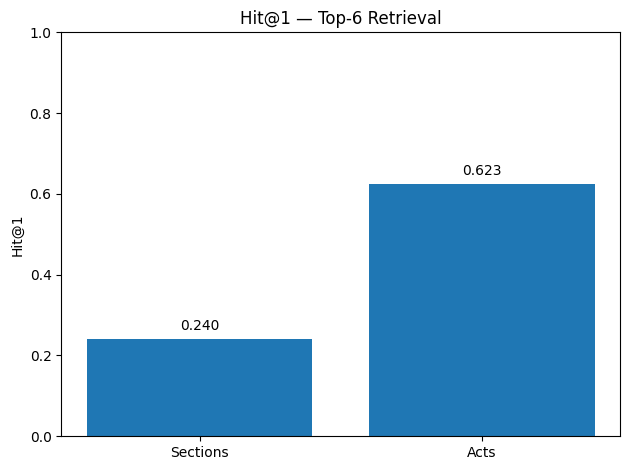

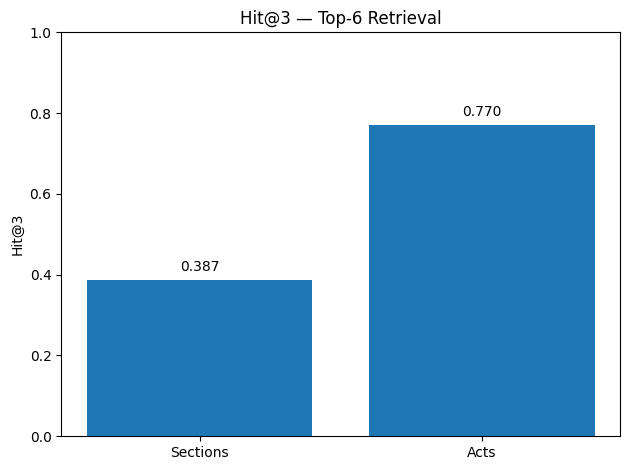

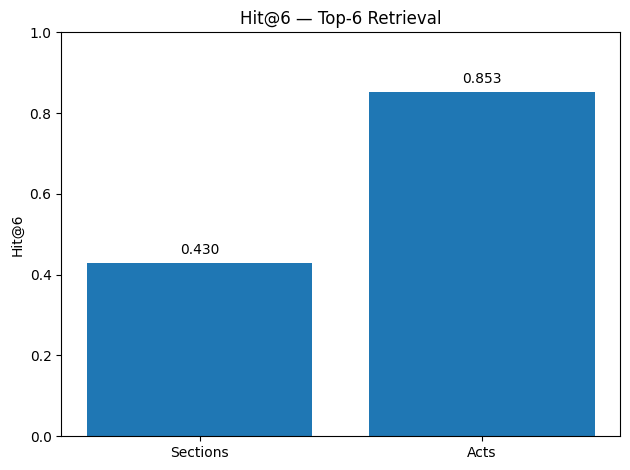

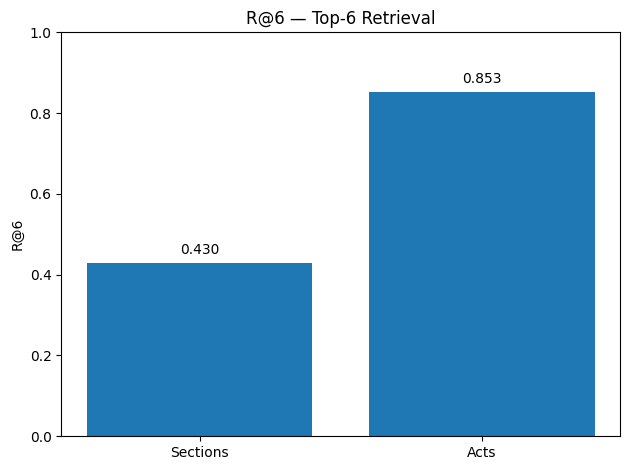

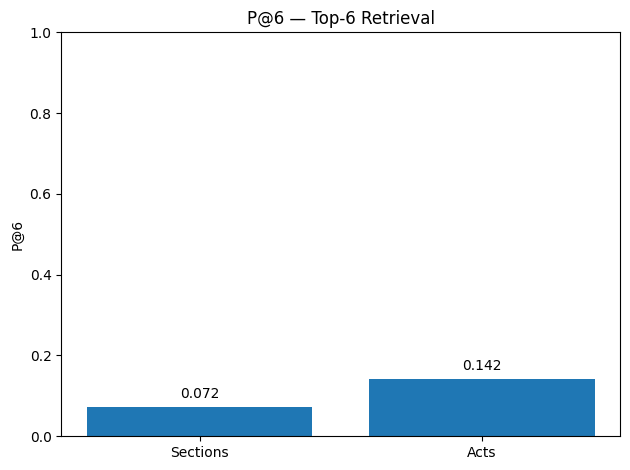

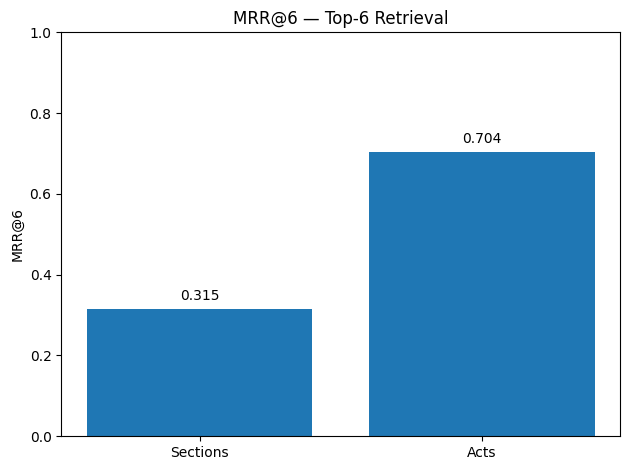

In [45]:
for _, row in df_plot.iterrows():
    m = row["Metric"]
    vals = [row["Sections"], row["Acts"]]
    plt.figure()
    plt.bar(["Sections","Acts"], vals)
    plt.title(f"{m} — Top-6 Retrieval")
    plt.ylabel(m)
    plt.ylim(0, 1.0)
    # annotate bars
    for i, v in enumerate(vals):
        plt.text(i, v + 0.015, f"{v:.3f}", ha="center", va="bottom")
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"{m.replace('@','at').replace('/','_')}_compare.png")
    plt.show()

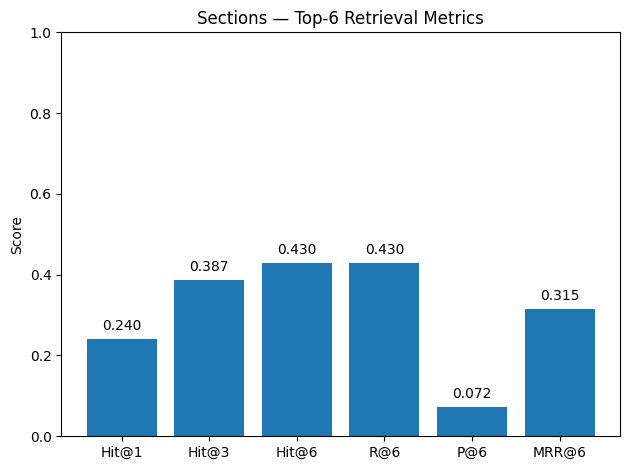

In [46]:
plt.figure()
plt.bar(df_plot["Metric"], df_plot["Sections"])
plt.title("Sections — Top-6 Retrieval Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
for i, v in enumerate(df_plot["Sections"]):
    plt.text(i, v + 0.015, f"{v:.3f}", ha="center", va="bottom", rotation=0)
plt.tight_layout()
plt.savefig(OUT_DIR / "sections_all_metrics.png")
plt.show()

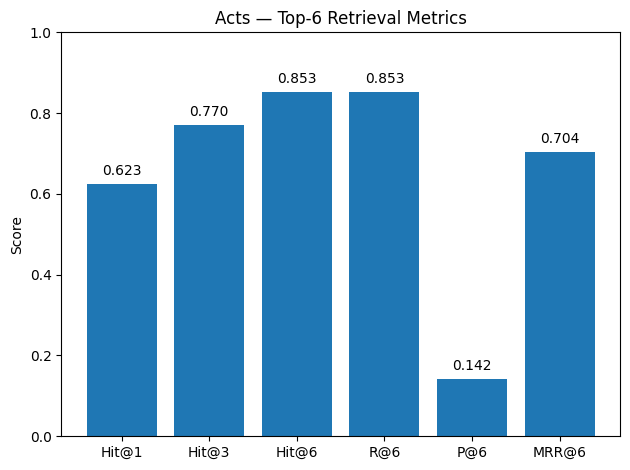

In [47]:
plt.figure()
plt.bar(df_plot["Metric"], df_plot["Acts"])
plt.title("Acts — Top-6 Retrieval Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.0)
for i, v in enumerate(df_plot["Acts"]):
    plt.text(i, v + 0.015, f"{v:.3f}", ha="center", va="bottom", rotation=0)
plt.tight_layout()
plt.savefig(OUT_DIR / "acts_all_metrics.png")
plt.show()

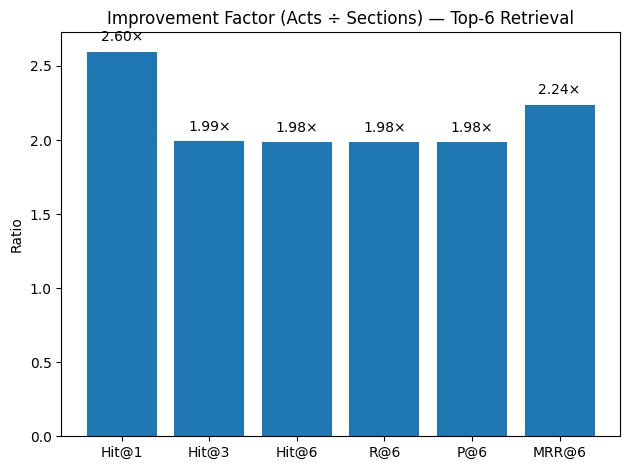

In [48]:
ratio = (df_plot["Acts"] / df_plot["Sections"]).replace([float("inf")], 0.0)
plt.figure()
plt.bar(df_plot["Metric"], ratio)
plt.title("Improvement Factor (Acts ÷ Sections) — Top-6 Retrieval")
plt.ylabel("Ratio")
for i, v in enumerate(ratio):
    plt.text(i, v + 0.05, f"{v:.2f}×", ha="center", va="bottom")
plt.tight_layout()
plt.savefig(OUT_DIR / "improvement_factors.png")
plt.show()

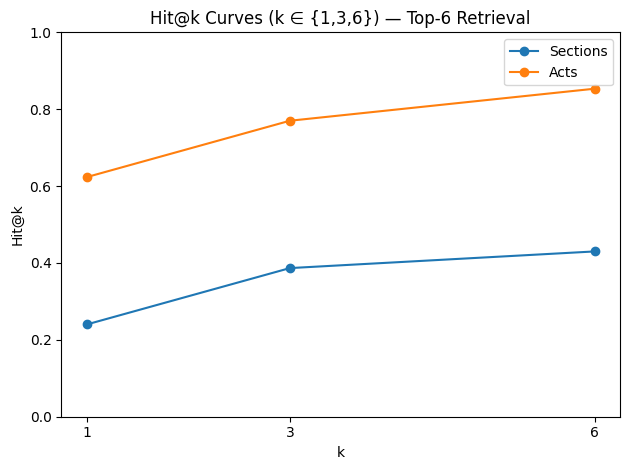

Saved plots & CSV to: /content/uhaki_top6_eval_plots


In [49]:
k_points = [1, 3, 6]
sec_hits = [sec_metrics["Hit@1"], sec_metrics["Hit@3"], sec_metrics["Hit@6"]]
act_hits = [act_metrics["Hit@1"], act_metrics["Hit@3"], act_metrics["Hit@6"]]

plt.figure()
plt.plot(k_points, sec_hits, marker="o")
plt.plot(k_points, act_hits, marker="o")
plt.title("Hit@k Curves (k ∈ {1,3,6}) — Top-6 Retrieval")
plt.xlabel("k")
plt.ylabel("Hit@k")
plt.ylim(0, 1.0)
plt.xticks(k_points)
plt.legend(["Sections","Acts"])
plt.tight_layout()
plt.savefig(OUT_DIR / "hit_curves_k_1_3_6.png")
plt.show()

print(f"Saved plots & CSV to: {OUT_DIR}")

# ANSWERS EVALUATION


In [6]:
!pip -q install sentence-transformers transformers rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 56.1 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from rapidfuzz import fuzz

## QUESTION RELEVANCE

In [7]:
CSV_IN  = "/content/uhakiQ&ATestData.csv"
CSV_OUT = "/content/uhaki_eval_QA_relevance.csv"

df = pd.read_csv(CSV_IN)
assert {"Question","Model_Answer"}.issubset(df.columns), "CSV must have Question, Model_Answer"
len(df), df.columns

(322,
 Index(['Question', 'True_Act', 'True_Section', 'Model_Answer', 'Top6_Acts',
        'Top6_Sections', 'Top6_Passages'],
       dtype='object'))

In [9]:
E5_MODEL = "intfloat/e5-base-v2"
e5 = SentenceTransformer(E5_MODEL)

def embed_queries(texts):
    return e5.encode([f"query: {t}" for t in texts], convert_to_tensor=True, normalize_embeddings=True)

def embed_passages(texts):
    return e5.encode([f"passage: {t}" for t in texts], convert_to_tensor=True, normalize_embeddings=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [10]:
NLI_MODEL = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"
nli_tokenizer = AutoTokenizer.from_pretrained(NLI_MODEL)
nli_model = AutoModelForSequenceClassification.from_pretrained(NLI_MODEL)
nli_model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
nli_model.to(device)

tokenizer_config.json: 0.00B [00:00, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Layer

In [12]:
id2label = nli_model.config.id2label
label2id = {v:k for k,v in id2label.items()}
ENTAIL_ID = label2id.get("entailment", 2)
NEUTRAL_ID = label2id.get("neutral", 1)
CONTRA_ID = label2id.get("contradiction", 0)
id2label, (ENTAIL_ID, NEUTRAL_ID, CONTRA_ID)

({0: 'entailment', 1: 'neutral', 2: 'contradiction'}, (0, 1, 2))

### COMPUTING QUESTION AND ANSWER COSINE SIMILARITY

In [13]:
BATCH = 128
q_sims = []

for i in tqdm(range(0, len(df), BATCH), desc="Embedding Q↔A"):
    batch_q = df["Question"].iloc[i:i+BATCH].fillna("").tolist()
    batch_a = df["Model_Answer"].iloc[i:i+BATCH].fillna("").tolist()

    q_emb = embed_queries(batch_q)
    a_emb = embed_passages(batch_a)
    sims = util.cos_sim(q_emb, a_emb).diagonal().cpu().numpy().tolist()
    q_sims.extend(sims)

df["QA_SemSim"] = q_sims
df["QA_SemSim"].describe()


Embedding Q↔A: 100%|██████████| 3/3 [00:08<00:00,  2.73s/it]


,QA_SemSim
count,322.000000
mean,0.889509
std,0.023714
min,0.805607
25%,0.876245
50%,0.892266
75%,0.904585
max,0.942951


### DOES THE ANSWER ENTAIL THE QUESTION'S ASK?

In [14]:
def nli_entail_prob(premises, hypotheses, max_len=384):

    probs = []
    for i in tqdm(range(0, len(premises), 32), desc="NLI scoring"):
        p = premises[i:i+32]
        h = hypotheses[i:i+32]
        enc = nli_tokenizer(p, h, truncation=True, padding=True, max_length=max_len, return_tensors="pt").to(device)
        with torch.no_grad():
            logits = nli_model(**enc).logits
            soft = torch.softmax(logits, dim=-1)
        probs.extend(soft[:, ENTAIL_ID].detach().cpu().numpy().tolist())
    return probs

df["NLI_QA_EntailProb"] = nli_entail_prob(
    premises=df["Model_Answer"].fillna("").tolist(),
    hypotheses=df["Question"].fillna("").tolist()
)

df["NLI_QA_EntailProb"].describe()


NLI scoring: 100%|██████████| 11/11 [00:11<00:00,  1.02s/it]


,NLI_QA_EntailProb
count,322.000000
mean,0.799250
std,0.334924
min,0.001977
25%,0.819894
50%,0.976380
75%,0.993456
max,0.998728


In [15]:
ROLE_PATTERNS = {
    "claimant":   [r"\bclaimant\b", r"\bplaintiff\b", r"\bapplicant\b", r"\bpetitioner\b"],
    "employer":   [r"\bemployer\b", r"\bcompany\b", r"\binsurer\b"],  # tweak as needed
    "public authority": [r"\bpublic authority\b", r"\bcounty\b", r"\bstate organ\b", r"\bministry\b", r"\bagency\b"]
}

import re

def detect_role(text: str) -> str:
    t = (text or "").lower()
    for role, pats in ROLE_PATTERNS.items():
        for pat in pats:
            if re.search(pat, t):
                return role
    # also catch phrases like "for a/an the X" at end of Q
    m = re.search(r"for (a|an|the) ([a-z ]+)$", t)
    if m:
        return m.group(2).strip()
    return ""

def role_present_in_answer(role: str, answer: str) -> bool:
    if not role:
        return True  # if no explicit role in Q, don’t penalize
    a = (answer or "").lower()
    # try direct match
    if role in a:
        return True
    # try lexicon for our known roles
    if role in ROLE_PATTERNS:
        for pat in ROLE_PATTERNS[role]:
            if re.search(pat, a):
                return True
    # fuzzy fallback for simple nouns
    return fuzz.partial_ratio(role, a) >= 90

roles_q = df["Question"].apply(detect_role)
df["Detected_Role"] = roles_q
df["Role_Match"] = [
    role_present_in_answer(r, a) for r, a in zip(df["Detected_Role"], df["Model_Answer"].fillna(""))
]
df["Role_Match"] = df["Role_Match"].astype(int)
df[["Detected_Role","Role_Match"]].head(10)


,Detected_Role,Role_Match
0,,1
1,,1
2,employer,1
3,claimant,1
4,public authority,1
5,private party,1
6,,1
7,,1
8,,1
9,,1


In [16]:
summary = {
    "rows": len(df),
    "QA_SemSim_mean": float(df["QA_SemSim"].mean()),
    "QA_SemSim_median": float(df["QA_SemSim"].median()),
    "NLI_QA_EntailProb_mean": float(df["NLI_QA_EntailProb"].mean()),
    "Role_Match_rate": float(df["Role_Match"].mean()),
}
summary


{'rows': 322,
 'QA_SemSim_mean': 0.8895088313899425,
 'QA_SemSim_median': 0.892265796661377,
 'NLI_QA_EntailProb_mean': 0.799249643146824,
 'Role_Match_rate': 0.9596273291925466}

### INSPECTING DISTRIBUTIONS AND PERCENTILES

In [20]:
import numpy as np

# Keep them as floats; optionally round for readability
percentiles = [1,5,10,25,50,75,90,95,99]

p = {f"p{q}": round(float(v), 4)
     for q, v in zip(percentiles, np.percentile(df["QA_SemSim"], percentiles))}

p_ent = {f"p{q}": round(float(v), 4)
         for q, v in zip(percentiles, np.percentile(df["NLI_QA_EntailProb"], percentiles))}

p, p_ent


({'p1': 0.8296,
  'p5': 0.8441,
  'p10': 0.8577,
  'p25': 0.8762,
  'p50': 0.8923,
  'p75': 0.9046,
  'p90': 0.918,
  'p95': 0.9231,
  'p99': 0.9343},
 {'p1': 0.0068,
  'p5': 0.0161,
  'p10': 0.0623,
  'p25': 0.8199,
  'p50': 0.9764,
  'p75': 0.9935,
  'p90': 0.9964,
  'p95': 0.9975,
  'p99': 0.9981})

In [21]:
T_SIM_LOW = max(0.80, float(np.percentile(df["QA_SemSim"], 10)))
T_NLI_LOW = max(0.60, float(np.percentile(df["NLI_QA_EntailProb"], 10)))

df["FLAG_low_QA_SemSim"] = (df["QA_SemSim"] < T_SIM_LOW).astype(int)
df["FLAG_low_NLI"]       = (df["NLI_QA_EntailProb"] < T_NLI_LOW).astype(int)
df["FLAG_role_mismatch"] = (df["Role_Match"] == 0).astype(int)

df[["FLAG_low_QA_SemSim","FLAG_low_NLI","FLAG_role_mismatch"]].mean().to_dict()


{'FLAG_low_QA_SemSim': 0.10248447204968944,
 'FLAG_low_NLI': 0.18944099378881987,
 'FLAG_role_mismatch': 0.040372670807453416}

In [22]:

df = df.reset_index(drop=False).rename(columns={"index":"RowID"})

df["QA_RelevanceScore"] = 0.6*df["QA_SemSim"] + 0.4*df["NLI_QA_EntailProb"]

bad = df.sort_values(["FLAG_role_mismatch","QA_RelevanceScore"], ascending=[False, True]).head(30)
cols_view = ["RowID","Question","Detected_Role","Role_Match","QA_SemSim","NLI_QA_EntailProb","QA_RelevanceScore","Model_Answer"]

bad[cols_view].to_csv("/content/uhaki_QA_relevance_worst30.csv", index=False)
bad[cols_view].head(10)


,RowID,Question,Detected_Role,Role_Match,QA_SemSim,NLI_QA_EntailProb,QA_RelevanceScore,Model_Answer
48,48,Who is entitled to relief concerning charges a...,employer,0,0.860981,0.008320,0.519916,"Under the Land Act, a **chargor** (the person ..."
253,253,What happens when excisable goods arises? for ...,public authority,0,0.830851,0.053676,0.519981,When excisable goods are subject to excise con...
252,252,What are the procedures for dealing with licen...,claimant,0,0.873781,0.006975,0.527059,The procedures for dealing with licensing of m...
310,310,Who is entitled to relief concerning default b...,employer,0,0.878633,0.011374,0.531729,"Under the Land Act, relief concerning default ..."
72,72,Who is entitled to relief concerning intermedd...,employer,0,0.896760,0.001977,0.538847,The question regarding relief concerning inter...
37,37,What are the procedures for dealing with pater...,claimant,0,0.893602,0.035084,0.550195,The procedures for dealing with paternity leav...
180,180,What are the procedures for dealing with defau...,claimant,0,0.888340,0.068758,0.560508,The procedures for dealing with default by a c...
85,85,What are the procedures for dealing with right...,claimant,0,0.897134,0.083139,0.571536,The procedures for dealing with the right to p...
179,179,Who is entitled to relief concerning remedies ...,employer,0,0.885581,0.131829,0.584081,The question appears to conflate two distinct ...
49,49,What are the procedures for dealing with remed...,claimant,0,0.882273,0.759418,0.833131,The procedures for dealing with remedies of a ...


In [23]:
tmp = df.copy().reset_index(drop=False).rename(columns={"index":"RowID"})
tmp["QA_RelevanceScore"] = 0.6*tmp["QA_SemSim"] + 0.4*tmp["NLI_QA_EntailProb"]
bad = tmp.sort_values(["FLAG_role_mismatch","QA_RelevanceScore"], ascending=[False, True]).head(30)
bad.to_csv("/content/uhaki_QA_relevance_worst30.csv", index=False)
bad.head(10)


,RowID,RowID,Question,True_Act,True_Section,Model_Answer,Top6_Acts,Top6_Sections,Top6_Passages,QA_SemSim,NLI_QA_EntailProb,Detected_Role,Role_Match,FLAG_low_QA_SemSim,FLAG_low_NLI,FLAG_role_mismatch,QA_RelevanceScore
48,48,48,Who is entitled to relief concerning charges a...,Land Act,Section 79,"Under the Land Act, a **chargor** (the person ...","[""Income Tax Act"", ""Persons with Disabilities ...","[""31 – Insurance relief - Insurance relief"", ""...","[""(1) A resident individual who proves that in...",0.860981,0.008320,employer,0,0,1,1,0.519916
253,253,253,What happens when excisable goods arises? for ...,Excise Duty Act,Section 14,When excisable goods are subject to excise con...,"[""Excise Duty Act"", ""Excise Duty Act"", ""Excise...","[""24 – Excisable goods under excise control - ...","[""(1) Excisable goods stored in the factory of...",0.830851,0.053676,public authority,0,1,1,1,0.519981
252,252,252,What are the procedures for dealing with licen...,Excise Duty Act,Section 10,The procedures for dealing with licensing of m...,"[""Excise Duty Act"", ""Small Claims Court Act"", ...","[""16 – Applications for a licence - Applicatio...","[""(1) A person who intends to undertake any of...",0.873781,0.006975,claimant,0,0,1,1,0.527059
310,310,310,Who is entitled to relief concerning default b...,Land Act,Section 90,"Under the Land Act, relief concerning default ...","[""Land Act"", ""Land Act"", ""Land Act"", ""Land Act...","[""103 – Application for relief by chargor - Ap...","[""(1) An application for relief against the ex...",0.878633,0.011374,employer,0,0,1,1,0.531729
72,72,72,Who is entitled to relief concerning intermedd...,Law of Succession Act,Section 45,The question regarding relief concerning inter...,"[""Income Tax Act"", ""Persons with Disabilities ...","[""31 – Insurance relief - Insurance relief"", ""...","[""(1) A resident individual who proves that in...",0.896760,0.001977,employer,0,0,1,1,0.538847
37,37,37,What are the procedures for dealing with pater...,Employment Act,Section 30,The procedures for dealing with paternity leav...,"[""Employment Act"", ""Employment Act"", ""Small Cl...","[""29 – Maternity leave - Maternity leave"", ""30...","[""shall be entitled to two weeks paternity lea...",0.893602,0.035084,claimant,0,0,1,1,0.550195
180,180,180,What are the procedures for dealing with defau...,Land Act,Section 90,The procedures for dealing with default by a c...,"[""Land Act"", ""Land Act"", ""Land Act"", ""Small Cl...","[""103 – Application for relief by chargor - Ap...","[""(1) An application for relief against the ex...",0.888340,0.068758,claimant,0,0,1,1,0.560508
85,85,85,What are the procedures for dealing with right...,Children Act,Section 6,The procedures for dealing with the right to p...,"[""Children Act"", ""Children Act"", ""Children Act...","[""11 – Right to parental care - Right to paren...","[""(1) Every child has the right to parental ca...",0.897134,0.083139,claimant,0,0,1,1,0.571536
179,179,179,Who is entitled to relief concerning remedies ...,Land Act,Section 80,The question appears to conflate two distinct ...,"[""Land Act"", ""Land Act"", ""Land Act"", ""Land Act...","[""90 – Remedies of a chargee - Remedies of a c...","[""months, by the end of which the payment in d...",0.885581,0.131829,employer,0,0,1,1,0.584081
49,49,49,What are the procedures for dealing with remed...,Land Act,Section 80,The procedures for dealing with remedies of a ...,"[""Land Act"", ""Land Act"", ""Land Act"", ""Land Act...","[""90 – Remedies of a chargee - Remedies of a c...","[""months, by the end of which the payment in d...",0.882273,0.759418,claimant,0,0,0,1,0.833131


# PLOTS

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


assert {"Question","Model_Answer","True_Act","True_Section",
        "QA_SemSim","NLI_QA_EntailProb","Role_Match"}.issubset(df.columns), \
        "df is missing some required columns."

OUT_DIR = Path("/content/uhaki_plots")
OUT_DIR.mkdir(parents=True, exist_ok=True)


### Q&A COSINE SIMILARITY

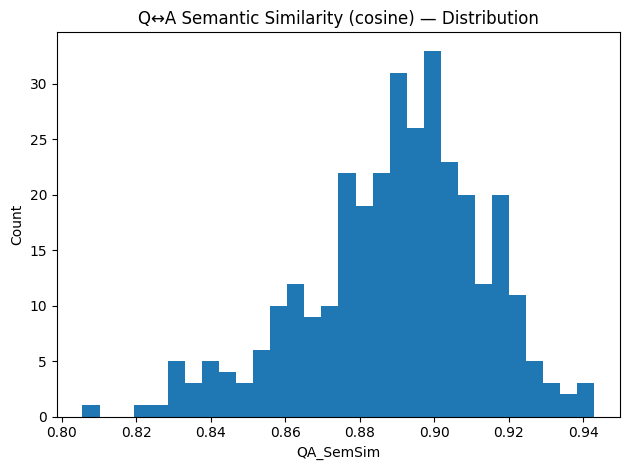

In [25]:
plt.figure()
plt.hist(df["QA_SemSim"].astype(float), bins=30)
plt.title("Q↔A Semantic Similarity (cosine) — Distribution")
plt.xlabel("QA_SemSim")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUT_DIR / "dist_QA_SemSim.png")
plt.show()


### NLI ENTAILMENT PROBABILITY

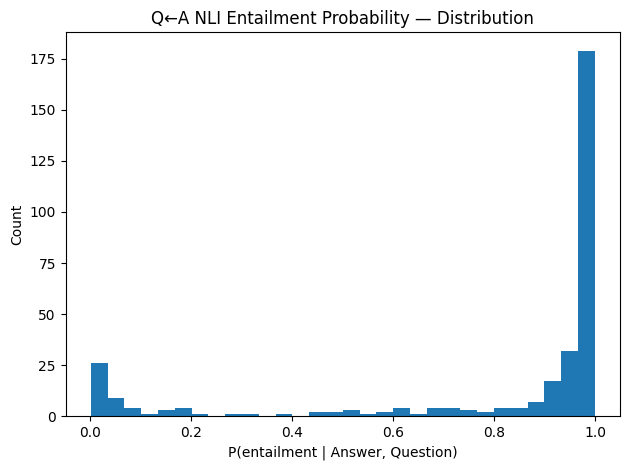

In [26]:
plt.figure()
plt.hist(df["NLI_QA_EntailProb"].astype(float), bins=30)
plt.title("Q←A NLI Entailment Probability — Distribution")
plt.xlabel("P(entailment | Answer, Question)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(OUT_DIR / "dist_NLI_QA.png")
plt.show()


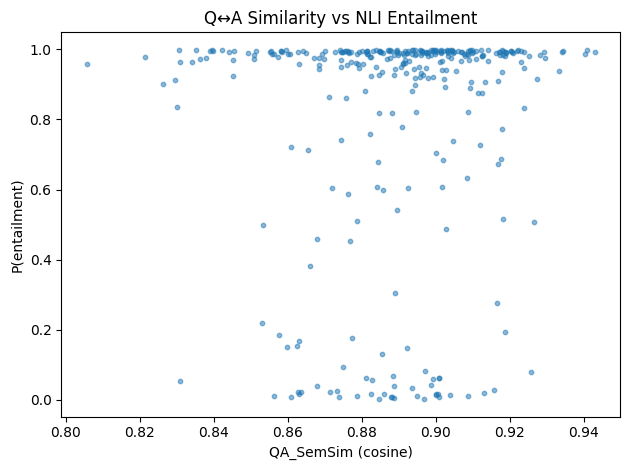

Pearson correlation (QA_SemSim vs NLI): 0.076


In [27]:
plt.figure()
plt.scatter(df["QA_SemSim"].astype(float), df["NLI_QA_EntailProb"].astype(float), s=10, alpha=0.5)
plt.title("Q↔A Similarity vs NLI Entailment")
plt.xlabel("QA_SemSim (cosine)")
plt.ylabel("P(entailment)")
plt.tight_layout()
plt.savefig(OUT_DIR / "scatter_QA_vs_NLI.png")
plt.show()

# Correlation
corr = float(np.corrcoef(df["QA_SemSim"].astype(float), df["NLI_QA_EntailProb"].astype(float))[0,1])
print(f"Pearson correlation (QA_SemSim vs NLI): {corr:.3f}")


### SEMANTIC SIMILARITY BY ACT

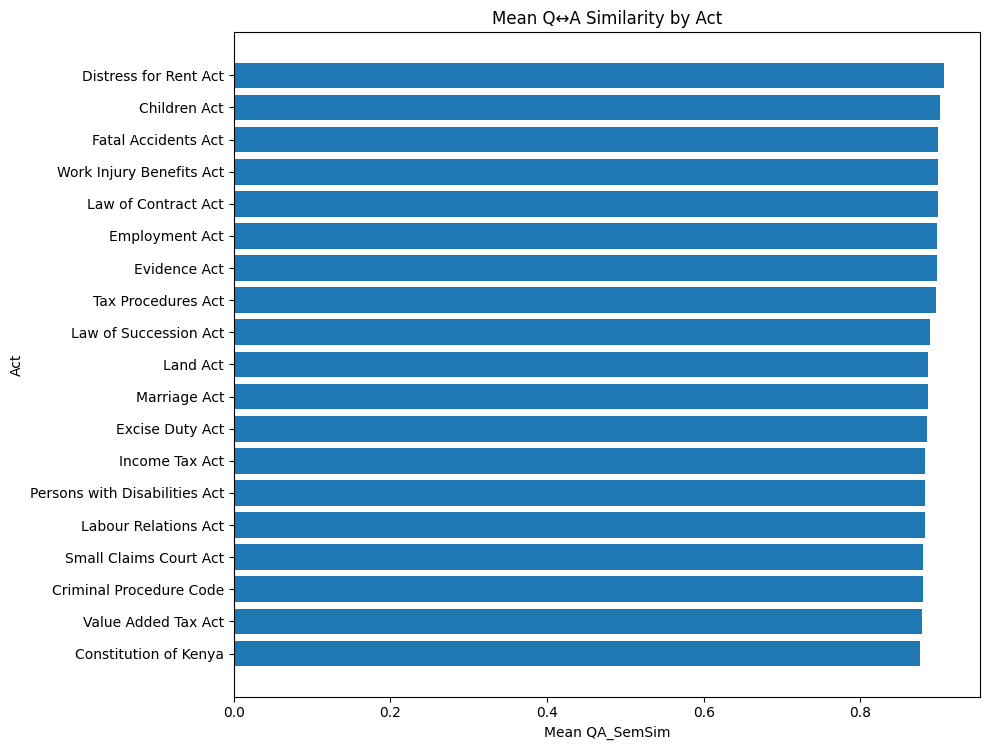

,True_Act,QA_SemSim
3,Distress for Rent Act,0.907399
0,Children Act,0.901464
7,Fatal Accidents Act,0.899548
18,Work Injury Benefits Act,0.899422
11,Law of Contract Act,0.899375
4,Employment Act,0.898473
5,Evidence Act,0.898069
16,Tax Procedures Act,0.896195
12,Law of Succession Act,0.888330
10,Land Act,0.886501


In [28]:
act_mean_sim = (df.groupby("True_Act", as_index=False)["QA_SemSim"]
                  .mean()
                  .sort_values("QA_SemSim", ascending=False))

plt.figure(figsize=(10, max(4, 0.4*len(act_mean_sim))))
plt.barh(act_mean_sim["True_Act"], act_mean_sim["QA_SemSim"])
plt.gca().invert_yaxis()
plt.title("Mean Q↔A Similarity by Act")
plt.xlabel("Mean QA_SemSim")
plt.ylabel("Act")
plt.tight_layout()
plt.savefig(OUT_DIR / "barh_mean_QA_SemSim_by_Act.png")
plt.show()

act_mean_sim.head(10)


### Mean NLI entailment by Act

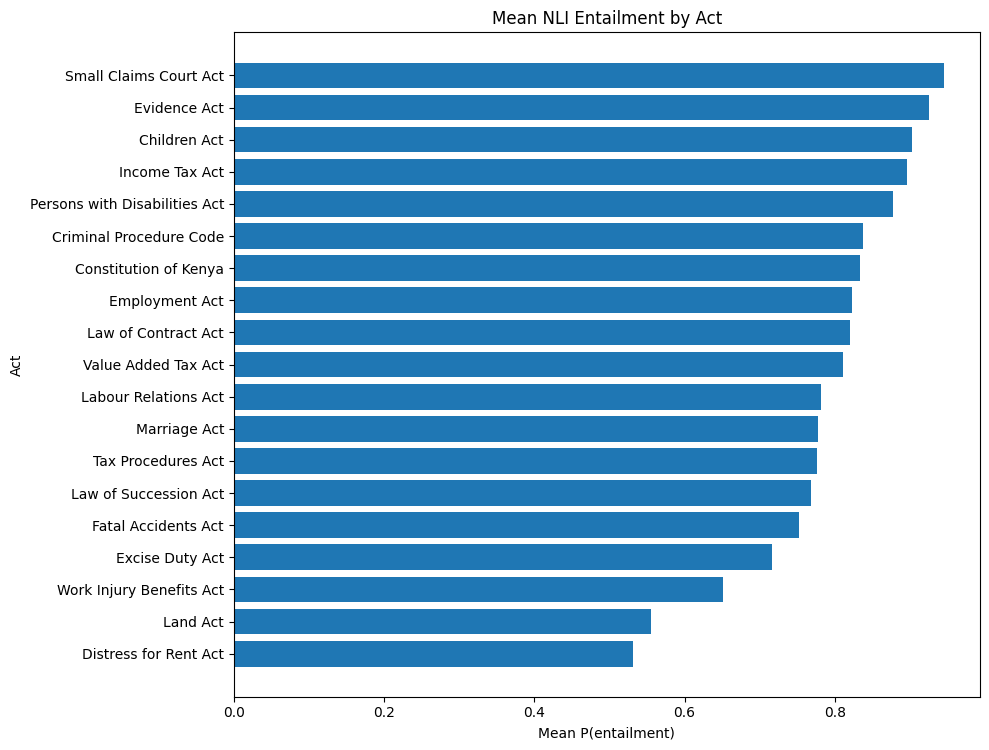

,True_Act,NLI_QA_EntailProb
15,Small Claims Court Act,0.946010
5,Evidence Act,0.926007
0,Children Act,0.902535
8,Income Tax Act,0.896748
14,Persons with Disabilities Act,0.877761
2,Criminal Procedure Code,0.837120
1,Constitution of Kenya,0.833130
4,Employment Act,0.822604
11,Law of Contract Act,0.820767
17,Value Added Tax Act,0.811277


In [29]:
act_mean_nli = (df.groupby("True_Act", as_index=False)["NLI_QA_EntailProb"]
                  .mean()
                  .sort_values("NLI_QA_EntailProb", ascending=False))

plt.figure(figsize=(10, max(4, 0.4*len(act_mean_nli))))
plt.barh(act_mean_nli["True_Act"], act_mean_nli["NLI_QA_EntailProb"])
plt.gca().invert_yaxis()
plt.title("Mean NLI Entailment by Act")
plt.xlabel("Mean P(entailment)")
plt.ylabel("Act")
plt.tight_layout()
plt.savefig(OUT_DIR / "barh_mean_NLI_by_Act.png")
plt.show()

act_mean_nli.head(10)


### Top & worst questions overall by Q↔A similarity

In [30]:
K = 20
top_overall = (df.sort_values("QA_SemSim", ascending=False)
                 .head(K)[["Question","True_Act","True_Section","QA_SemSim","NLI_QA_EntailProb","Model_Answer"]])
worst_overall = (df.sort_values("QA_SemSim", ascending=True)
                   .head(K)[["Question","True_Act","True_Section","QA_SemSim","NLI_QA_EntailProb","Model_Answer"]])

top_overall_path = OUT_DIR / "top_overall_by_QA_SemSim.csv"
worst_overall_path = OUT_DIR / "worst_overall_by_QA_SemSim.csv"
top_overall.to_csv(top_overall_path, index=False)
worst_overall.to_csv(worst_overall_path, index=False)

top_overall.head(3), worst_overall.head(3)


(                                              Question        True_Act  \
 92   How does one apply for relief concerning power...    Children Act   
 111  What are the requirements for compliance with ...  Income Tax Act   
 163  How does one apply for relief concerning contr...  Employment Act   
 
     True_Section  QA_SemSim  NLI_QA_EntailProb  \
 92   Section 194   0.942951           0.991427   
 111   Section 35   0.940807           0.998079   
 163    Section 9   0.940393           0.987838   
 
                                           Model_Answer  
 92   To apply for relief concerning the powers of t...  
 111  The requirements for compliance with withholdi...  
 163  The question appears to be about applying for ...  ,
                                               Question  \
 286  Who is entitled to relief concerning economic ...   
 46         What does the law provide regarding leases?   
 225  What does the law provide regarding institutio...   
 
                     

In [31]:
idx_best_by_act = df.groupby("True_Act")["QA_SemSim"].idxmax()
best_by_act = (df.loc[idx_best_by_act, ["Question","True_Act","True_Section","QA_SemSim","NLI_QA_EntailProb","Model_Answer"]]
                 .sort_values("QA_SemSim", ascending=False))
best_by_act_path = OUT_DIR / "best_question_per_act.csv"
best_by_act.to_csv(best_by_act_path, index=False)
best_by_act.head(10)


,Question,True_Act,True_Section,QA_SemSim,NLI_QA_EntailProb,Model_Answer
92,How does one apply for relief concerning power...,Children Act,Section 194,0.942951,0.991427,To apply for relief concerning the powers of t...
111,What are the requirements for compliance with ...,Income Tax Act,Section 35,0.940807,0.998079,The requirements for compliance with withholdi...
163,How does one apply for relief concerning contr...,Employment Act,Section 9,0.940393,0.987838,The question appears to be about applying for ...
265,What are the requirements for compliance with ...,Work Injury Benefits Act,Section 16,0.934363,0.995580,The requirements for compliance with compensat...
56,How does one apply for relief concerning burde...,Evidence Act,Section 107,0.934178,0.993835,To apply for relief concerning the burden of p...
51,What are the requirements for compliance with ...,Land Act,Section 94,0.933381,0.938059,The requirements for compliance with the trans...
96,Who is entitled to relief concerning pleas? fo...,Criminal Procedure Code,Section 137,0.927240,0.915680,The question appears to be about who is entitl...
255,What timelines apply when dealing with power t...,Distress for Rent Act,Section 3,0.926691,0.506007,When dealing with the power to distrain for re...
230,What are the requirements for compliance with ...,Tax Procedures Act,Section 29,0.925126,0.981477,The requirements for compliance with filing ta...
63,What are the requirements for compliance with ...,Law of Contract Act,Section 3,0.923748,0.992324,The requirements for compliance with contracts...


/tmp/ipython-input-2062377437.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, labels=acts, showfliers=False)


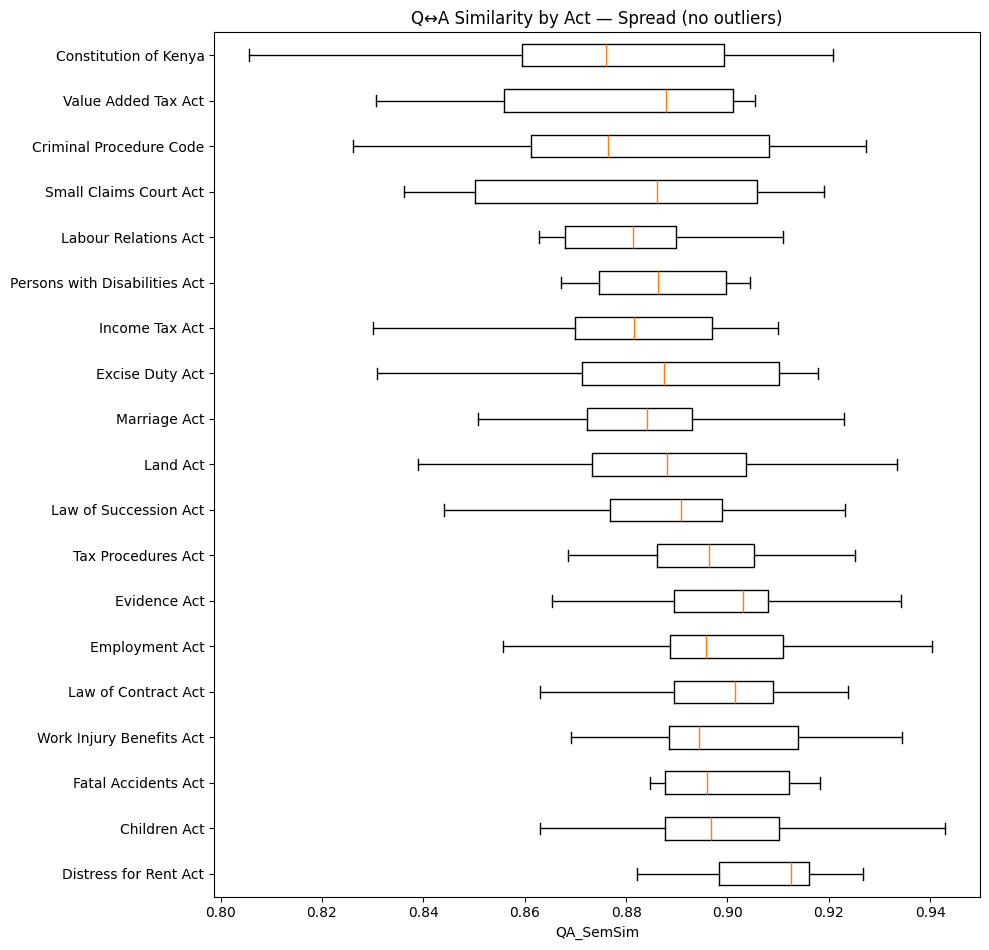

In [32]:
acts = act_mean_sim["True_Act"].tolist()
if len(acts) <= 20:  # keep readable; increase if you don’t mind a tall figure
    data = [df.loc[df["True_Act"]==a, "QA_SemSim"].astype(float).values for a in acts]
    plt.figure(figsize=(10, 0.4*len(acts)+2))
    plt.boxplot(data, vert=False, labels=acts, showfliers=False)
    plt.title("Q↔A Similarity by Act — Spread (no outliers)")
    plt.xlabel("QA_SemSim")
    plt.tight_layout()
    plt.savefig(OUT_DIR / "box_QA_SemSim_by_Act.png")
    plt.show()


In [33]:
# === Top-3 questions per Act by QA_SemSim ===
K = 3
grp = df.sort_values("QA_SemSim", ascending=False).groupby("True_Act")
topk_by_act = grp.head(K)[["True_Act","True_Section","Question","QA_SemSim","NLI_QA_EntailProb"]]
topk_by_act = topk_by_act.sort_values(["True_Act","QA_SemSim"], ascending=[True, False])
topk_by_act.to_csv("/content/uhaki_plots/top3_questions_per_act.csv", index=False)
topk_by_act.head(12)


,True_Act,True_Section,Question,QA_SemSim,NLI_QA_EntailProb
92,Children Act,Section 194,How does one apply for relief concerning power...,0.942951,0.991427
88,Children Act,Section 24,What documents are needed to address parental ...,0.929603,0.976000
219,Children Act,Section 73,What documents are needed to address foster ca...,0.929339,0.992283
24,Constitution of Kenya,Article 31,Who is entitled to relief concerning privacy? ...,0.920778,0.990710
282,Constitution of Kenya,Article 27,How does one apply for relief concerning equal...,0.917950,0.773928
156,Constitution of Kenya,Article 43,What are the procedures for dealing with econo...,0.909721,0.990341
96,Criminal Procedure Code,Section 137,Who is entitled to relief concerning pleas? fo...,0.927240,0.915680
99,Criminal Procedure Code,Section 357,What are the requirements for compliance with ...,0.918624,0.991594
228,Criminal Procedure Code,Section 204,What are the procedures for dealing with withd...,0.916967,0.992525
255,Distress for Rent Act,Section 3,What timelines apply when dealing with power t...,0.926691,0.506007


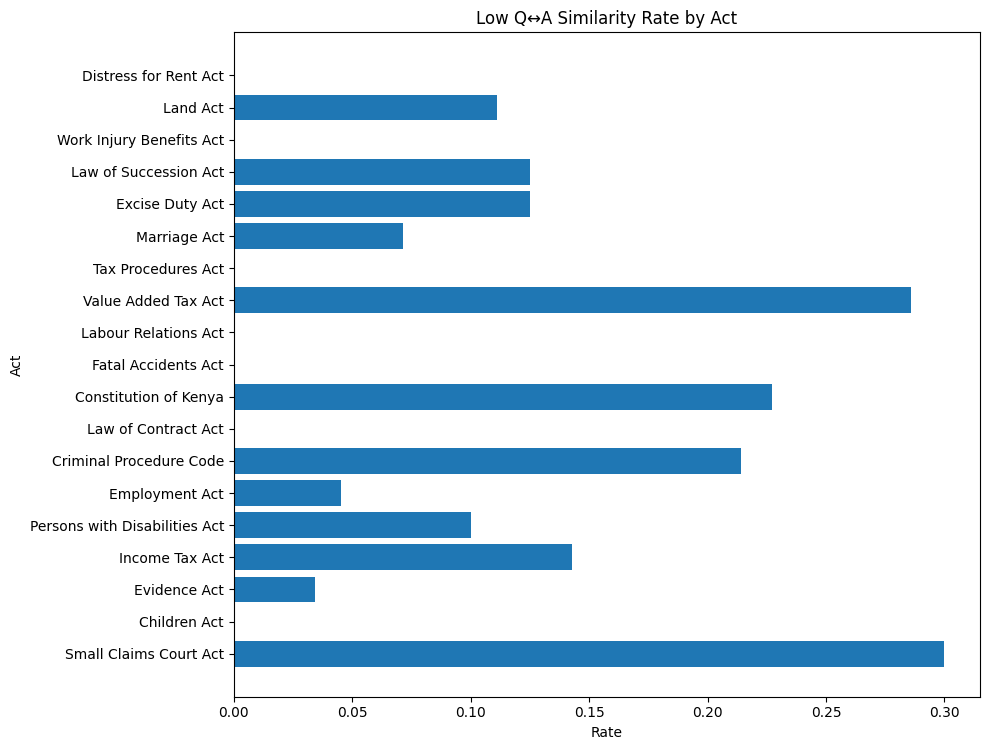

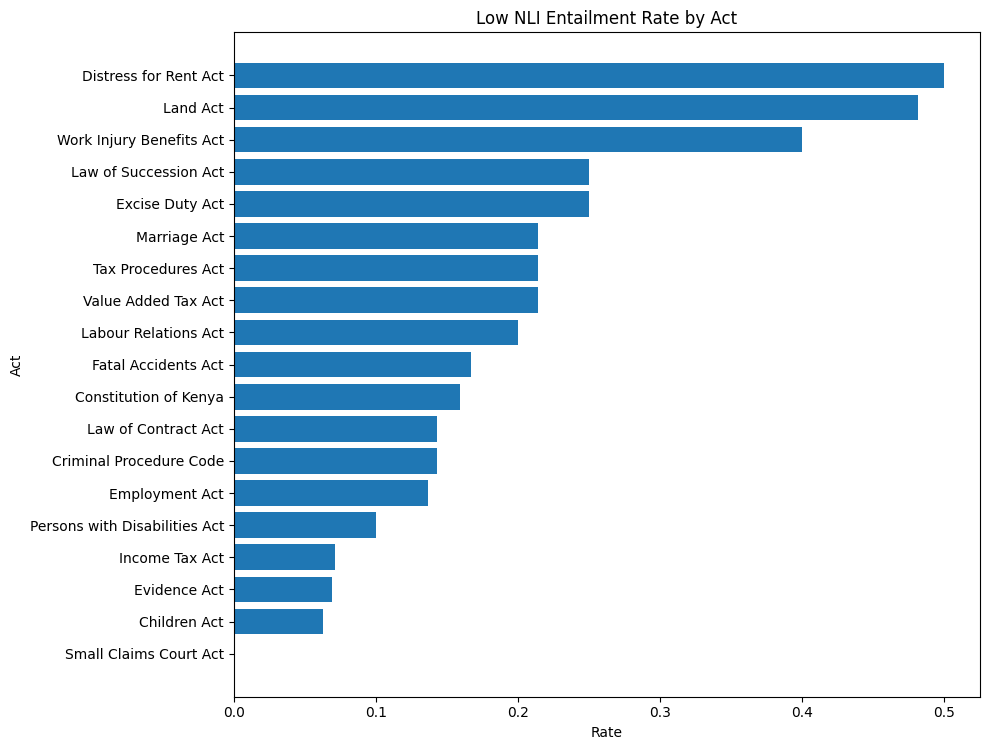

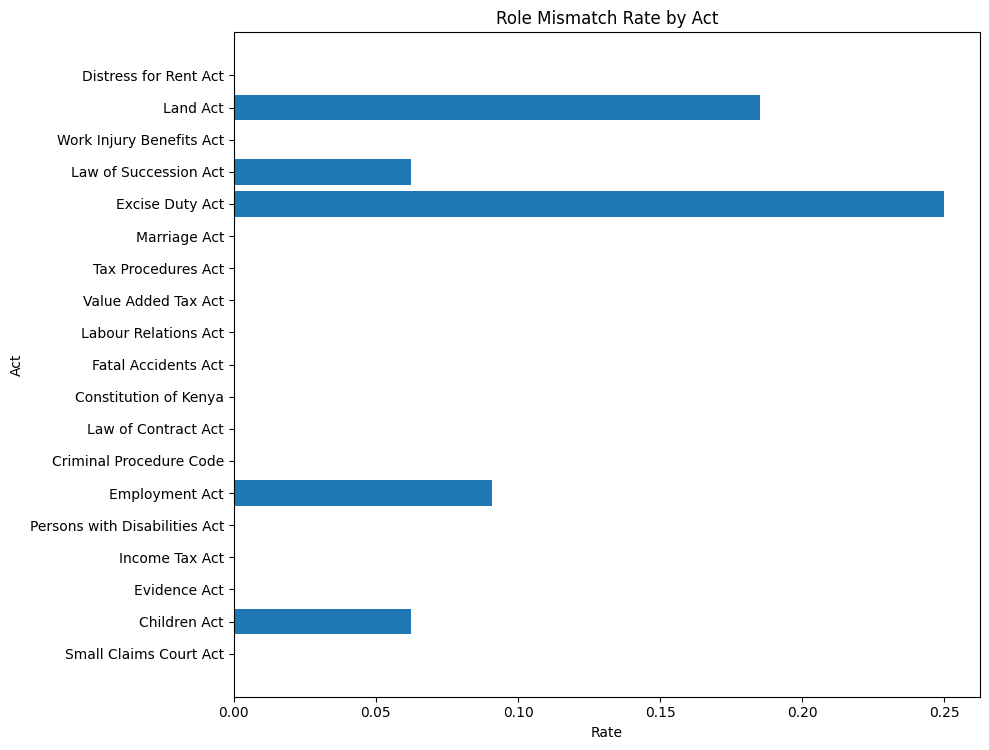

,True_Act,Rate_low_QA,Rate_low_NLI,Rate_role_mismatch
3,Distress for Rent Act,0.000000,0.500000,0.000000
10,Land Act,0.111111,0.481481,0.185185
18,Work Injury Benefits Act,0.000000,0.400000,0.000000
12,Law of Succession Act,0.125000,0.250000,0.062500
6,Excise Duty Act,0.125000,0.250000,0.250000
13,Marriage Act,0.071429,0.214286,0.000000
16,Tax Procedures Act,0.000000,0.214286,0.000000
17,Value Added Tax Act,0.285714,0.214286,0.000000
9,Labour Relations Act,0.000000,0.200000,0.000000
7,Fatal Accidents Act,0.000000,0.166667,0.000000


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

OUT_DIR = Path("/content/uhaki_plots"); OUT_DIR.mkdir(exist_ok=True, parents=True)

# thresholds from earlier
T_SIM_LOW = max(0.80, float(np.percentile(df["QA_SemSim"], 10)))
T_NLI_LOW = max(0.60, float(np.percentile(df["NLI_QA_EntailProb"], 10)))

df["FLAG_low_QA_SemSim"] = (df["QA_SemSim"] < T_SIM_LOW).astype(int)
df["FLAG_low_NLI"]       = (df["NLI_QA_EntailProb"] < T_NLI_LOW).astype(int)
df["FLAG_role_mismatch"] = (df["Role_Match"] == 0).astype(int)

fail = (df.groupby("True_Act", as_index=False)[["FLAG_low_QA_SemSim","FLAG_low_NLI","FLAG_role_mismatch"]]
          .mean()
          .rename(columns={
              "FLAG_low_QA_SemSim":"Rate_low_QA",
              "FLAG_low_NLI":"Rate_low_NLI",
              "FLAG_role_mismatch":"Rate_role_mismatch"
          })
          .sort_values("Rate_low_NLI", ascending=False))

fail.to_csv("/content/uhaki_plots/failure_rates_by_act.csv", index=False)

# three small bar charts
for col, title in [
    ("Rate_low_QA", "Low Q↔A Similarity Rate by Act"),
    ("Rate_low_NLI", "Low NLI Entailment Rate by Act"),
    ("Rate_role_mismatch", "Role Mismatch Rate by Act"),
]:
    plt.figure(figsize=(10, max(4, 0.4*len(fail))))
    plt.barh(fail["True_Act"], fail[col])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Rate")
    plt.ylabel("Act")
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"barh_{col}_by_act.png")
    plt.show()

fail.head(10)


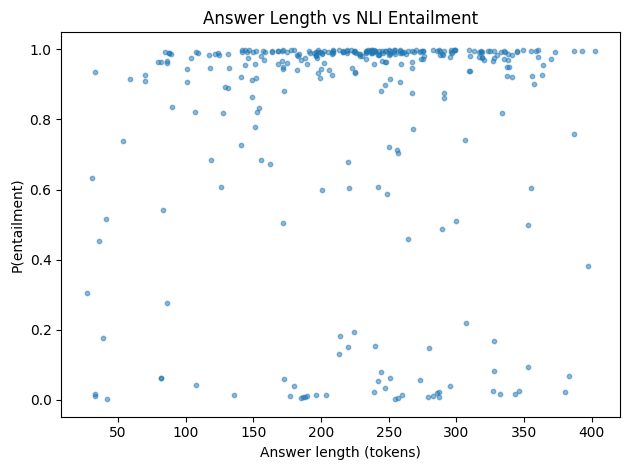

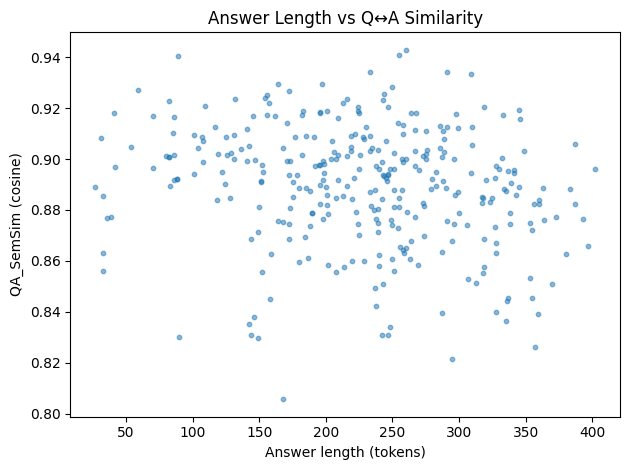

corr(A_len, NLI)     = 0.04844987872183835
corr(A_len, QA_SemSim)= -0.189518320792514


In [35]:
import matplotlib.pyplot as plt

df["Q_len"] = df["Question"].fillna("").str.split().str.len()
df["A_len"] = df["Model_Answer"].fillna("").str.split().str.len()

# Scatter: Answer length vs NLI entailment
plt.figure()
plt.scatter(df["A_len"], df["NLI_QA_EntailProb"], s=10, alpha=0.5)
plt.title("Answer Length vs NLI Entailment")
plt.xlabel("Answer length (tokens)")
plt.ylabel("P(entailment)")
plt.tight_layout()
plt.savefig("/content/uhaki_plots/scatter_A_len_vs_NLI.png")
plt.show()

# Scatter: Answer length vs QA_SemSim
plt.figure()
plt.scatter(df["A_len"], df["QA_SemSim"], s=10, alpha=0.5)
plt.title("Answer Length vs Q↔A Similarity")
plt.xlabel("Answer length (tokens)")
plt.ylabel("QA_SemSim (cosine)")
plt.tight_layout()
plt.savefig("/content/uhaki_plots/scatter_A_len_vs_QA.png")
plt.show()

# Print simple correlations
import numpy as np
print("corr(A_len, NLI)     =", float(np.corrcoef(df["A_len"], df["NLI_QA_EntailProb"])[0,1]))
print("corr(A_len, QA_SemSim)=", float(np.corrcoef(df["A_len"], df["QA_SemSim"])[0,1]))


In [36]:
def summarize(group, col):
    x = group[col].astype(float)
    return pd.Series({
        f"{col}_mean":   x.mean(),
        f"{col}_median": x.median(),
        f"{col}_p10":    x.quantile(0.10),
        f"{col}_p90":    x.quantile(0.90),
    })

sum_sim = df.groupby("True_Act").apply(summarize, col="QA_SemSim")
sum_nli = df.groupby("True_Act").apply(summarize, col="NLI_QA_EntailProb")
act_summary = pd.concat([sum_sim, sum_nli], axis=1).reset_index().sort_values("QA_SemSim_mean", ascending=False)

act_summary.to_csv("/content/uhaki_plots/act_summary_stats.csv", index=False)
act_summary.head(12)


/tmp/ipython-input-994618597.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sum_sim = df.groupby("True_Act").apply(summarize, col="QA_SemSim")
/tmp/ipython-input-994618597.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sum_nli = df.groupby("True_Act").apply(summarize, col="NLI_QA_EntailProb")


,True_Act,QA_SemSim_mean,QA_SemSim_median,QA_SemSim_p10,QA_SemSim_p90,NLI_QA_EntailProb_mean,NLI_QA_EntailProb_median,NLI_QA_EntailProb_p10,NLI_QA_EntailProb_p90
3,Distress for Rent Act,0.907399,0.912468,0.888881,0.920173,0.531421,0.616197,0.017962,0.987115
0,Children Act,0.901464,0.896700,0.882434,0.929471,0.902535,0.985629,0.819714,0.996046
7,Fatal Accidents Act,0.899548,0.896055,0.885085,0.917503,0.751744,0.925762,0.338155,0.991315
18,Work Injury Benefits Act,0.899422,0.894313,0.876171,0.928877,0.650711,0.959402,0.007378,0.996269
11,Law of Contract Act,0.899375,0.901422,0.883990,0.919885,0.820767,0.981097,0.217808,0.994729
4,Employment Act,0.898473,0.895836,0.882919,0.917942,0.822604,0.974625,0.204033,0.995122
5,Evidence Act,0.898069,0.903136,0.864203,0.918687,0.926007,0.991235,0.732614,0.997702
16,Tax Procedures Act,0.896195,0.896310,0.878841,0.912576,0.776062,0.969108,0.063494,0.995225
12,Law of Succession Act,0.888330,0.890846,0.863659,0.910093,0.768570,0.974350,0.159941,0.995431
10,Land Act,0.886501,0.888019,0.856033,0.919465,0.555254,0.759418,0.034444,0.995700


In [50]:
from google.colab import drive
drive.mount("/content/drive")  # follow the prompt


Mounted at /content/drive


In [51]:
from pathlib import Path

OUT_DIR = Path("/content/drive/MyDrive/uhaki/top6_eval_plots")  # change if you like
OUT_DIR.mkdir(parents=True, exist_ok=True)


In [52]:
import shutil
from pathlib import Path

# where your files currently are (pick the ones you used)
SRC_CANDIDATES = [
    Path("/content/uhaki_top6_eval_plots"),
    Path("/content/uhaki_plots"),
    Path("/mnt/data/top6_metrics_plots"),
]

DEST = Path("/content/drive/MyDrive/uhaki/top6_eval_plots")
DEST.mkdir(parents=True, exist_ok=True)

for src in SRC_CANDIDATES:
    if src.exists():
        shutil.copytree(src, DEST, dirs_exist_ok=True)
        print(f"Copied from {src} -> {DEST}")


Copied from /content/uhaki_top6_eval_plots -> /content/drive/MyDrive/uhaki/top6_eval_plots
Copied from /content/uhaki_plots -> /content/drive/MyDrive/uhaki/top6_eval_plots


In [53]:
!find "/content/drive/MyDrive/uhaki/top6_eval_plots" -maxdepth 1 -type f -printf "%f\n" | sort



acts_all_metrics.png
act_summary_stats.csv
barh_mean_NLI_by_Act.png
barh_mean_QA_SemSim_by_Act.png
barh_Rate_low_NLI_by_act.png
barh_Rate_low_QA_by_act.png
barh_Rate_role_mismatch_by_act.png
best_question_per_act.csv
box_QA_SemSim_by_Act.png
dist_NLI_QA.png
dist_QA_SemSim.png
failure_rates_by_act.csv
Hitat1_compare.png
Hitat3_compare.png
Hitat6_compare.png
hit_curves_k_1_3_6.png
improvement_factors.png
MRRat6_compare.png
Pat6_compare.png
Rat6_compare.png
scatter_A_len_vs_NLI.png
scatter_A_len_vs_QA.png
scatter_QA_vs_NLI.png
sections_all_metrics.png
top3_questions_per_act.csv
top6_metrics_sections_vs_acts.csv
top_overall_by_QA_SemSim.csv
worst_overall_by_QA_SemSim.csv
